# **Analysis and visualization of the Stack Overflow 2024 survey dataset**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Tout est bien installé !")

Tout est bien installé !


In [3]:
file_name = 'dataset/survey_results_public.csv'

In [4]:
df = pd.read_csv(file_name)

In [5]:
df_test = pd.read_csv(file_name)

### Analyse exploratoire

In [6]:
df.shape

(65437, 114)

In [7]:
df.head()

ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                                NaN   

                                             EdLevel  \
0                          Primary/elementary school   
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
3  Some college/university study without earning ...   
4  Secondary school (e.g. American high school, G...   

                                           LearnCode  \
0                             Books / Physical media   
1  Books / Physical media;Colleague;On the job tr...   
2  Books / Physical media;Colleague;On the job tr...   
3  Other online resources (e.g., videos, blogs, f...   
4  Other online resources (e.g., videos, blogs, f...   

                                     LearnCodeOnline  ... JobSatPoints_6  \
0                                                NaN  ...            NaN   
1  Technical documentation;Blogs;Books;Written Tu...  ...            0.0   
2  Technical documentation;Blogs;Books;Written Tu...  ...            NaN   
3  Stack Overflow;How-to videos;Interactive tutorial  ...            NaN   
4  Technical documentation;Blogs;Written Tutorial...  ...            NaN   

  JobSatPoints_7 JobSatPoints_8 JobSatPoints_9 JobSatPoints_10  \
0            NaN            NaN            NaN             NaN   
1            0.0            0.0            0.0             0.0   
2            NaN            NaN            NaN             NaN   
3            NaN            NaN            NaN             NaN   
4            NaN            NaN            NaN             NaN   

  JobSatPoints_11           SurveyLength SurveyEase ConvertedCompYearly JobSat  
0             NaN                    NaN        NaN                 NaN    NaN  
1             0.0                    NaN        NaN                 NaN    NaN  
2             NaN  Appropriate in length       Easy                 NaN    NaN  
3             NaN               Too long       Easy                 NaN    NaN  
4             NaN              Too short       Easy                 NaN    NaN  

[5 rows x 114 columns]

In [8]:
df.dtypes

ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object

# Identifier les lignes dupliquées

In [9]:
df_duplicates = df.duplicated().sum()
print(df_duplicates)

0


# Recherche de valeurs manquantes

In [10]:
df.isnull().sum()

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64

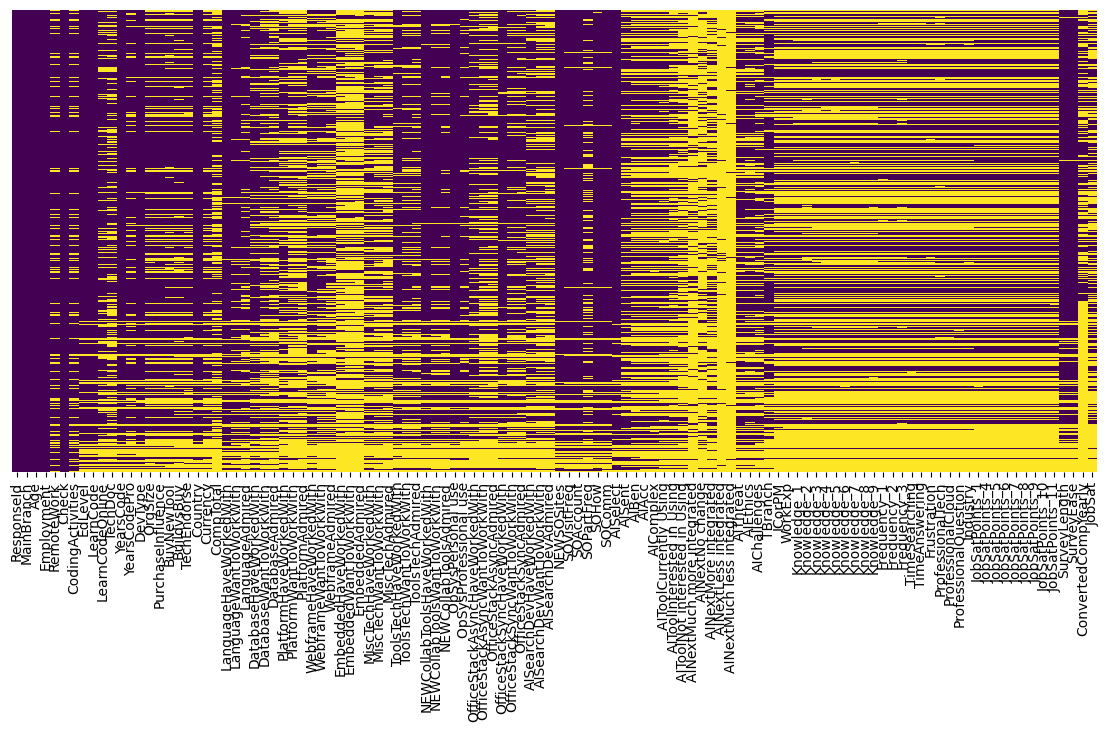

In [11]:
## Write your code here
plt.figure(figsize=(14, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False, xticklabels=True)

# Affichage du graphique
plt.show()

### JobSatPoints

#### JobSatPoints_1

In [330]:
n = df['JobSatPoints_1'].isnull().sum()
print('Valeurs manquantes :',n)
JobSatPoints_1 = df['JobSatPoints_1'].value_counts().head()
print(JobSatPoints_1)

Valeurs manquantes : 36113
JobSatPoints_1
0.0     11271
10.0     4010
20.0     2909
5.0      1496
30.0     1309
Name: count, dtype: int64


In [331]:
df['JobSatPoints_1'] = df.groupby('Age')['JobSatPoints_1'].transform(lambda x: x.fillna(x.median()))

#### JobSatPoints_7

In [325]:
n = df['JobSatPoints_7'].isnull().sum()
print('Valeurs manquantes :',n)
JobSatPoints_7 = df['JobSatPoints_7'].value_counts().head()
print(JobSatPoints_7)

Valeurs manquantes : 35989
JobSatPoints_7
0.0     8119
20.0    4233
10.0    3934
30.0    2080
15.0    1601
Name: count, dtype: int64


In [326]:
df['JobSatPoints_7'] = df.groupby('Age')['JobSatPoints_7'].transform(lambda x: x.fillna(x.median()))

#### JobSatPoints6

In [322]:
n = df['JobSatPoints_6'].isnull().sum()
print('Valeurs manquantes :',n)
JobSatPoints_6 = df['JobSatPoints_6'].value_counts().head()
print(JobSatPoints_6)

Valeurs manquantes : 35987
JobSatPoints_6
0.0     7912
20.0    4352
10.0    3328
30.0    2482
15.0    1466
Name: count, dtype: int64


In [ ]:
df['JobSatPoints_6'] = df.groupby('Age')['JobSatPoints_6'].transform(lambda x: x.fillna(x.median()))


### AISearchDevAdmired

In [308]:
n = df['AISearchDevAdmired'].isnull().sum()
print('Valeurs manquantes :',n)
AISearchDevAdmired = df['AISearchDevAdmired'].value_counts().head()
print(AISearchDevAdmired)

Valeurs manquantes : 29894
AISearchDevAdmired
ChatGPT                                 10092
ChatGPT;GitHub Copilot                   4954
GitHub Copilot                           2355
ChatGPT;Google Gemini                    1749
ChatGPT;GitHub Copilot;Google Gemini     1019
Name: count, dtype: int64


In [309]:
# Remplir les valeurs manquantes avec la valeur la plus fréquente (mode)
mode_value = df['AISearchDevAdmired'].mode()[0]
df['AISearchDevAdmired'].fillna(mode_value, inplace=True)

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\1328515716.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AISearchDevAdmired'].fillna(mode_value, inplace=True)


### AISearchDevWantToWorkWith

In [305]:
n = df['AISearchDevWantToWorkWith'].isnull().sum()
print('Valeurs manquantes :',n)
AISearchDevWantToWorkWith = df['AISearchDevWantToWorkWith'].value_counts().head()
print(AISearchDevWantToWorkWith)

Valeurs manquantes : 28736
AISearchDevWantToWorkWith
ChatGPT                                 7478
ChatGPT;GitHub Copilot                  5276
GitHub Copilot                          2416
ChatGPT;GitHub Copilot;Google Gemini    1624
ChatGPT;Google Gemini                   1564
Name: count, dtype: int64


In [306]:
# Remplir les valeurs manquantes avec la valeur la plus fréquente (mode)
mode_value = df['AISearchDevWantToWorkWith'].mode()[0]
df['AISearchDevWantToWorkWith'].fillna(mode_value, inplace=True)

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\2238366583.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AISearchDevWantToWorkWith'].fillna(mode_value, inplace=True)


### AISearchDevHaveWorkedWith

In [302]:
n = df['AISearchDevHaveWorkedWith'].isnull().sum()
print('Valeurs manquantes :',n)
AISearchDevHaveWorkedWith = df['AISearchDevHaveWorkedWith'].value_counts().head()
print(AISearchDevHaveWorkedWith)

Valeurs manquantes : 20984
AISearchDevHaveWorkedWith
ChatGPT                                 10799
ChatGPT;GitHub Copilot                   5860
ChatGPT;Google Gemini                    2248
GitHub Copilot                           2026
ChatGPT;GitHub Copilot;Google Gemini     1503
Name: count, dtype: int64


In [303]:
# Remplir les valeurs manquantes avec la valeur la plus fréquente (mode)
mode_value = df['AISearchDevHaveWorkedWith'].mode()[0]
df['AISearchDevHaveWorkedWith'].fillna(mode_value, inplace=True)

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\2415266779.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AISearchDevHaveWorkedWith'].fillna(mode_value, inplace=True)


### PlatformAdmired

In [290]:
n = df['PlatformAdmired'].isnull().sum()
print('Valeurs manquantes :',n)
PlatformAdmired = df['PlatformAdmired'].value_counts().head()
print(PlatformAdmired)

Valeurs manquantes : 34060
PlatformAdmired
Amazon Web Services (AWS)                    6240
Microsoft Azure                              3572
Google Cloud                                 1692
Amazon Web Services (AWS);Microsoft Azure     905
Amazon Web Services (AWS);Google Cloud        797
Name: count, dtype: int64


In [291]:
# Remplir les valeurs manquantes avec la valeur la plus fréquente (mode)
mode_value = df['PlatformAdmired'].mode()[0]
df['PlatformAdmired'].fillna(mode_value, inplace=True)

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\1611962737.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PlatformAdmired'].fillna(mode_value, inplace=True)


### PlatformWantToWorkWith

In [287]:
n = df['PlatformWantToWorkWith'].isnull().sum()
print('Valeurs manquantes :',n)
PlatformWantToWorkWith = df['PlatformWantToWorkWith'].value_counts().head()
print(PlatformWantToWorkWith)

Valeurs manquantes : 30905
PlatformWantToWorkWith
Amazon Web Services (AWS)                    4859
Microsoft Azure                              2782
Google Cloud                                 1377
Amazon Web Services (AWS);Microsoft Azure    1320
Amazon Web Services (AWS);Google Cloud       1108
Name: count, dtype: int64


In [288]:
# Remplir les valeurs manquantes avec la valeur la plus fréquente (mode)
mode_value = df['PlatformWantToWorkWith'].mode()[0]
df['PlatformWantToWorkWith'].fillna(mode_value, inplace=True)

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\3565369136.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PlatformWantToWorkWith'].fillna(mode_value, inplace=True)


### PlatformHaveWorkedWith

In [284]:
n = df['PlatformHaveWorkedWith'].isnull().sum()
print('Valeurs manquantes :',n)
PlatformHaveWorkedWith = df['PlatformHaveWorkedWith'].value_counts().head()
print(PlatformHaveWorkedWith)

Valeurs manquantes : 23071
PlatformHaveWorkedWith
Amazon Web Services (AWS)                    6606
Microsoft Azure                              4084
Google Cloud                                 1812
Amazon Web Services (AWS);Microsoft Azure    1521
Amazon Web Services (AWS);Google Cloud       1218
Name: count, dtype: int64


In [285]:
# Remplir les valeurs manquantes avec la valeur la plus fréquente (mode)
mode_value = df['PlatformHaveWorkedWith'].mode()[0]
df['PlatformHaveWorkedWith'].fillna(mode_value, inplace=True)

### OpSysProfessional use

In [275]:
n = df['OpSysProfessional use'].isnull().sum()
print('Valeurs manquantes :',n)
OpSysProfessional_use = df['OpSysProfessional use'].value_counts().head()
print(OpSysProfessional_use)

Valeurs manquantes : 12464
OpSysProfessional use
Windows                                      10472
MacOS                                         8073
Ubuntu                                        3571
Windows;Windows Subsystem for Linux (WSL)     2770
Ubuntu;Windows                                1890
Name: count, dtype: int64


In [276]:
# Remplir les valeurs manquantes avec la valeur la plus fréquente (mode)
mode_value = df['OpSysProfessional use'].mode()[0]
df['OpSysProfessional use'].fillna(mode_value, inplace=True)

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\2074818827.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['OpSysProfessional use'].fillna(mode_value, inplace=True)


### OpSysPersonal use

In [273]:
n = df['OpSysPersonal use'].isnull().sum()
print('Valeurs manquantes :',n)
OpSysPersonal_use = df['OpSysPersonal use'].value_counts().head()
print(OpSysPersonal_use)

Valeurs manquantes : 7263
OpSysPersonal use
Windows                                      11514
MacOS                                         6453
Ubuntu                                        2879
Windows;Windows Subsystem for Linux (WSL)     2408
Ubuntu;Windows                                2136
Name: count, dtype: int64


In [274]:
# Remplir les valeurs manquantes avec la valeur la plus fréquente (mode)
mode_value = df['OpSysPersonal use'].mode()[0]
df['OpSysPersonal use'].fillna(mode_value, inplace=True)

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\4236294310.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['OpSysPersonal use'].fillna(mode_value, inplace=True)


### EmbeddedAdmired

In [255]:
n = df['EmbeddedAdmired'].isnull().sum()
print('Valeurs manquantes :',n)
EmbeddedAdmired = df['EmbeddedAdmired'].value_counts().head()
print(EmbeddedAdmired)

Valeurs manquantes : 48704
EmbeddedAdmired
Rasberry Pi            3446
Arduino;Rasberry Pi    1402
Cargo                  1355
Arduino                1215
GNU GCC                 810
Name: count, dtype: int64


In [256]:
# Remplir les valeurs manquantes avec la valeur la plus fréquente (mode)
mode_value = df['EmbeddedAdmired'].mode()[0]
df['EmbeddedAdmired'].fillna(mode_value, inplace=True)

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\1871208405.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['EmbeddedAdmired'].fillna(mode_value, inplace=True)


### EmbeddedWantToWorkWith

In [252]:
n = df['EmbeddedWantToWorkWith'].isnull().sum()
print('Valeurs manquantes :',n)
EmbeddedWantToWorkWith = df['EmbeddedWantToWorkWith'].value_counts().head()
print(EmbeddedWantToWorkWith)

Valeurs manquantes : 47837
EmbeddedWantToWorkWith
Rasberry Pi            3036
Arduino;Rasberry Pi    2093
Cargo                  1226
Arduino                 840
GNU GCC                 538
Name: count, dtype: int64


In [253]:
# Remplir les valeurs manquantes avec la valeur la plus fréquente (mode)
mode_value = df['EmbeddedWantToWorkWith'].mode()[0]
df['EmbeddedWantToWorkWith'].fillna(mode_value, inplace=True)

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\1306984209.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['EmbeddedWantToWorkWith'].fillna(mode_value, inplace=True)


### EmbeddedHaveWorkedWith

In [249]:
n = df['EmbeddedHaveWorkedWith'].isnull().sum()
print('Valeurs manquantes :',n)
EmbeddedHaveWorkedWith = df['EmbeddedHaveWorkedWith'].value_counts().head()
print(EmbeddedHaveWorkedWith)

Valeurs manquantes : 43223
EmbeddedHaveWorkedWith
Rasberry Pi            3889
Arduino;Rasberry Pi    2069
Arduino                1988
Cargo                  1008
GNU GCC                 844
Name: count, dtype: int64


In [250]:
# Remplir les valeurs manquantes avec la valeur la plus fréquente (mode)
mode_value = df['EmbeddedHaveWorkedWith'].mode()[0]
df['EmbeddedHaveWorkedWith'].fillna(mode_value, inplace=True)

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\1128949868.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['EmbeddedHaveWorkedWith'].fillna(mode_value, inplace=True)


### WebframeAdmired

In [240]:
n = df['WebframeAdmired'].isnull().sum()
print('Valeurs manquantes :',n)
WebframeAdmired = df['WebframeAdmired'].value_counts().head()
print(WebframeAdmired)

Valeurs manquantes : 30494
WebframeAdmired
React            1422
Spring Boot      1272
ASP.NET CORE     1078
Node.js           982
Node.js;React     820
Name: count, dtype: int64


In [241]:
# Remplir les valeurs manquantes avec la valeur la plus fréquente (mode)
mode_value = df['WebframeAdmired'].mode()[0]
df['WebframeAdmired'].fillna(mode_value, inplace=True)

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\64400923.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['WebframeAdmired'].fillna(mode_value, inplace=True)


### WebframeWantToWorkWith

In [237]:
n = df['WebframeWantToWorkWith'].isnull().sum()
print('Valeurs manquantes :',n)
WebframeWantToWorkWith = df['WebframeWantToWorkWith'].value_counts().head()
print(WebframeWantToWorkWith)

Valeurs manquantes : 26902
WebframeWantToWorkWith
React           997
Spring Boot     950
Node.js         619
ASP.NET CORE    607
FastAPI         576
Name: count, dtype: int64


In [238]:
# Remplir les valeurs manquantes avec la valeur la plus fréquente (mode)
mode_value = df['WebframeWantToWorkWith'].mode()[0]
df['WebframeWantToWorkWith'].fillna(mode_value, inplace=True)

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\2658242427.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['WebframeWantToWorkWith'].fillna(mode_value, inplace=True)


### WebframeHaveWorkedWith

In [234]:
n = df['WebframeHaveWorkedWith'].isnull().sum()
print('Valeurs manquantes :',n)
WebframeHaveWorkedWith = df['WebframeHaveWorkedWith'].value_counts().head()
print(WebframeHaveWorkedWith)

Valeurs manquantes : 20276
WebframeHaveWorkedWith
React            1284
Spring Boot      1083
Node.js           907
Node.js;React     752
Flask             748
Name: count, dtype: int64


In [235]:
# Remplir les valeurs manquantes avec la valeur la plus fréquente (mode)
mode_value = df['WebframeHaveWorkedWith'].mode()[0]
df['WebframeHaveWorkedWith'].fillna(mode_value, inplace=True)

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\663412570.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['WebframeHaveWorkedWith'].fillna(mode_value, inplace=True)


### LanguageAdmired

In [219]:
n = df['LanguageAdmired'].isnull().sum()
print('Valeurs manquantes :',n)
LanguageAdmired = df['LanguageAdmired'].value_counts().head()
print(LanguageAdmired)

Valeurs manquantes : 14565
LanguageAdmired
Python                            1555
HTML/CSS;JavaScript;TypeScript    1058
C#                                 892
Python;SQL                         669
Java                               583
Name: count, dtype: int64


In [220]:
# Remplir les valeurs manquantes avec la valeur la plus fréquente (mode)
mode_value = df['LanguageAdmired'].mode()[0]
df['LanguageAdmired'].fillna(mode_value, inplace=True)

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\3437574868.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LanguageAdmired'].fillna(mode_value, inplace=True)


### LanguageHaveWorkedWith

In [216]:
n = df['LanguageWantToWorkWith'].isnull().sum()
print('Valeurs manquantes :',n)
LanguageWantToWorkWith = df['LanguageWantToWorkWith'].value_counts().head()
print(LanguageWantToWorkWith)

Valeurs manquantes : 9685
LanguageWantToWorkWith
Python                            922
Rust                              737
HTML/CSS;JavaScript;TypeScript    632
C#                                538
Go                                460
Name: count, dtype: int64


In [217]:
# Remplir les valeurs manquantes avec la valeur la plus fréquente (mode)
mode_value = df['LanguageWantToWorkWith'].mode()[0]
df['LanguageWantToWorkWith'].fillna(mode_value, inplace=True)

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\2014104939.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LanguageWantToWorkWith'].fillna(mode_value, inplace=True)


### LanguageHaveWorkedWith

In [212]:
n = df['LanguageHaveWorkedWith'].isnull().sum()
print('Valeurs manquantes :',n)
LanguageHaveWorkedWith = df['LanguageHaveWorkedWith'].value_counts().head()
print(LanguageHaveWorkedWith)

Valeurs manquantes : 5692
LanguageHaveWorkedWith
HTML/CSS;JavaScript;TypeScript    1002
Python                             832
HTML/CSS;JavaScript;PHP;SQL        503
HTML/CSS;JavaScript                452
C#                                 452
Name: count, dtype: int64


In [213]:
# Remplir les valeurs manquantes avec la valeur la plus fréquente (mode)
mode_value = df['LanguageHaveWorkedWith'].mode()[0]
df['LanguageHaveWorkedWith'].fillna(mode_value, inplace=True)

### NEWCollabToolsAdmired

In [190]:
n = df['NEWCollabToolsAdmired'].isnull().sum()
print('Valeurs manquantes :',n)
NEWCollabToolsAdmired = df['NEWCollabToolsAdmired'].value_counts().head()
print(NEWCollabToolsAdmired)

Valeurs manquantes : 14726
NEWCollabToolsAdmired
Visual Studio Code                            8235
Visual Studio;Visual Studio Code              2507
Neovim                                        1647
Notepad++;Visual Studio;Visual Studio Code    1290
Vim;Visual Studio Code                        1142
Name: count, dtype: int64


In [191]:
# Remplir les valeurs manquantes avec la valeur la plus fréquente (mode)
mode_value = df['NEWCollabToolsAdmired'].mode()[0]
df['NEWCollabToolsAdmired'].fillna(mode_value, inplace=True)

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\371385360.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['NEWCollabToolsAdmired'].fillna(mode_value, inplace=True)


### NEWCollabToolsWantToWorkWith

In [187]:
n = df['NEWCollabToolsWantToWorkWith'].isnull().sum()
print('Valeurs manquantes :',n)
NEWCollabToolsWantToWorkWith = df['NEWCollabToolsWantToWorkWith'].value_counts().head()
print(NEWCollabToolsWantToWorkWith)

Valeurs manquantes : 13350
NEWCollabToolsWantToWorkWith
Visual Studio Code                            6738
Visual Studio;Visual Studio Code              2223
Neovim                                        1641
Notepad++;Visual Studio;Visual Studio Code    1125
Vim;Visual Studio Code                        1066
Name: count, dtype: int64


In [188]:
# Remplir les valeurs manquantes avec la valeur la plus fréquente (mode)
mode_value = df['NEWCollabToolsWantToWorkWith'].mode()[0]
df['NEWCollabToolsWantToWorkWith'].fillna(mode_value, inplace=True)

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\2264938000.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['NEWCollabToolsWantToWorkWith'].fillna(mode_value, inplace=True)


### NEWCollabToolsHaveWorkedWith

In [184]:
n = df['NEWCollabToolsHaveWorkedWith'].isnull().sum()
print('Valeurs manquantes :',n)
NEWCollabToolsHaveWorkedWith = df['NEWCollabToolsHaveWorkedWith'].value_counts().head()
print(NEWCollabToolsHaveWorkedWith)

Valeurs manquantes : 7845
NEWCollabToolsHaveWorkedWith
Visual Studio Code                            6154
Visual Studio;Visual Studio Code              2546
Notepad++;Visual Studio;Visual Studio Code    1543
IntelliJ IDEA;Visual Studio Code              1169
Vim;Visual Studio Code                        1045
Name: count, dtype: int64


In [185]:
# Remplir les valeurs manquantes avec la valeur la plus fréquente (mode)
mode_value = df['NEWCollabToolsHaveWorkedWith'].mode()[0]
df['NEWCollabToolsHaveWorkedWith'].fillna(mode_value, inplace=True)

### DatabaseHaveWorkedWith

In [12]:
n = df['DatabaseHaveWorkedWith'].isnull().sum()
print('Valeurs manquantes :',n)
DatabaseHaveWorkedWith = df['DatabaseHaveWorkedWith'].value_counts()
print(DatabaseHaveWorkedWith)

Valeurs manquantes : 15183
DatabaseHaveWorkedWith
PostgreSQL                                                                                                                                                           3216
Microsoft SQL Server                                                                                                                                                 2239
MySQL                                                                                                                                                                2099
SQLite                                                                                                                                                               1762
PostgreSQL;SQLite                                                                                                                                                    1172
                                                                                                    

In [13]:
# Remplir les valeurs manquantes avec la valeur la plus fréquente (mode)
mode_value = df['DatabaseHaveWorkedWith'].mode()[0]
df['DatabaseHaveWorkedWith'].fillna(mode_value, inplace=True)

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\2208679427.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DatabaseHaveWorkedWith'].fillna(mode_value, inplace=True)


### DatabaseWantToWorkWith

In [14]:
n = df['DatabaseWantToWorkWith'].isnull().sum()
print('Valeurs manquantes :',n)
DatabaseWantToWorkWith = df['DatabaseWantToWorkWith'].value_counts()
print(DatabaseWantToWorkWith)

Valeurs manquantes : 22879
DatabaseWantToWorkWith
PostgreSQL                                                        3738
PostgreSQL;SQLite                                                 1533
SQLite                                                            1476
Microsoft SQL Server                                              1431
MySQL                                                             1139
                                                                  ... 
Cockroachdb;DuckDB;Firebird;MongoDB;PostgreSQL;SQLite;Supabase       1
BigQuery;Dynamodb;PostgreSQL;Redis;Snowflake                         1
H2;IBM DB2;Microsoft SQL Server;MySQL;Oracle;PostgreSQL              1
Dynamodb;Elasticsearch;H2;MongoDB;PostgreSQL                         1
MongoDB;MySQL;RavenDB                                                1
Name: count, Length: 8478, dtype: int64


In [15]:
# Remplir les valeurs manquantes avec la valeur la plus fréquente (mode)
mode_value = df['DatabaseWantToWorkWith'].mode()[0]
df['DatabaseWantToWorkWith'].fillna(mode_value, inplace=True)

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\442267125.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DatabaseWantToWorkWith'].fillna(mode_value, inplace=True)


### Frustration

In [16]:
n = df['Frustration'].isnull().sum()
print('Valeurs manquantes :',n)
Frustration = df['Frustration'].value_counts()
print(Frustration)

Valeurs manquantes : 37186
Frustration
None of these                                                                                                                                                                                                                                                                      2364
Amount of technical debt                                                                                                                                                                                                                                                           2067
Amount of technical debt;Reliability of tools/systems used in work                                                                                                                                                                                                                  831
Amount of technical debt;Complexity of tech stack for deployment;Complexity of tech stack for build                      

In [17]:
# Remplir les valeurs manquantes avec la valeur la plus fréquente (mode)
mode_value = df['Frustration'].mode()[0]
df['Frustration'].fillna(mode_value, inplace=True)

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\1686244170.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Frustration'].fillna(mode_value, inplace=True)


### TimeSearching

In [18]:
n = df['TimeSearching'].isnull().sum()
print('Valeurs manquantes :',n)
TimeSearching = df['TimeSearching'].value_counts()
print(TimeSearching)

Valeurs manquantes : 36526
TimeSearching
30-60 minutes a day           10951
15-30 minutes a day            7805
60-120 minutes a day           5275
Less than 15 minutes a day     2689
Over 120 minutes a day         2191
Name: count, dtype: int64


In [19]:
# Remplir les valeurs manquantes avec la valeur la plus fréquente (mode)
mode_value = df['TimeSearching'].mode()[0]
df['TimeSearching'].fillna(mode_value, inplace=True)

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\3942378519.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TimeSearching'].fillna(mode_value, inplace=True)


### WorkExp

In [20]:
n = df['WorkExp'].isnull().sum()
print('Valeurs manquantes :',n)
WorkExp = df['WorkExp'].value_counts()
print(WorkExp.head())

Valeurs manquantes : 35779
WorkExp
3.0     2144
5.0     2050
10.0    2029
2.0     1885
4.0     1767
Name: count, dtype: int64


In [21]:
mean = df['WorkExp'].mean()
df['WorkExp'].replace(np.nan, mean, inplace=True)

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\1053036524.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['WorkExp'].replace(np.nan, mean, inplace=True)


### Compta

In [22]:
n = df['CompTotal'].isnull().sum()
print('Valeurs manquantes :',n)
CompTotal = df['CompTotal'].value_counts()
print(CompTotal)

Valeurs manquantes : 31697
CompTotal
100000.0     939
60000.0      839
120000.0     793
80000.0      728
50000.0      705
            ... 
83363.0        1
4848000.0      1
42720.0        1
6770000.0      1
578000.0       1
Name: count, Length: 3337, dtype: int64


In [23]:
mean = df['CompTotal'].mean()
df['CompTotal'].replace(np.nan, mean, inplace=True)

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\2215157636.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CompTotal'].replace(np.nan, mean, inplace=True)


### Industry

In [24]:
n = df['Industry'].isnull().sum()
print('Valeurs manquantes :',n)
Industry = df['Industry'].value_counts()
print(Industry)

Valeurs manquantes : 36579
Industry
Software Development                          11918
Other:                                         3077
Fintech                                        1641
Internet, Telecomm or Information Services     1629
Banking/Financial Services                     1371
Healthcare                                     1277
Manufacturing                                  1265
Retail and Consumer Services                   1264
Government                                      962
Media & Advertising Services                    894
Higher Education                                890
Transportation, or Supply Chain                 859
Computer Systems Design and Services            844
Energy                                          578
Insurance                                       389
Name: count, dtype: int64


In [25]:
# Remplir les valeurs manquantes avec la valeur la plus fréquente (mode)
mode_value = df['Industry'].mode()[0]
df['Industry'].fillna(mode_value, inplace=True)

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\3544065965.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Industry'].fillna(mode_value, inplace=True)


### JobSatPoints_1

In [26]:
n = df['JobSatPoints_1'].isnull().sum()
print('Valeurs manquantes :',n)
JobSatPoints_1 = df['JobSatPoints_1'].value_counts()
print(JobSatPoints_1)

Valeurs manquantes : 36113
JobSatPoints_1
0.0     11271
10.0     4010
20.0     2909
5.0      1496
30.0     1309
        ...  
47.0        1
83.0        1
43.0        1
7.5         1
36.0        1
Name: count, Length: 91, dtype: int64


In [27]:
mean = df['JobSatPoints_1'].mean()
df['JobSatPoints_1'].replace(np.nan, mean, inplace=True)

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\2373709709.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['JobSatPoints_1'].replace(np.nan, mean, inplace=True)


### DevType

In [28]:
n = df['DevType'].isnull().sum()
print('Valeurs manquantes :',n)
DevType = df['DevType'].value_counts()
print(DevType)

Valeurs manquantes : 5992
DevType
Developer, full-stack                            18260
Developer, back-end                               9928
Student                                           5102
Developer, front-end                              3349
Developer, desktop or enterprise applications     2493
Other (please specify):                           2458
Developer, mobile                                 2021
Developer, embedded applications or devices       1623
Engineering manager                               1275
Academic researcher                               1238
Data engineer                                     1118
Data scientist or machine learning specialist     1024
DevOps specialist                                 1019
Research & Development role                        943
Senior Executive (C-Suite, VP, etc.)               837
Developer, game or graphics                        706
Cloud infrastructure engineer                      634
System administrator           

In [29]:
# Remplir les valeurs manquantes avec la valeur la plus fréquente (mode)
mode_value = df['DevType'].mode()[0]
df['DevType'].fillna(mode_value, inplace=True)

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\904001109.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DevType'].fillna(mode_value, inplace=True)


### JobSat

In [30]:
n = df['JobSat'].isnull().sum()
print('Valeurs manquantes :',n)
RemoteWork = df['JobSat'].value_counts()
print(RemoteWork)

Valeurs manquantes : 36311
JobSat
8.0     7509
7.0     6379
6.0     3751
9.0     3626
10.0    2251
5.0     1956
3.0     1165
4.0     1130
2.0      772
0.0      311
1.0      276
Name: count, dtype: int64


In [31]:
# Remplir les valeurs manquantes avec la valeur la plus fréquente (mode)
mode_value = df['JobSat'].mode()[0]
df['JobSat'].fillna(mode_value, inplace=True)

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\2477760933.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['JobSat'].fillna(mode_value, inplace=True)


### RemoteWork

In [32]:
n = df['RemoteWork'].isnull().sum()
print('Valeurs manquantes :',n)
RemoteWork = df['RemoteWork'].value_counts()
print(RemoteWork)

Valeurs manquantes : 10631
RemoteWork
Hybrid (some remote, some in-person)    23015
Remote                                  20831
In-person                               10960
Name: count, dtype: int64


In [33]:
mode_value = df['RemoteWork'].mode()[0] 
df['RemoteWork'].fillna(mode_value, inplace=True)

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\3342436378.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RemoteWork'].fillna(mode_value, inplace=True)


### YearsCodePro

In [34]:
n = df['YearsCodePro'].isnull().sum()
print('Valeurs manquantes :',n)
YearsCodePro = df['YearsCodePro'].value_counts()
print(YearsCodePro)

Valeurs manquantes : 13827
YearsCodePro
2                     4168
3                     4093
5                     3526
10                    3251
4                     3215
Less than 1 year      2856
6                     2843
1                     2639
8                     2549
7                     2517
12                    1777
15                    1635
20                    1549
9                     1493
11                    1312
13                    1127
14                    1082
25                     998
16                     946
18                     867
17                     814
30                     689
24                     632
19                     516
22                     492
23                     448
26                     426
27                     380
21                     380
28                     342
35                     285
29                     196
40                     194
32                     194
34                     169
38             

In [35]:
mode_value = df['YearsCodePro'].mode()[0] 
df['YearsCodePro'].fillna(mode_value, inplace=True)

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\623520346.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['YearsCodePro'].fillna(mode_value, inplace=True)


### Country

In [36]:
n = df['Country'].isnull().sum()
print('Valeurs manquantes :',n)
Country = df['Country'].value_counts()
print(Country)

Valeurs manquantes : 6507
Country
United States of America                                11095
Germany                                                  4947
India                                                    4231
United Kingdom of Great Britain and Northern Ireland     3224
Ukraine                                                  2672
                                                        ...  
Micronesia, Federated States of...                          1
Nauru                                                       1
Chad                                                        1
Djibouti                                                    1
Solomon Islands                                             1
Name: count, Length: 185, dtype: int64


Traitement des valeurs manquantes dans Country
6507 valeurs étaient manquantes dans cette colonne.
Plutôt que de les supprimer ou d’imputer arbitrairement, j’ai choisi de créer une catégorie "Unknown" pour : préserver les données complètes pour l’analyse, éviter d’introduire un biais statistique, garder une trace exploitable lors de la modélisation ou de la visualisation.

In [37]:
df['Country'].fillna('Unknown', inplace=True)

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\1255347460.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Country'].fillna('Unknown', inplace=True)


### EdLevel

In [38]:
n = df['EdLevel'].isnull().sum()
print('Valeurs manquantes :',n)
EdLevel = df['EdLevel'].value_counts()
print(EdLevel)

Valeurs manquantes : 4653
EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          24942
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15557
Some college/university study without earning a degree                                 7651
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     5793
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         2970
Associate degree (A.A., A.S., etc.)                                                    1793
Primary/elementary school                                                              1146
Something else                                                                          932
Name: count, dtype: int64


Traitement des valeurs manquantes dans EdLevel
4 653 valeurs étaient manquantes dans cette colonne.
Plutôt que de les supprimer ou d’imputer arbitrairement un niveau d’éducation, j’ai choisi de créer une catégorie "Unknown" pour : préserver les données complètes pour l’analyse, éviter d’introduire un biais statistique, garder une trace exploitable lors de la modélisation ou de la visualisation.

In [39]:
df['EdLevel'].fillna('Unknown', inplace=True)

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\3884887459.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['EdLevel'].fillna('Unknown', inplace=True)


### ConvertedCompYearly

In [40]:
n = df['ConvertedCompYearly'].isnull().sum()
print(n)
remote = df['ConvertedCompYearly'].value_counts()
print(remote)

42002
ConvertedCompYearly
64444.0     321
53703.0     308
75184.0     230
85925.0     226
107406.0    208
           ... 
82081.0       1
47715.0       1
44123.0       1
1741.0        1
637.0         1
Name: count, Length: 6113, dtype: int64


In [41]:
mean = df['ConvertedCompYearly'].mean()
df['ConvertedCompYearly'].replace(np.nan, mean, inplace=True)

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\2286737244.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ConvertedCompYearly'].replace(np.nan, mean, inplace=True)


# Normaliser les données pour mieux visualiser

## ConvertedCompYearly

In [403]:
## Min-Max Scaling
mini = df['ConvertedCompYearly'].min()
maxi = df['ConvertedCompYearly'].max()
a = df['ConvertedCompYearly'] - mini
b = maxi - mini
ConvertedCompYearly_Normalized = a / b

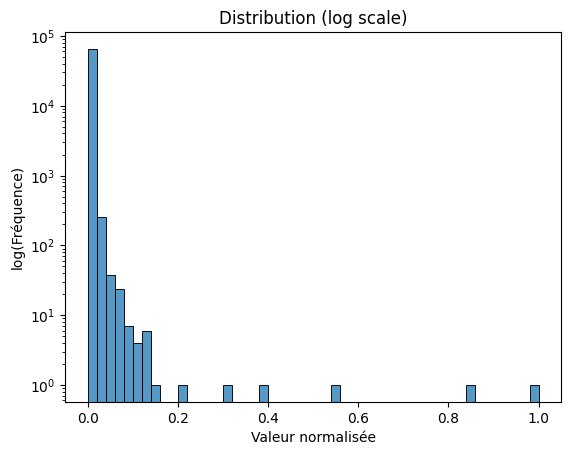

In [404]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(ConvertedCompYearly_Normalized, bins=50)
plt.yscale('log')  # Échelle logarithmique
plt.title("Distribution (log scale)")
plt.xlabel("Valeur normalisée")
plt.ylabel("log(Fréquence)")
plt.show()


# Préparation des données / mise en forme des données

In [44]:
l = list(df.columns)
print(l)

['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',

In [45]:
l = list(df['LearnCode'].unique())
print(l)

['Books / Physical media', 'Books / Physical media;Colleague;On the job training;Other online resources (e.g., videos, blogs, forum, online community)', 'Books / Physical media;Colleague;On the job training;Other online resources (e.g., videos, blogs, forum, online community);School (i.e., University, College, etc)', 'Other online resources (e.g., videos, blogs, forum, online community);School (i.e., University, College, etc);Online Courses or Certification', 'Other online resources (e.g., videos, blogs, forum, online community)', 'School (i.e., University, College, etc);Online Courses or Certification', 'Other online resources (e.g., videos, blogs, forum, online community);Online Courses or Certification;Coding Bootcamp', 'Books / Physical media;Other online resources (e.g., videos, blogs, forum, online community);Online Courses or Certification', 'On the job training;Other online resources (e.g., videos, blogs, forum, online community);School (i.e., University, College, etc)', 'Books

## EdLevel

In [46]:
df['EdLevel'].value_counts()

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          24942
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15557
Some college/university study without earning a degree                                 7651
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     5793
Unknown                                                                                4653
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         2970
Associate degree (A.A., A.S., etc.)                                                    1793
Primary/elementary school                                                              1146
Something else                                                                          932
Name: count, dtype: int64

Standardize entries in columns EdLevel by mapping inconsistent values to a consistent format

In [47]:
correct_EdLevel = {
    'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 'Bachelor’s degree',
    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 'Master’s degree',
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 'Secondary school',
    'Professional degree (JD, MD, Ph.D, Ed.D, etc.)': 'Professional degree',
    'Associate degree (A.A., A.S., etc.)': 'Associate degree'
}
df['EdLevel'] = df['EdLevel'].replace(correct_EdLevel)

In [48]:
df['EdLevel'].value_counts()

EdLevel
Bachelor’s degree                                         24942
Master’s degree                                           15557
Some college/university study without earning a degree     7651
Secondary school                                           5793
Unknown                                                    4653
Professional degree                                        2970
Associate degree                                           1793
Primary/elementary school                                  1146
Something else                                              932
Name: count, dtype: int64

## Country

In [49]:
l = list(df['Country'].unique())
print(l)

['United States of America', 'United Kingdom of Great Britain and Northern Ireland', 'Canada', 'Norway', 'Uzbekistan', 'Serbia', 'Poland', 'Philippines', 'Bulgaria', 'Switzerland', 'India', 'Germany', 'Ireland', 'Italy', 'Ukraine', 'Australia', 'Brazil', 'Japan', 'Austria', 'Iran, Islamic Republic of...', 'France', 'Saudi Arabia', 'Romania', 'Turkey', 'Nepal', 'Algeria', 'Sweden', 'Netherlands', 'Croatia', 'Pakistan', 'Czech Republic', 'Republic of North Macedonia', 'Finland', 'Slovakia', 'Russian Federation', 'Greece', 'Israel', 'Belgium', 'Mexico', 'United Republic of Tanzania', 'Hungary', 'Argentina', 'Portugal', 'Sri Lanka', 'Latvia', 'China', 'Singapore', 'Lebanon', 'Spain', 'South Africa', 'Lithuania', 'Viet Nam', 'Dominican Republic', 'Indonesia', 'Kosovo', 'Morocco', 'Taiwan', 'Georgia', 'San Marino', 'Tunisia', 'Bangladesh', 'Nigeria', 'Liechtenstein', 'Denmark', 'Ecuador', 'Malaysia', 'Albania', 'Azerbaijan', 'Chile', 'Ghana', 'Peru', 'Bolivia', 'Egypt', 'Luxembourg', 'Monten

In [50]:
correct_Country = {
    'United States of America': 'USA',
    'United Kingdom of Great Britain and Northern Ireland': 'UK and Northern Ireland',
    'United Republic of Tanzania': 'Tanzania',
    'Hong Kong (S.A.R.)': 'Hong Kong',
    'Democratic Republic of the Congo': 'RD Congo',
    'Syrian Arab Republic': 'Syria',
    'Congo, Republic of the...': 'RD Congo',
    'Libyan Arab Jamahiriya': 'Libya',
    'Brunei Darussalam': 'Brunei',
    'Micronesia, Federated States of...': 'Federated States of Micronesia',
    'Iran, Islamic Republic of...': 'Iran',
    'Russian Federation': 'Russia',
    'Venezuela, Bolivarian Republic of...': 'Venezuela',
    'Lao People\'s Democratic Republic': 'Laos'
}
df['Country'] = df['Country'].replace(correct_Country)

In [51]:
l = list(df['Country'].unique())
print(l)

['USA', 'UK and Northern Ireland', 'Canada', 'Norway', 'Uzbekistan', 'Serbia', 'Poland', 'Philippines', 'Bulgaria', 'Switzerland', 'India', 'Germany', 'Ireland', 'Italy', 'Ukraine', 'Australia', 'Brazil', 'Japan', 'Austria', 'Iran', 'France', 'Saudi Arabia', 'Romania', 'Turkey', 'Nepal', 'Algeria', 'Sweden', 'Netherlands', 'Croatia', 'Pakistan', 'Czech Republic', 'Republic of North Macedonia', 'Finland', 'Slovakia', 'Russia', 'Greece', 'Israel', 'Belgium', 'Mexico', 'Tanzania', 'Hungary', 'Argentina', 'Portugal', 'Sri Lanka', 'Latvia', 'China', 'Singapore', 'Lebanon', 'Spain', 'South Africa', 'Lithuania', 'Viet Nam', 'Dominican Republic', 'Indonesia', 'Kosovo', 'Morocco', 'Taiwan', 'Georgia', 'San Marino', 'Tunisia', 'Bangladesh', 'Nigeria', 'Liechtenstein', 'Denmark', 'Ecuador', 'Malaysia', 'Albania', 'Azerbaijan', 'Chile', 'Ghana', 'Peru', 'Bolivia', 'Egypt', 'Luxembourg', 'Montenegro', 'Cyprus', 'Paraguay', 'Kazakhstan', 'Slovenia', 'Jordan', 'Venezuela', 'Costa Rica', 'Jamaica', 'T

## Employment

In [52]:
l = list(df['Employment'].unique())
print(l)

['Employed, full-time', 'Student, full-time', 'Student, full-time;Not employed, but looking for work', 'Independent contractor, freelancer, or self-employed', 'Not employed, and not looking for work', 'Employed, full-time;Student, part-time', 'Employed, full-time;Independent contractor, freelancer, or self-employed', 'Employed, full-time;Student, full-time', 'Employed, part-time', 'Student, full-time;Employed, part-time', 'Student, part-time;Employed, part-time', 'I prefer not to say', 'Not employed, but looking for work', 'Student, part-time', 'Employed, full-time;Student, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time', 'Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time', 'Independent contractor, freelancer, or self-employed;Employed, part-time', 'Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time', 'Student, full-time;Not employed, but looking for work;Independent c

In [53]:
df_employement = pd.DataFrame(df['Employment'])

In [54]:
# Liste des catégories possibles
categories = [
    'Employed, full-time', 'Employed, part-time', 'Student, full-time', 'Student, part-time',
    'Independent contractor, freelancer, or self-employed', 'Not employed, and not looking for work',
    'Not employed, but looking for work', 'Retired', 'I prefer not to say'
]

# Créer une colonne binaire pour chaque catégorie
for category in categories:
    df_employement[category] = df_employement['Employment'].apply(lambda x: 1 if category in x else 0)

df_employement.head()

Employment  Employed, full-time  Employed, part-time  \
0  Employed, full-time                    1                    0   
1  Employed, full-time                    1                    0   
2  Employed, full-time                    1                    0   
3   Student, full-time                    0                    0   
4   Student, full-time                    0                    0   

   Student, full-time  Student, part-time  \
0                   0                   0   
1                   0                   0   
2                   0                   0   
3                   1                   0   
4                   1                   0   

   Independent contractor, freelancer, or self-employed  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0      

   Not employed, and not looking for work  Not employed, but looking for work  \
0                                       0                                   0   
1                                       0                                   0   
2                                       0                                   0   
3                                       0                                   0   
4                                       0                                   0   

   Retired  I prefer not to say  
0        0                    0  
1        0                    0  
2        0                    0  
3        0                    0  
4        0                    0

## YearsCodePro

In [55]:
df_ycp = pd.DataFrame(df['YearsCodePro'].unique())
# Fonction pour classer les années en niveaux d'expérience
def categorize_experience(years):
    if isinstance(years, str):
        if 'More than 50 years' in years:
            return 'Expert'
        elif 'Less than 1 year' in years:
            return 'Débutant'
        elif years.isdigit():
            years = int(years)
            if years < 3:
                return 'Débutant'
            elif years <= 5:
                return 'Intermédiaire'
            elif years <= 10:
                return 'Expérimenté'
            else:
                return 'Expert'

# Appliquer la fonction pour créer la nouvelle colonne 'ExperienceLevel'
df['ExperienceLevel'] = df['YearsCodePro'].apply(categorize_experience)


# Visualisation des données 

### Educational attainment

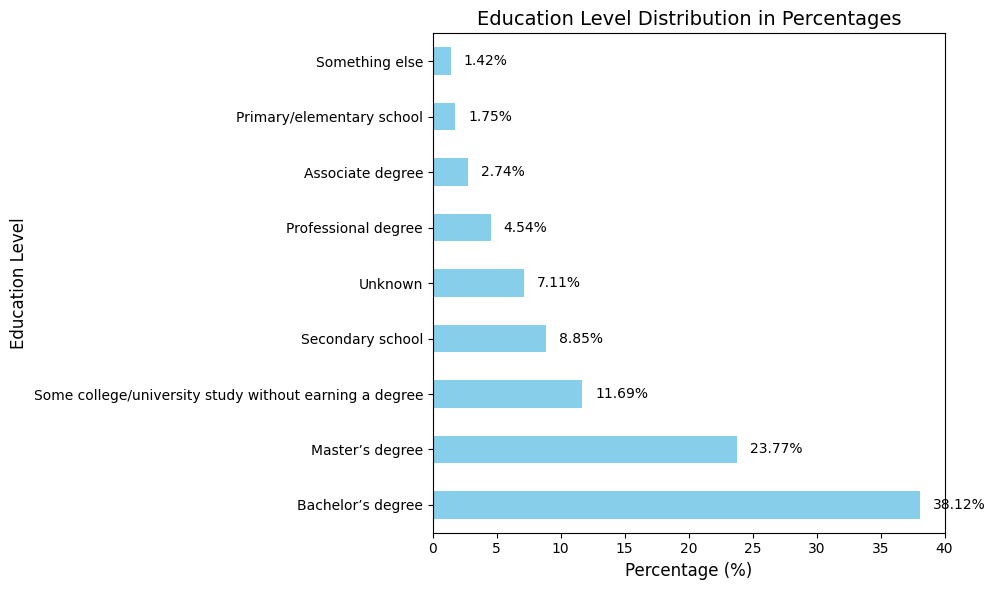

In [56]:
import matplotlib.pyplot as plt

# Compter le nombre d'occurrences de chaque niveau d'éducation
education_counts = df['EdLevel'].value_counts()

# Calculer les pourcentages
education_percentages = (education_counts / education_counts.sum()) * 100

# Créer un graphique à barres horizontales
plt.figure(figsize=(10, 6))  # Taille de la figure
education_percentages.plot(kind='barh', color='skyblue')  # Création du graphique à barres horizontales

# Ajouter un titre et des labels
plt.title('Education Level Distribution in Percentages', fontsize=14)
plt.xlabel('Percentage (%)', fontsize=12)
plt.ylabel('Education Level', fontsize=12)

# Afficher les pourcentages à côté de chaque barre
for i, v in enumerate(education_percentages):
    plt.text(v + 1, i, f'{v:.2f}%', va='center', fontsize=10)

# Afficher le graphique
plt.tight_layout()  # Ajuster la disposition pour éviter que le texte se chevauche
plt.show()


### Learning to code

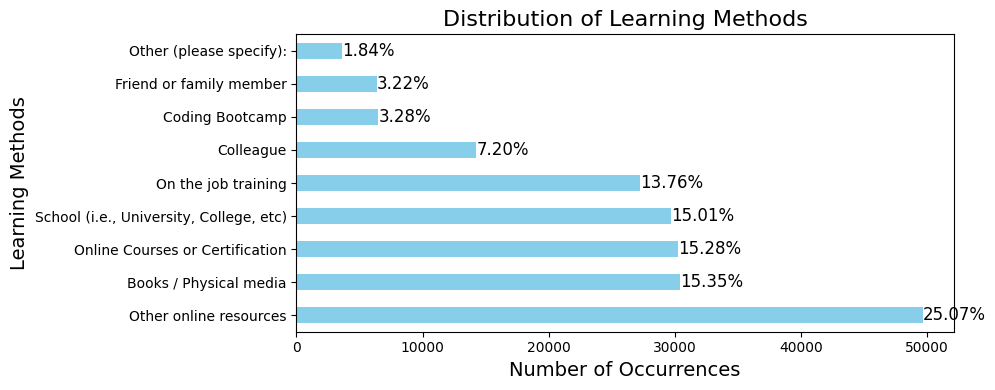

In [57]:
# Split the 'LearnCode' values into lists (each value separated by a semicolon)
learncode_split = df['LearnCode'].str.split(';')

# Count the occurrences of each learning method
learncode_counts = learncode_split.explode().value_counts()
learncode_counts.index = learncode_counts.index.str.replace(
    'Other online resources (e.g., videos, blogs, forum, online community)', 
    'Other online resources'
)


# Calculate percentages
learncode_percentages = (learncode_counts / learncode_counts.sum()) * 100

# Visualize the results as a horizontal bar chart with percentages
plt.figure(figsize=(10, 4))  # Set the size of the plot
ax = learncode_counts.plot(kind='barh', color='skyblue')  # Create the horizontal bar chart

# Add percentages as labels on the bars
for idx, rect in enumerate(ax.patches):
    ax.text(rect.get_width(), rect.get_y() + rect.get_height() / 2, 
            f'{learncode_percentages[learncode_counts.index[idx]]:.2f}%', 
            va='center', ha='left', fontsize=12)

plt.title('Distribution of Learning Methods', fontsize=16)  # Title of the plot
plt.xlabel('Number of Occurrences', fontsize=14)  # Label for the X-axis
plt.ylabel('Learning Methods', fontsize=14)  # Label for the Y-axis
plt.tight_layout()  # Adjust layout to prevent text from overlapping
plt.show()  # Display the plot


### Experience

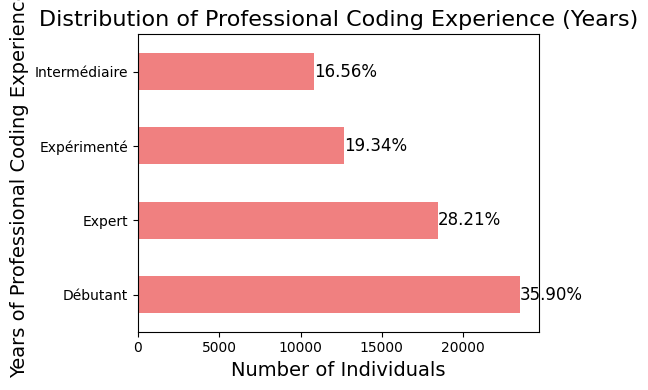

In [416]:
# Count the occurrences of each unique value in 'YearsCodePro'
years_code_pro_counts = df['ExperienceLevel'].value_counts()

# Visualize the data as a horizontal bar chart
plt.figure(figsize=(6, 4))
ax = years_code_pro_counts.plot(kind='barh', color='lightcoral')

# Add percentages as labels on the bars
for idx, rect in enumerate(ax.patches):
    ax.text(rect.get_width(), rect.get_y() + rect.get_height() / 2, 
            f'{(rect.get_width() / years_code_pro_counts.sum()) * 100:.2f}%', 
            va='center', ha='left', fontsize=12)

plt.title('Distribution of Professional Coding Experience (Years)', fontsize=16)
plt.xlabel('Number of Individuals', fontsize=14)
plt.ylabel('Years of Professional Coding Experience', fontsize=14)
plt.tight_layout()
plt.show()


### Developer type

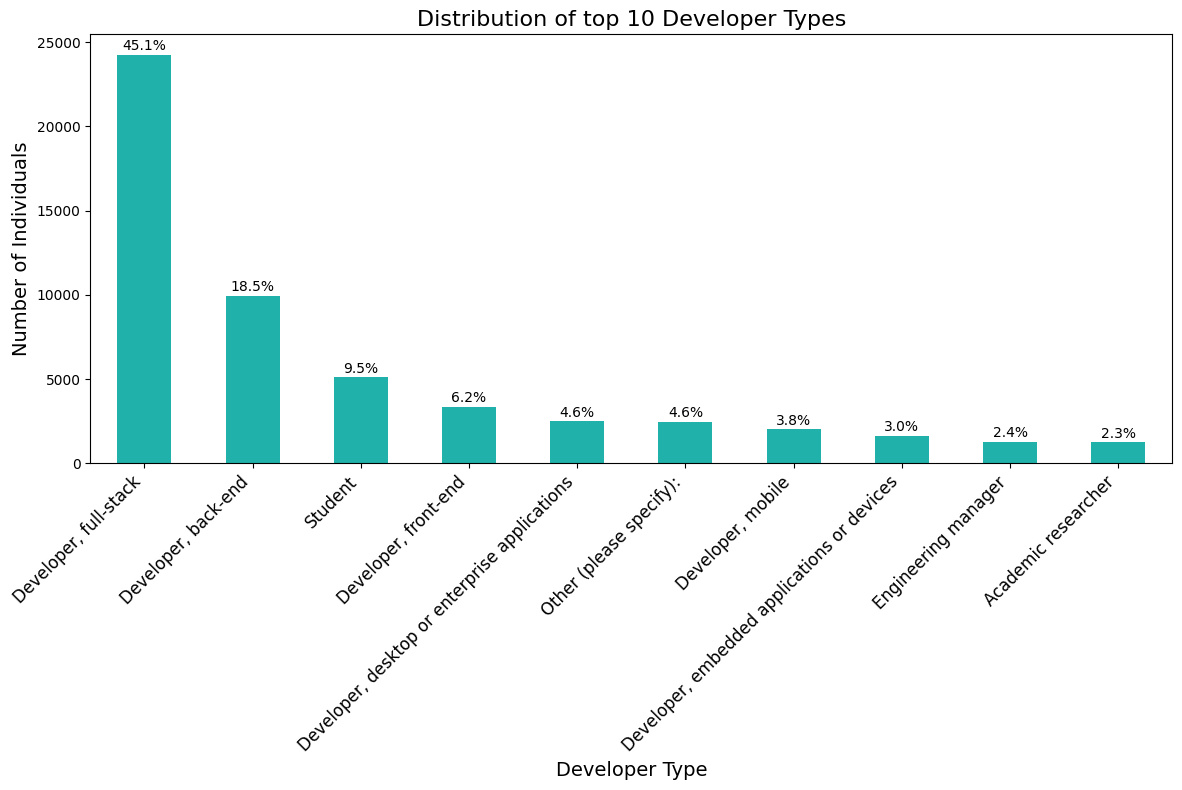

In [410]:
# Count the occurrences of each unique value in 'DevType'
dev_type_counts = df['DevType'].value_counts().head(10)
total = dev_type_counts.sum()

# Visualize the data as a bar chart
plt.figure(figsize=(12, 8))
ax = dev_type_counts.plot(kind='bar', color='lightseagreen')

# Annotate each bar with its percentage
for i, count in enumerate(dev_type_counts):
    percent = (count / total) * 100
    ax.text(i, count + total * 0.005, f'{percent:.1f}%', ha='center', fontsize=10)

# Set labels and title
plt.title('Distribution of top 10 Developer Types', fontsize=16)
plt.xlabel('Developer Type', fontsize=14)
plt.ylabel('Number of Individuals', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()


### Key territories

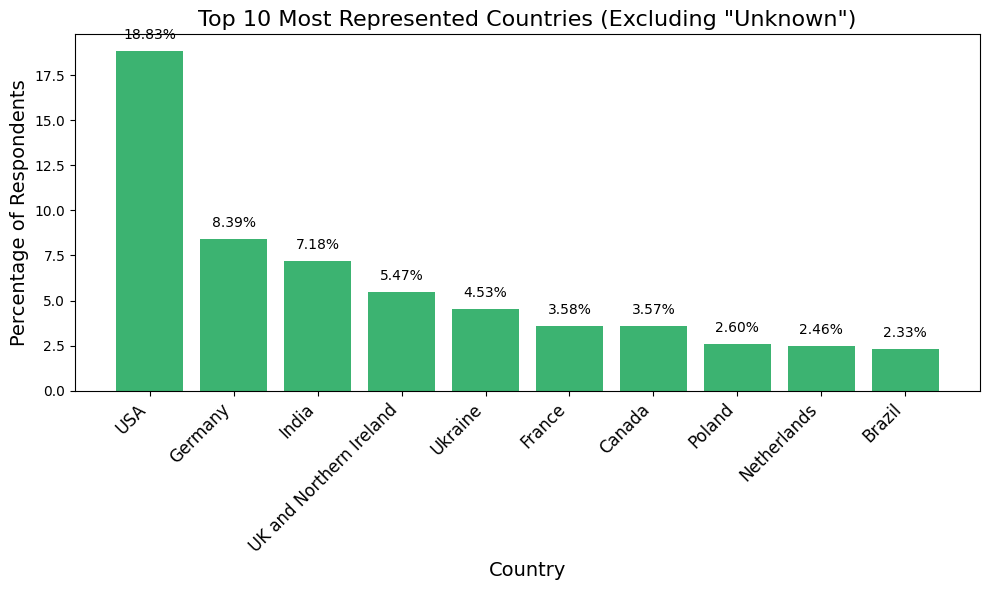

In [60]:
# Filtrer les lignes dont le pays est différent de 'Unknown'
df_filtered = df[df['Country'] != 'Unknown']

# Calcul des pourcentages
top_countries_pct = (df_filtered['Country'].value_counts(normalize=True).nlargest(10)) * 100

# Création du graphique
plt.figure(figsize=(10, 6))
bars = plt.bar(top_countries_pct.index, top_countries_pct.values, color='mediumseagreen')

# Affichage du pourcentage au-dessus de chaque barre
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, 
             f'{height:.2f}%', ha='center', va='bottom', fontsize=10)

# Titre et labels
plt.title('Top 10 Most Represented Countries (Excluding "Unknown")', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Percentage of Respondents', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)

plt.tight_layout()
plt.show()


### Demographics

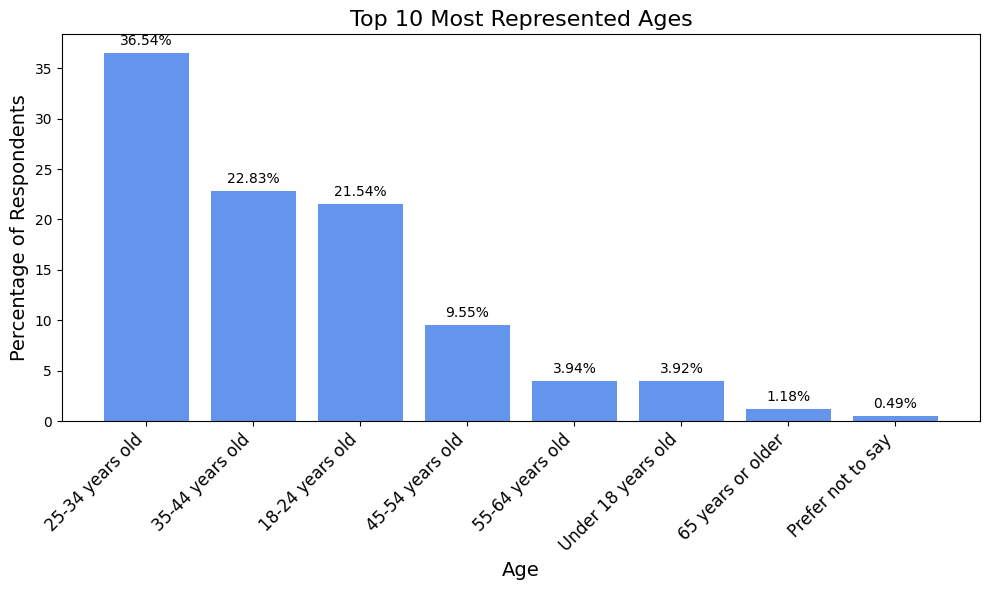

In [61]:
# Supprimer les valeurs manquantes dans la colonne 'Age'
df_age_filtered = df[df['Age'].notna()]

# Calcul des pourcentages des 10 âges les plus fréquents
top_ages_pct = df_age_filtered['Age'].value_counts(normalize=True).nlargest(10) * 100

# Création du graphique
plt.figure(figsize=(10, 6))
bars = plt.bar(top_ages_pct.index.astype(str), top_ages_pct.values, color='cornflowerblue')

# Affichage des pourcentages sur les barres
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5,
             f'{height:.2f}%', ha='center', va='bottom', fontsize=10)

# Titre et axes
plt.title('Top 10 Most Represented Ages', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Percentage of Respondents', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)

plt.tight_layout()
plt.show()


In [405]:
df['Age'].unique()

array(['Under 18 years old', '35-44 years old', '45-54 years old',
       '18-24 years old', '25-34 years old', '55-64 years old',
       'Prefer not to say', '65 years or older'], dtype=object)

### Analysis of Experience and Job Satisfaction

Analyze the relationship between years of professional coding experience (YearsCodePro) and job satisfaction (JobSat). Summarize YearsCodePro and calculate median satisfaction scores based on experience ranges.
Experience ranges for YearsCodePro (e.g., 0-5, 5-10, 10-20, >20 years).
Calculate the median JobSat for each range.
Visualize the relationship using a bar plot or similar visualization.

In [62]:
# Copy the dataframe
df_cleaned = df.copy()

# Replace special strings and convert to float
df_cleaned['YearsCodePro'] = df_cleaned['YearsCodePro'].replace({
    'Less than 1 year': 0,
    'More than 50 years': 51
}).astype(float)

# Define ExperienceLevel bins
bins = [0, 1, 3, 5, 10, 20, 51]
labels = ['<1 year', '1–3 years', '3–5 years', '5–10 years', '10–20 years', '20+ years']
df_cleaned['ExperienceLevel'] = pd.cut(df_cleaned['YearsCodePro'], bins=bins, labels=labels, right=False)

In [63]:
# Remove rows where either ExperienceLevel or JobSat is missing
df_filtered = df_cleaned.dropna(subset=['ExperienceLevel', 'JobSat'])

# Ensure JobSat is numeric (float)
df_filtered['JobSat'] = pd.to_numeric(df_filtered['JobSat'], errors='coerce')

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\37149685.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['JobSat'] = pd.to_numeric(df_filtered['JobSat'], errors='coerce')


In [64]:
# Calculate median satisfaction per experience level
satisfaction_by_experience = df_filtered.groupby('ExperienceLevel')['JobSat'].median().reset_index()

# Rename for clarity
satisfaction_by_experience.columns = ['ExperienceLevel', 'MedianJobSatisfaction']

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\3878217397.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  satisfaction_by_experience = df_filtered.groupby('ExperienceLevel')['JobSat'].median().reset_index()


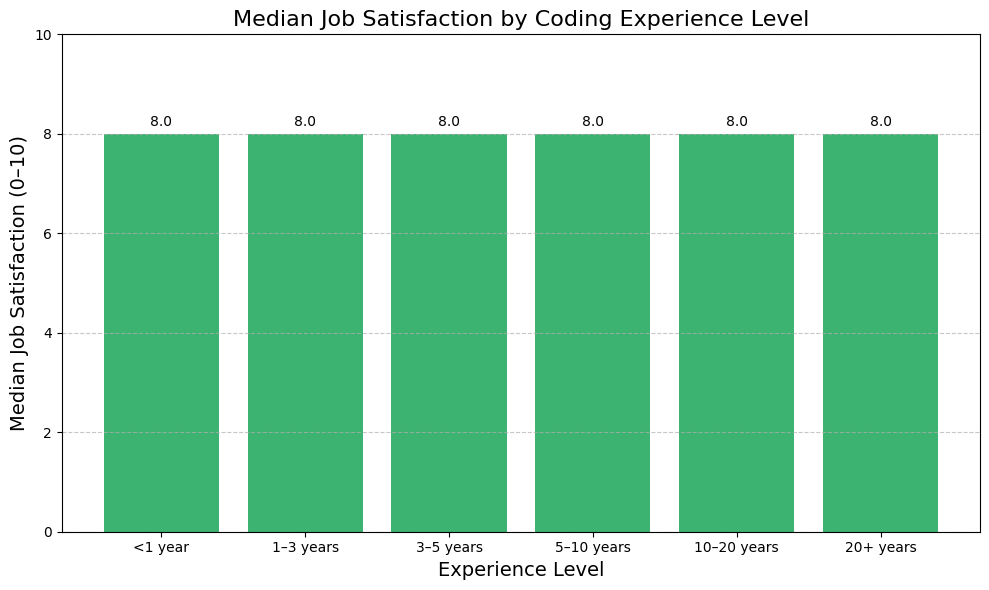

In [65]:
plt.figure(figsize=(10, 6))
bars = plt.bar(satisfaction_by_experience['ExperienceLevel'], 
               satisfaction_by_experience['MedianJobSatisfaction'], 
               color='mediumseagreen')

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.1, f'{height:.1f}',
             ha='center', va='bottom', fontsize=10)

plt.title('Median Job Satisfaction by Coding Experience Level', fontsize=16)
plt.xlabel('Experience Level', fontsize=14)
plt.ylabel('Median Job Satisfaction (0–10)', fontsize=14)
plt.ylim(0, 10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Visualize Job Satisfaction

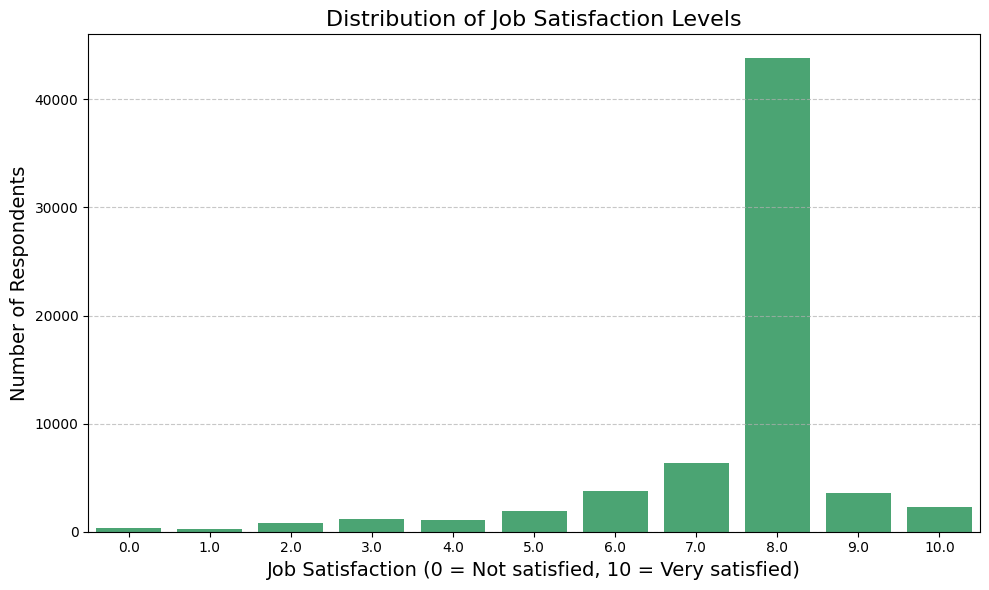

In [66]:
# Drop missing JobSat values
df_jobsat = df.dropna(subset=['JobSat'])

# Convert JobSat to numeric if not already
df_jobsat['JobSat'] = pd.to_numeric(df_jobsat['JobSat'], errors='coerce')

# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df_jobsat, x='JobSat', color='mediumseagreen')

# Add labels and title
plt.title('Distribution of Job Satisfaction Levels', fontsize=16)
plt.xlabel('Job Satisfaction (0 = Not satisfied, 10 = Very satisfied)', fontsize=14)
plt.ylabel('Number of Respondents', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


### Analyzing Remote Work Preferences by Job Role

In [67]:
# Ajouter la colonne RemoteWork au DataFrame
df_employement['RemoteWork'] = df['RemoteWork']

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\844434933.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_remote, x='RemoteWork', order=df_remote['RemoteWork'].value_counts().index, palette='Set2')


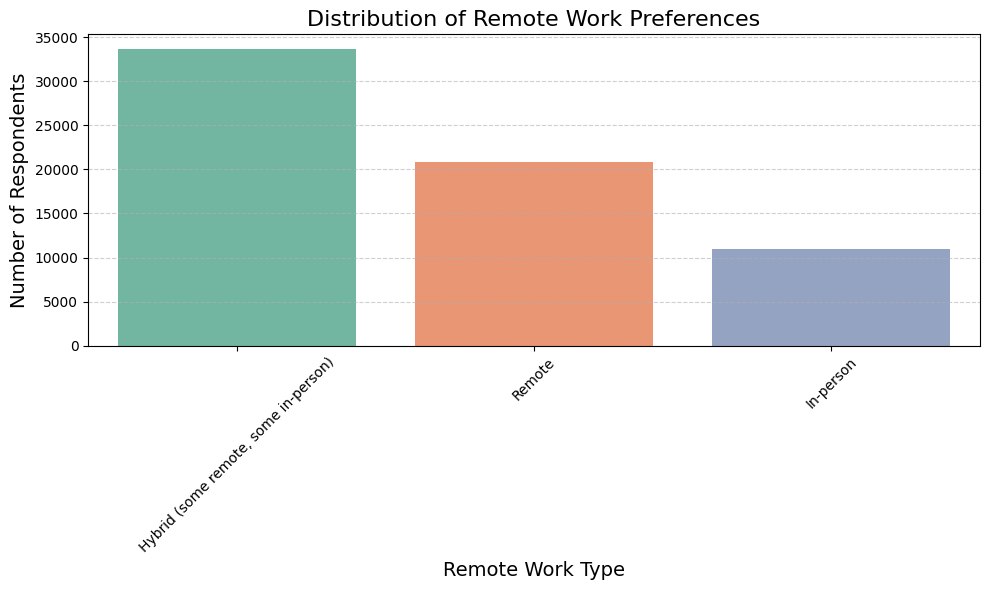

In [68]:
# Drop missing values for RemoteWork
df_remote = df_employement.dropna(subset=['RemoteWork'])

# Count plot of remote work preferences
plt.figure(figsize=(10, 6))
sns.countplot(data=df_remote, x='RemoteWork', order=df_remote['RemoteWork'].value_counts().index, palette='Set2')

# Labeling
plt.title('Distribution of Remote Work Preferences', fontsize=16)
plt.xlabel('Remote Work Type', fontsize=14)
plt.ylabel('Number of Respondents', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [69]:
# Initialiser un dictionnaire pour stocker les résultats
remote_by_employment = {}

# Pour chaque statut d'emploi binaire
for category in categories:
    # Filtrer uniquement les lignes où ce statut est actif
    subset = df_employement[df_employement[category] == 1]
    
    # Compter les types de RemoteWork dans cette catégorie
    remote_dist = subset['RemoteWork'].value_counts(normalize=True) * 100
    remote_by_employment[category] = remote_dist

# Convertir en DataFrame
remote_by_employment_df = pd.DataFrame(remote_by_employment).T.fillna(0).round(2)

# Afficher la table
print("Remote work distribution by employment category (%):")
display(remote_by_employment_df)


Remote work distribution by employment category (%):


RemoteWork                                          Hybrid (some remote, some in-person)  \
Employed, full-time                                                                43.63   
Employed, part-time                                                                46.37   
Student, full-time                                                                 81.32   
Student, part-time                                                                 59.90   
Independent contractor, freelancer, or self-emp...                                 32.56   
Not employed, and not looking for work                                             91.52   
Not employed, but looking for work                                                 87.23   
Retired                                                                            87.96   
I prefer not to say                                                               100.00   

RemoteWork                                          In-person  Remote  
Employed, full-time                                     21.27   35.10  
Employed, part-time                                     24.44   29.19  
Student, full-time                                       8.75    9.92  
Student, part-time                                      18.67   21.42  
Independent contractor, freelancer, or self-emp...       8.40   59.04  
Not employed, and not looking for work                   1.41    7.07  
Not employed, but looking for work                       1.85   10.93  
Retired                                                  3.08    8.96  
I prefer not to say                                      0.00    0.00

In [70]:
# Drop missing values
df_remote_job = df.dropna(subset=['RemoteWork', 'DevType'])

# We'll focus on top 10 job types to keep it readable
top_roles = df_remote_job['DevType'].value_counts().nlargest(10).index
df_filtered = df_remote_job[df_remote_job['DevType'].isin(top_roles)]

# Cross-tabulate
remote_vs_role = pd.crosstab(df_filtered['DevType'], df_filtered['RemoteWork'], normalize='index') * 100
remote_vs_role = remote_vs_role.round(2)

# Display
print("Remote Work Preferences by Job Role (%):")
display(remote_vs_role)


Remote Work Preferences by Job Role (%):


RemoteWork                                     Hybrid (some remote, some in-person)  \
DevType                                                                               
Academic researcher                                                           65.67   
Developer, back-end                                                           44.63   
Developer, desktop or enterprise applications                                 47.21   
Developer, embedded applications or devices                                   51.63   
Developer, front-end                                                          44.97   
Developer, full-stack                                                         47.51   
Developer, mobile                                                             42.90   
Engineering manager                                                           49.57   
Other (please specify):                                                       55.49   
Student                                                                       90.93   

RemoteWork                                     In-person  Remote  
DevType                                                           
Academic researcher                                25.04    9.29  
Developer, back-end                                13.28   42.09  
Developer, desktop or enterprise applications      23.63   29.16  
Developer, embedded applications or devices        32.96   15.40  
Developer, front-end                               14.96   40.07  
Developer, full-stack                              18.13   34.36  
Developer, mobile                                  17.22   39.88  
Engineering manager                                12.55   37.88  
Other (please specify):                            20.14   24.37  
Student                                             5.25    3.82

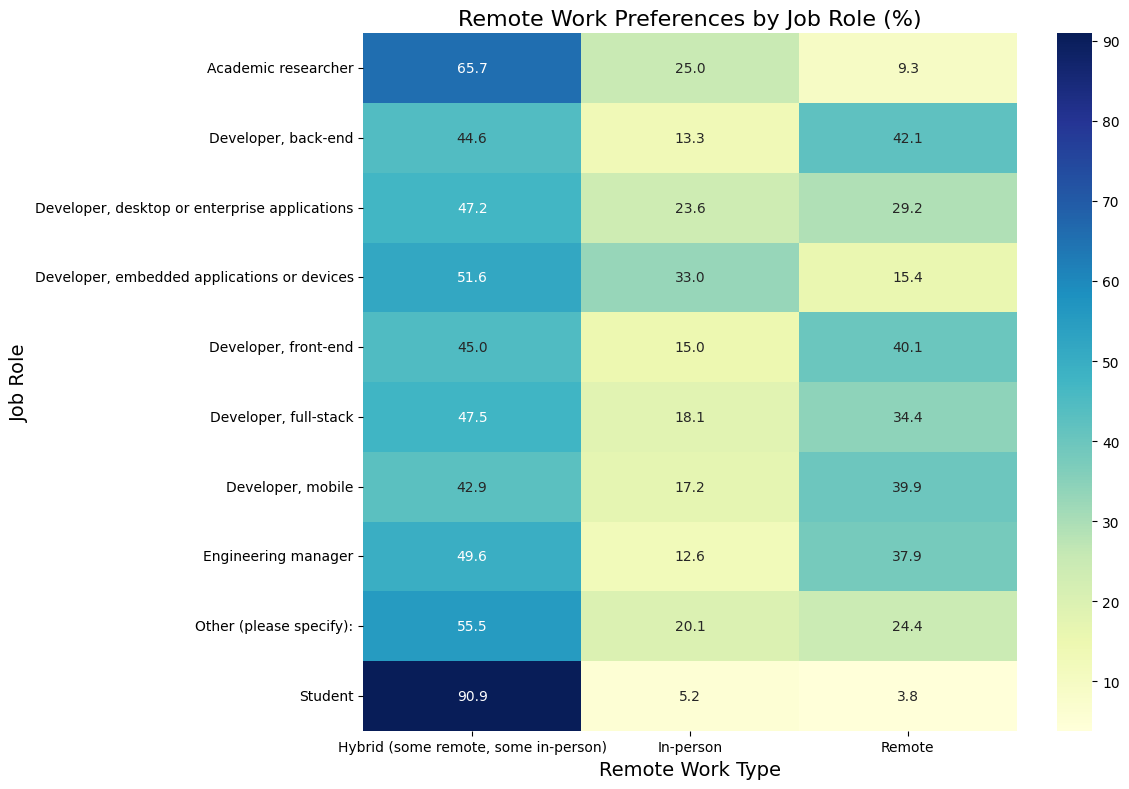

In [71]:
plt.figure(figsize=(12, 8))
sns.heatmap(remote_vs_role, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Remote Work Preferences by Job Role (%)', fontsize=16)
plt.xlabel('Remote Work Type', fontsize=14)
plt.ylabel('Job Role', fontsize=14)
plt.tight_layout()
plt.show()


In [72]:
# Tableau croisé entre RemoteWork et DevType (ou Employment)
remote_by_job = pd.crosstab(df['DevType'], df['RemoteWork'], normalize='index') * 100

# Afficher les 10 premiers métiers pour ne pas surcharger
remote_by_job = remote_by_job.sort_values(by='Remote', ascending=False).head(10)

# Afficher
print(remote_by_job)

RemoteWork                            Hybrid (some remote, some in-person)  \
DevType                                                                      
Blockchain                                                       28.510638   
Developer Advocate                                               33.333333   
Cloud infrastructure engineer                                    47.318612   
Developer, QA or test                                            44.761905   
Developer, back-end                                              44.631346   
Engineer, site reliability                                       44.838710   
Developer Experience                                             46.428571   
Developer, front-end                                             44.968647   
Developer, mobile                                                42.899555   
Senior Executive (C-Suite, VP, etc.)                             46.236559   

RemoteWork                            In-person     Remote  
De

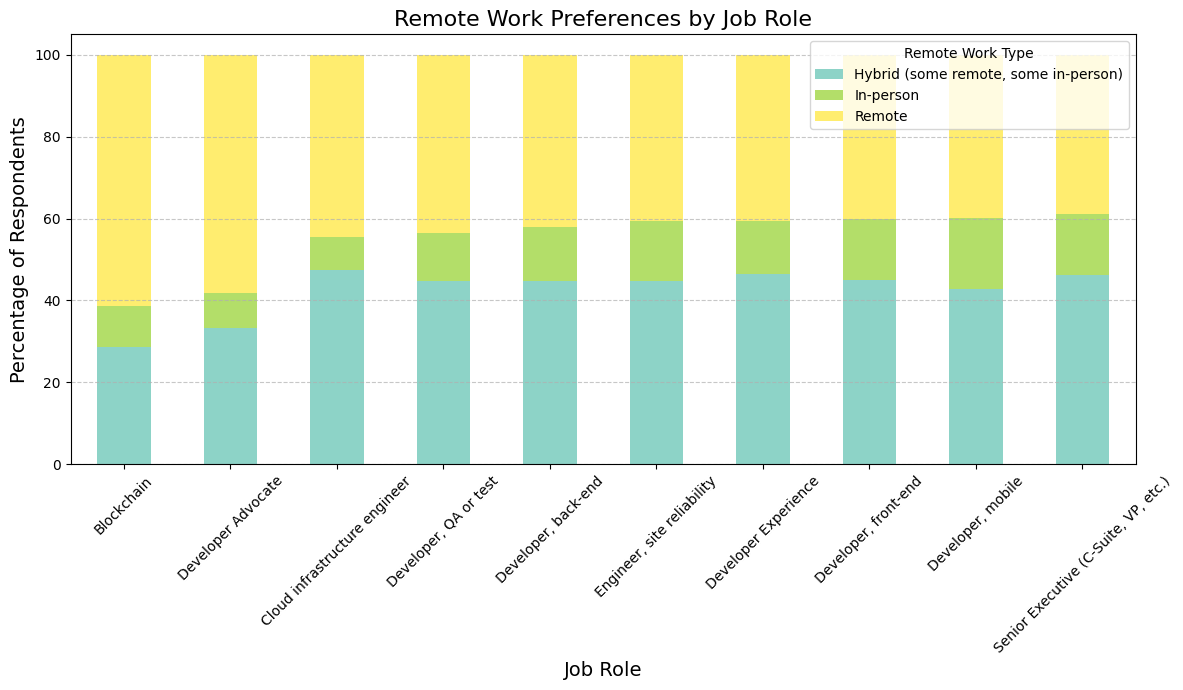

In [73]:
## Write your code here
remote_by_job.plot(kind='bar', stacked=True, figsize=(12,7), colormap='Set3')

plt.title('Remote Work Preferences by Job Role', fontsize=16)
plt.xlabel('Job Role', fontsize=14)
plt.ylabel('Percentage of Respondents', fontsize=14)
plt.legend(title='Remote Work Type')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Analyzing Programming Language Trends by Region
Analyze the popularity of programming languages by region. Use the LanguageHaveWorkedWith column to investigate which languages are most used in different regions.
Filter data by country or region.
Visualize the top programming languages by region with a bar plot and heatmap.

In [74]:
# Keep only necessary columns
df_lang_region = df[['Country', 'LanguageHaveWorkedWith']].dropna()
# Split the multiple languages into lists
df_lang_region['LanguageHaveWorkedWith'] = df_lang_region['LanguageHaveWorkedWith'].str.split(';')

# Explode each language into separate rows
df_lang_region = df_lang_region.explode('LanguageHaveWorkedWith')
# Count the number of occurrences of each language by country
lang_counts = df_lang_region.groupby(['Country', 'LanguageHaveWorkedWith']).size().reset_index(name='Count')
# Get top 10 countries by total number of responses
top_countries = df['Country'].value_counts().head(10).index.tolist()

# Filter the data
lang_counts_filtered = lang_counts[lang_counts['Country'].isin(top_countries)]

In [75]:
# Pivot table: rows = countries, columns = languages
lang_pivot = lang_counts_filtered.pivot_table(
    index='Country',
    columns='LanguageHaveWorkedWith',
    values='Count',
    fill_value=0
)

# Optional: Normalize by row to get percentage
lang_pivot_pct = lang_pivot.div(lang_pivot.sum(axis=1), axis=0) * 100


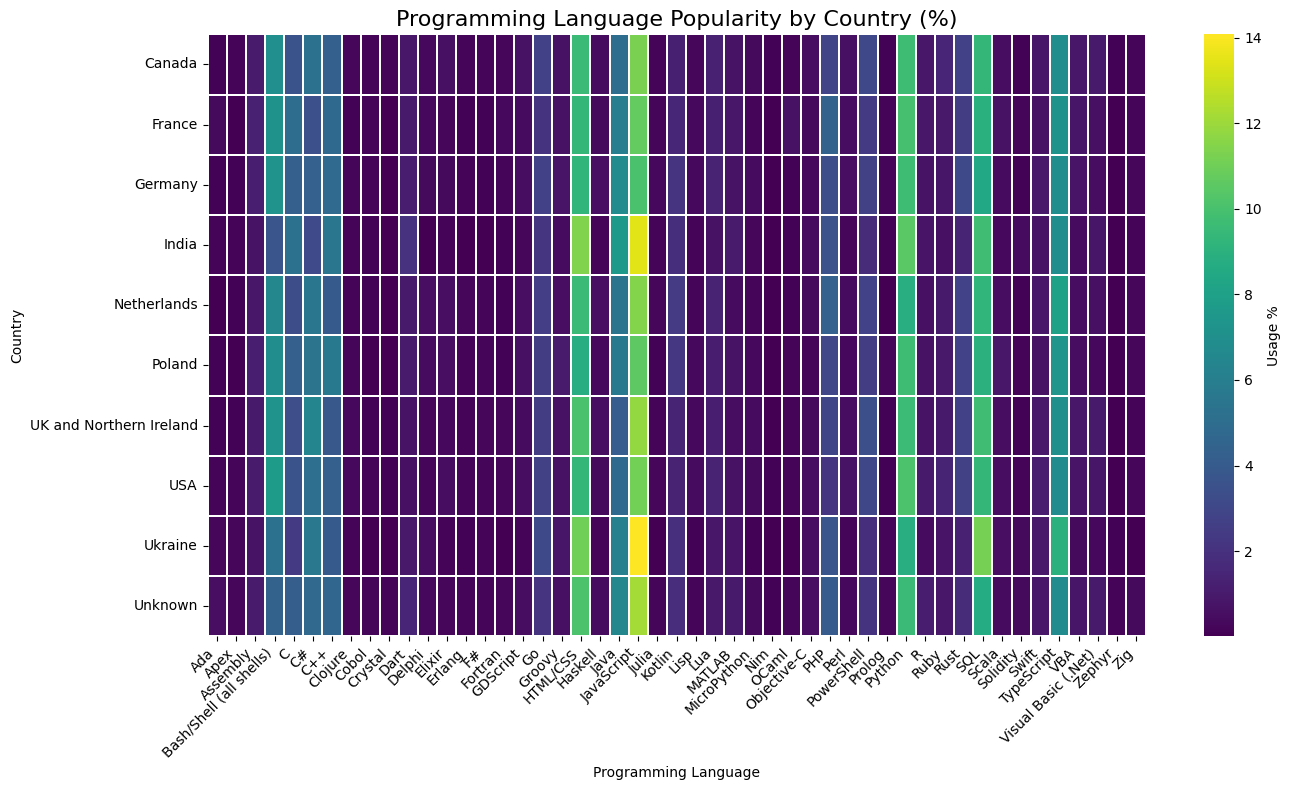

In [76]:
# Plot
plt.figure(figsize=(14, 8))
sns.heatmap(lang_pivot_pct, cmap='viridis', linewidths=0.3, annot=False, cbar_kws={'label': 'Usage %'})

plt.title('Programming Language Popularity by Country (%)', fontsize=16)
plt.xlabel('Programming Language')
plt.ylabel('Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\2794822785.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=us_lang_counts.values, y=us_lang_counts.index, palette='coolwarm')


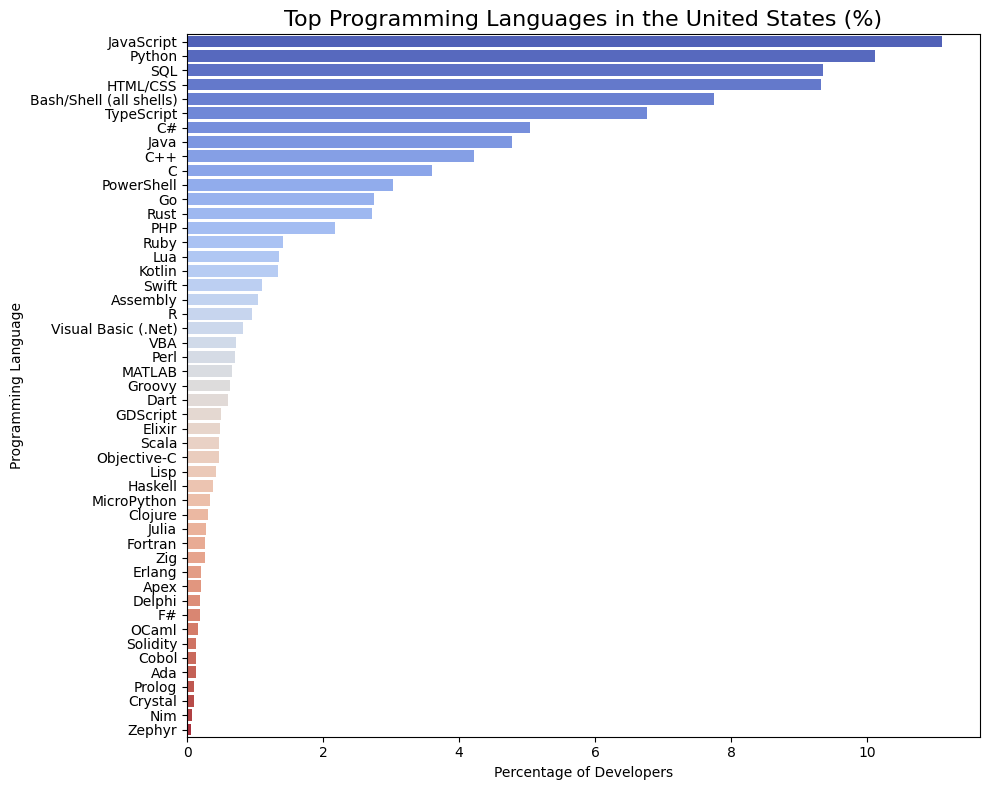

In [77]:
# Filter for a specific country
us_langs = df_lang_region[df_lang_region['Country'] == 'USA']
us_lang_counts = us_langs['LanguageHaveWorkedWith'].value_counts(normalize=True) * 100

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x=us_lang_counts.values, y=us_lang_counts.index, palette='coolwarm')
plt.title('Top Programming Languages in the United States (%)', fontsize=16)
plt.xlabel('Percentage of Developers')
plt.ylabel('Programming Language')
plt.tight_layout()
plt.show()


### Correlation Between Experience and Satisfaction (JobSatPoints_1)
Examine how years of experience (YearsCodePro) correlate with job satisfaction (JobSatPoints_1). Use a scatter plot to visualize this relationship.

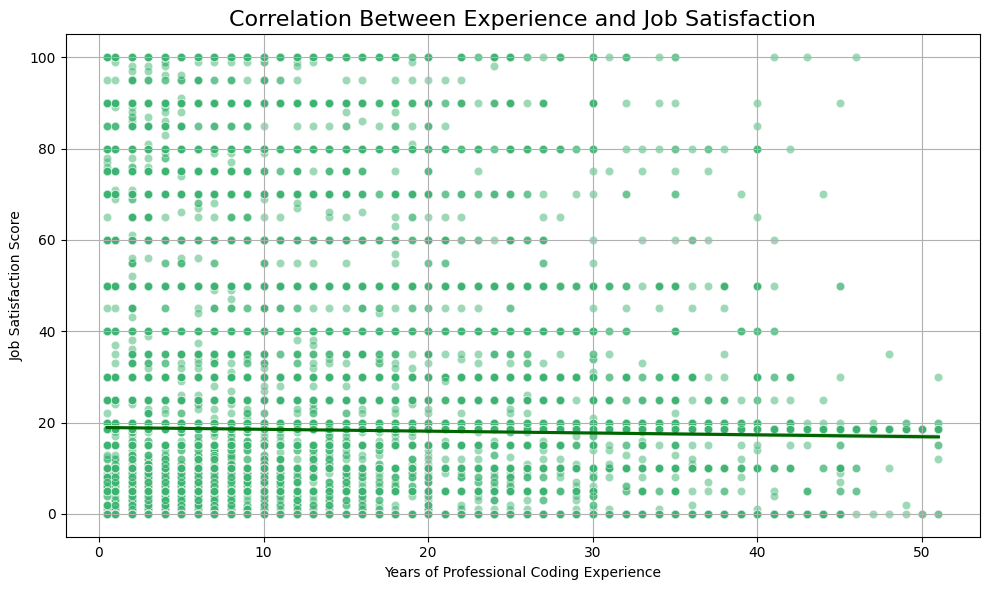

In [78]:
# --- Step 1: Copy relevant columns ---
df_corr = df[['YearsCodePro', 'JobSatPoints_1']].copy()

# --- Step 2: Clean and convert 'YearsCodePro' ---
def convert_experience(x):
    if pd.isna(x):
        return None
    elif x == 'Less than 1 year':
        return 0.5
    elif x == 'More than 50 years':
        return 51
    else:
        try:
            return float(x)
        except ValueError:
            return None

df_corr['YearsCodePro'] = df_corr['YearsCodePro'].apply(convert_experience)

# --- Step 3: Drop missing values ---
df_corr.dropna(subset=['YearsCodePro', 'JobSatPoints_1'], inplace=True)

# --- Step 4: Plot the scatter plot ---
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_corr,
    x='YearsCodePro',
    y='JobSatPoints_1',
    alpha=0.5,
    color='mediumseagreen'
)

# --- Optional: Add a trend line ---
sns.regplot(
    data=df_corr,
    x='YearsCodePro',
    y='JobSatPoints_1',
    scatter=False,
    color='darkgreen'
)

# --- Step 5: Customize the plot ---
plt.title('Correlation Between Experience and Job Satisfaction', fontsize=16)
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Score')
plt.grid(True)
plt.tight_layout()
plt.show()


### Correlation Between Experience and Satisfaction
Examine how years of experience (YearsCodePro) correlate with job satisfaction (JobSatPoints_1). Use a scatter plot to visualize this relationship.

In [79]:
import pandas as pd

# Drop rows with missing values in 'Employment' or 'EdLevel'
df_filtered = df.dropna(subset=['Employment', 'EdLevel']).copy()

# Split multiple employment types (if separated by ';')
df_filtered['Employment'] = df_filtered['Employment'].str.split(';')

# Explode the list so each employment type becomes its own row
df_exploded = df_filtered.explode('Employment')

# Remove any leading/trailing whitespace
df_exploded['Employment'] = df_exploded['Employment'].str.strip()


In [80]:
# Cross-tab: count of Employment types per EdLevel
edu_emp_crosstab = pd.crosstab(df_exploded['EdLevel'], df_exploded['Employment'])

# Normalize by row to show percentages
edu_emp_percent = edu_emp_crosstab.div(edu_emp_crosstab.sum(axis=1), axis=0) * 100

# Show a preview of the percentage table
edu_emp_percent.round(2).head()


Employment                 Employed, full-time  Employed, part-time  \
EdLevel                                                               
Associate degree                         57.59                 6.26   
Bachelor’s degree                        65.84                 4.62   
Master’s degree                          70.49                 4.25   
Primary/elementary school                13.92                 5.47   
Professional degree                      69.45                 4.48   

Employment                 I prefer not to say  \
EdLevel                                          
Associate degree                          0.41   
Bachelor’s degree                         0.33   
Master’s degree                           0.30   
Primary/elementary school                 3.53   
Professional degree                       0.87   

Employment                 Independent contractor, freelancer, or self-employed  \
EdLevel                                                                           
Associate degree                                                       14.76      
Bachelor’s degree                                                      12.77      
Master’s degree                                                        15.12      
Primary/elementary school                                              11.01      
Professional degree                                                    14.57      

Employment                 Not employed, and not looking for work  \
EdLevel                                                             
Associate degree                                             1.01   
Bachelor’s degree                                            0.78   
Master’s degree                                              0.62   
Primary/elementary school                                   10.73   
Professional degree                                          0.69   

Employment                 Not employed, but looking for work  Retired  \
EdLevel                                                                  
Associate degree                                         5.80     1.05   
Bachelor’s degree                                        5.16     0.68   
Master’s degree                                          3.13     0.84   
Primary/elementary school                                7.89     0.83   
Professional degree                                      2.58     3.36   

Employment                 Student, full-time  Student, part-time  
EdLevel                                                            
Associate degree                         8.64                4.48  
Bachelor’s degree                        7.00                2.81  
Master’s degree                          3.30                1.95  
Primary/elementary school               40.37                6.23  
Professional degree                      2.61                1.38

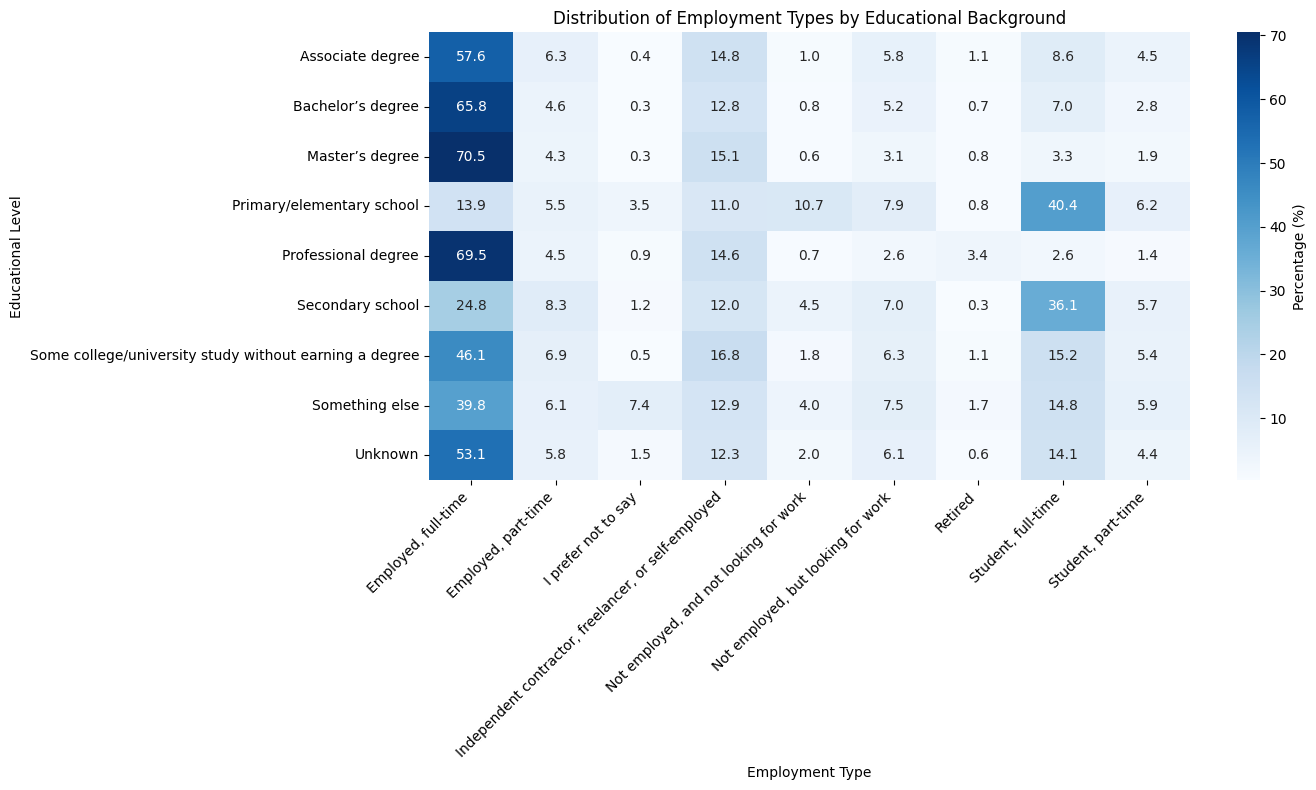

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
sns.heatmap(edu_emp_percent, annot=True, fmt=".1f", cmap="Blues", cbar_kws={'label': 'Percentage (%)'})
plt.title('Distribution of Employment Types by Educational Background')
plt.xlabel('Employment Type')
plt.ylabel('Educational Level')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


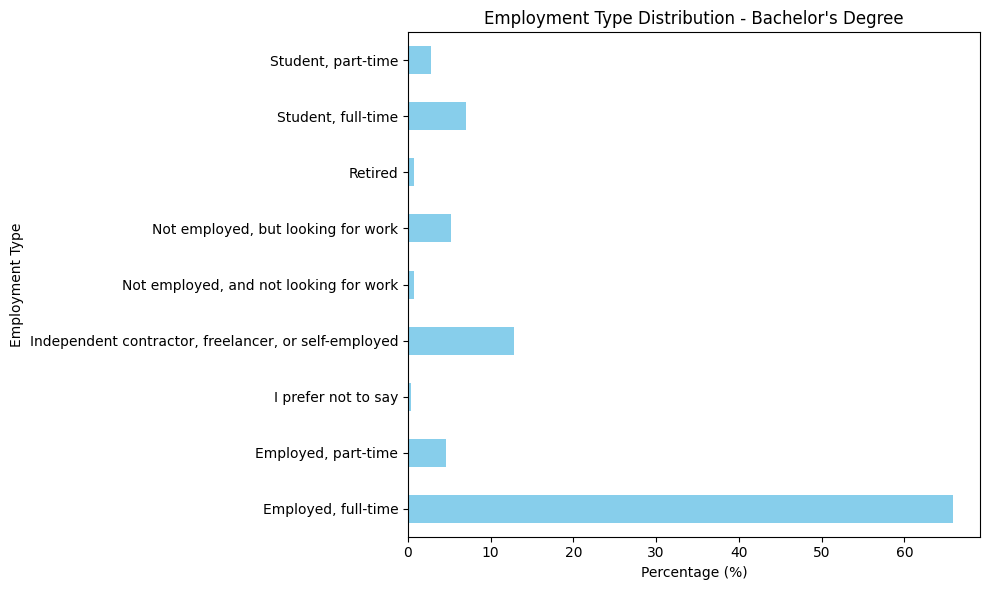

In [82]:
bachelor_percent = edu_emp_percent.loc[edu_emp_percent.index.str.contains("Bachelor", case=False)].T

bachelor_percent.plot(kind='barh', figsize=(10, 6), legend=False, color='skyblue')
plt.title("Employment Type Distribution - Bachelor's Degree")
plt.xlabel("Percentage (%)")
plt.ylabel("Employment Type")
plt.tight_layout()
plt.show()


### Educational Background and Employment Type
Explore how educational background (EdLevel) relates to employment type (Employment). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.

In [83]:
# Drop missing values in 'EdLevel' or 'Employment'
df_clean = df.dropna(subset=['EdLevel', 'Employment']).copy()

# Split multiple employment types separated by ';'
df_clean['Employment'] = df_clean['Employment'].str.split(';')

# Explode so each employment type has its own row
df_clean = df_clean.explode('Employment')

# Remove extra whitespace
df_clean['Employment'] = df_clean['Employment'].str.strip()

In [84]:
# Create a cross-tabulation of Education Level vs Employment Type
edu_emp_crosstab = pd.crosstab(df_clean['EdLevel'], df_clean['Employment'])

# Normalize by row to get percentages
edu_emp_percent = edu_emp_crosstab.div(edu_emp_crosstab.sum(axis=1), axis=0) * 100

# Round for readability
edu_emp_percent = edu_emp_percent.round(1)

# Preview the table
edu_emp_percent.head()

Employment                 Employed, full-time  Employed, part-time  \
EdLevel                                                               
Associate degree                          57.6                  6.3   
Bachelor’s degree                         65.8                  4.6   
Master’s degree                           70.5                  4.3   
Primary/elementary school                 13.9                  5.5   
Professional degree                       69.5                  4.5   

Employment                 I prefer not to say  \
EdLevel                                          
Associate degree                           0.4   
Bachelor’s degree                          0.3   
Master’s degree                            0.3   
Primary/elementary school                  3.5   
Professional degree                        0.9   

Employment                 Independent contractor, freelancer, or self-employed  \
EdLevel                                                                           
Associate degree                                                        14.8      
Bachelor’s degree                                                       12.8      
Master’s degree                                                         15.1      
Primary/elementary school                                               11.0      
Professional degree                                                     14.6      

Employment                 Not employed, and not looking for work  \
EdLevel                                                             
Associate degree                                              1.0   
Bachelor’s degree                                             0.8   
Master’s degree                                               0.6   
Primary/elementary school                                    10.7   
Professional degree                                           0.7   

Employment                 Not employed, but looking for work  Retired  \
EdLevel                                                                  
Associate degree                                          5.8      1.1   
Bachelor’s degree                                         5.2      0.7   
Master’s degree                                           3.1      0.8   
Primary/elementary school                                 7.9      0.8   
Professional degree                                       2.6      3.4   

Employment                 Student, full-time  Student, part-time  
EdLevel                                                            
Associate degree                          8.6                 4.5  
Bachelor’s degree                         7.0                 2.8  
Master’s degree                           3.3                 1.9  
Primary/elementary school                40.4                 6.2  
Professional degree                       2.6                 1.4

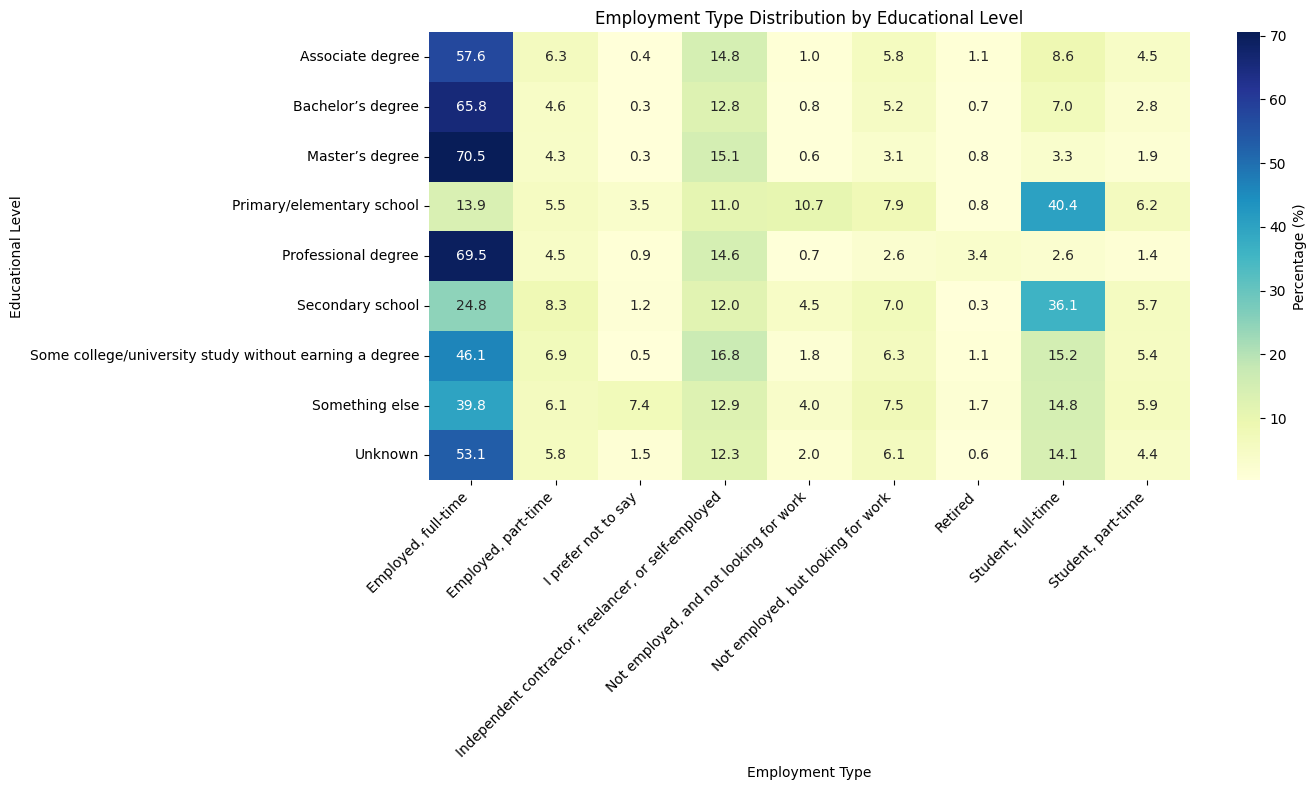

In [85]:
plt.figure(figsize=(14, 8))
sns.heatmap(edu_emp_percent, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Percentage (%)'})
plt.title("Employment Type Distribution by Educational Level")
plt.xlabel("Employment Type")
plt.ylabel("Educational Level")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Industry

In [86]:
industry_count = df['Industry'].value_counts().sort_values(ascending=False)
industry_count

Industry
Software Development                          48497
Other:                                         3077
Fintech                                        1641
Internet, Telecomm or Information Services     1629
Banking/Financial Services                     1371
Healthcare                                     1277
Manufacturing                                  1265
Retail and Consumer Services                   1264
Government                                      962
Media & Advertising Services                    894
Higher Education                                890
Transportation, or Supply Chain                 859
Computer Systems Design and Services            844
Energy                                          578
Insurance                                       389
Name: count, dtype: int64

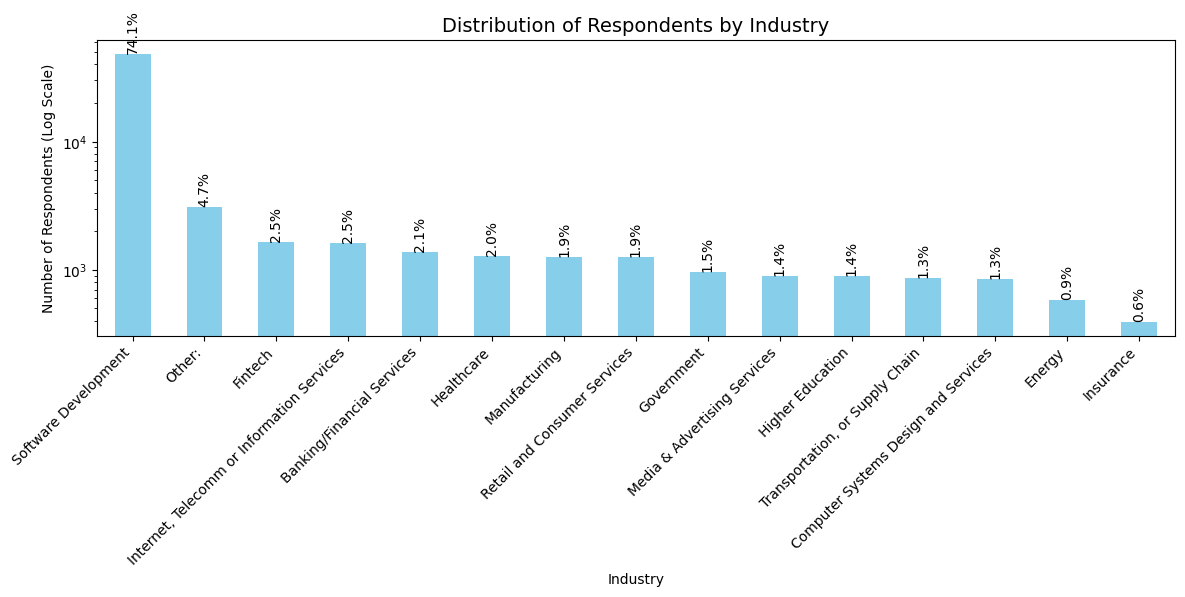

In [87]:
import matplotlib.pyplot as plt

# Total respondents to calculate percentages
total = industry_count.sum()

# Create the plot
plt.figure(figsize=(12, 6))
ax = industry_count.plot(kind='bar', color='skyblue')
plt.yscale('log')  # Logarithmic scale

# Add percentage annotations
for i, value in enumerate(industry_count):
    percent = (value / total) * 100
    ax.text(i, value, f'{percent:.1f}%', ha='center', va='bottom', fontsize=10, rotation=90)

# Customize axes and title in English
plt.title("Distribution of Respondents by Industry", fontsize=14)
plt.xlabel("Industry")
plt.ylabel("Number of Respondents (Log Scale)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Compensation totale

In [88]:
a = df['CompTotal'].value_counts().sort_values(ascending=False)

mini = df['CompTotal'].min()
maxi = df['CompTotal'].max()
print(a)
print('Mini :',mini)
print('Maxi : ',maxi)

CompTotal
2.963841e+145    31697
1.000000e+05       939
6.000000e+04       839
1.200000e+05       793
8.000000e+04       728
                 ...  
7.128000e+05         1
7.542000e+04         1
5.790000e+05         1
2.052000e+05         1
7.750000e+05         1
Name: count, Length: 3338, dtype: int64
Mini : 0.0
Maxi :  1.0000000000000002e+150


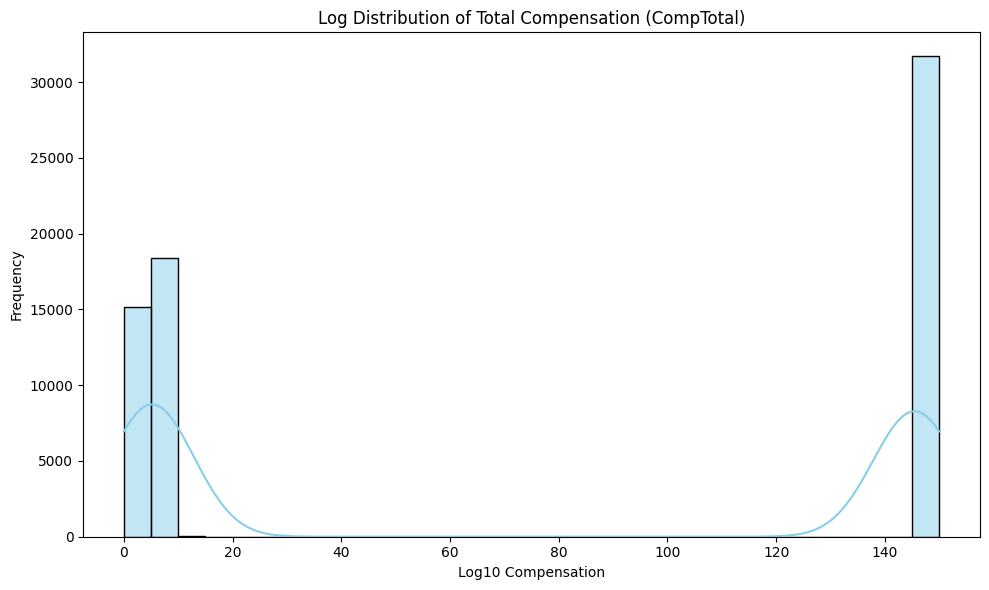

In [89]:
# Nettoyage : supprimer les valeurs nulles ou négatives
a = df['CompTotal']
a = a[a > 0]  # log ne fonctionne pas sur 0 ou valeurs négatives

# Appliquer log10
log_comp = np.log10(a)

plt.figure(figsize=(10, 6))
sns.histplot(log_comp, kde=True, bins=30, color='skyblue')

plt.title('Log Distribution of Total Compensation (CompTotal)')
plt.xlabel('Log10 Compensation')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


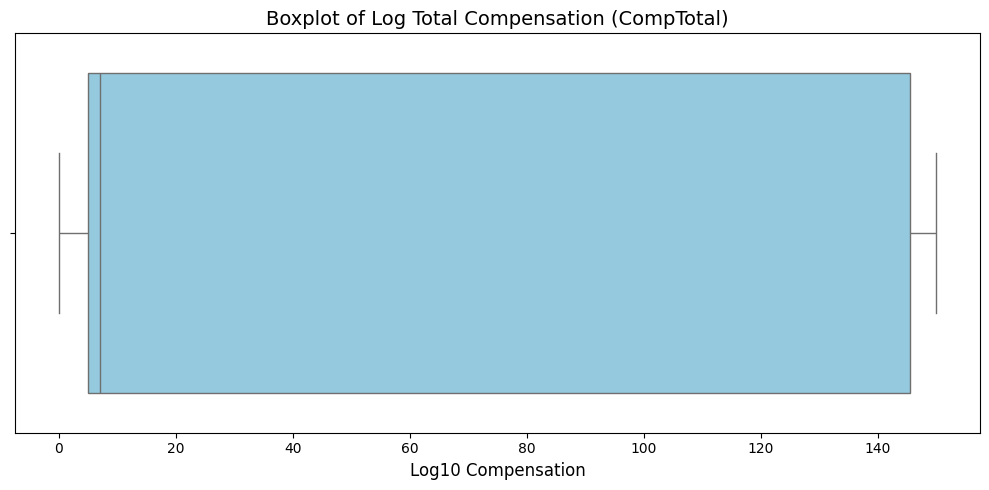

In [90]:
# Nettoyage : supprimer les valeurs nulles ou négatives
a = df['CompTotal']
a = a[a > 0]

# Transformation logarithmique
log_comp = np.log10(a)

plt.figure(figsize=(10, 5))
sns.boxplot(x=log_comp, color='skyblue')

plt.title('Boxplot of Log Total Compensation (CompTotal)', fontsize=14)
plt.xlabel('Log10 Compensation', fontsize=12)
plt.tight_layout()
plt.show()


#### data as received without processing missing values

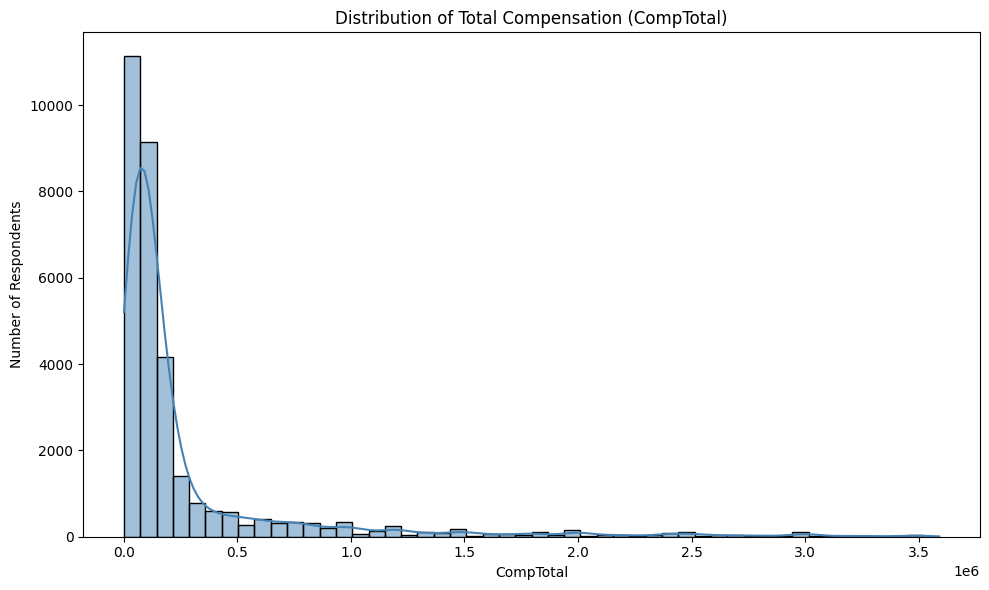

In [91]:
## Supprimer les très grandes valeurs (optionnel, pour un histogramme plus lisible)
df_filtered = df_test['CompTotal'][df_test['CompTotal'] < df_test['CompTotal'].quantile(0.95)] ## Garde les 95 % inférieurs

# Tracer l'histogramme
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered, bins=50, kde=True, color='steelblue')

plt.title('Distribution of Total Compensation (CompTotal)')
plt.xlabel('CompTotal')
plt.ylabel('Number of Respondents')
plt.tight_layout()
plt.show()

### Age and WorkExp

In [92]:
a = df[['Age','WorkExp']]

In [93]:
# Liste réelle des tranches d’âge présentes
age_mapping = {
    '18-24 years old': 1,
    '25-34 years old': 2,
    '35-44 years old': 3,
    '45-54 years old': 4,
    '55-64 years old': 5,
    '65 years or older': 6,
    'Under 18 years old': 7,
    'Prefer not to say': 8
}

# Convertir la colonne Age en valeurs numériques
a['Age'] = a['Age'].map(age_mapping)

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\604726586.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['Age'] = a['Age'].map(age_mapping)


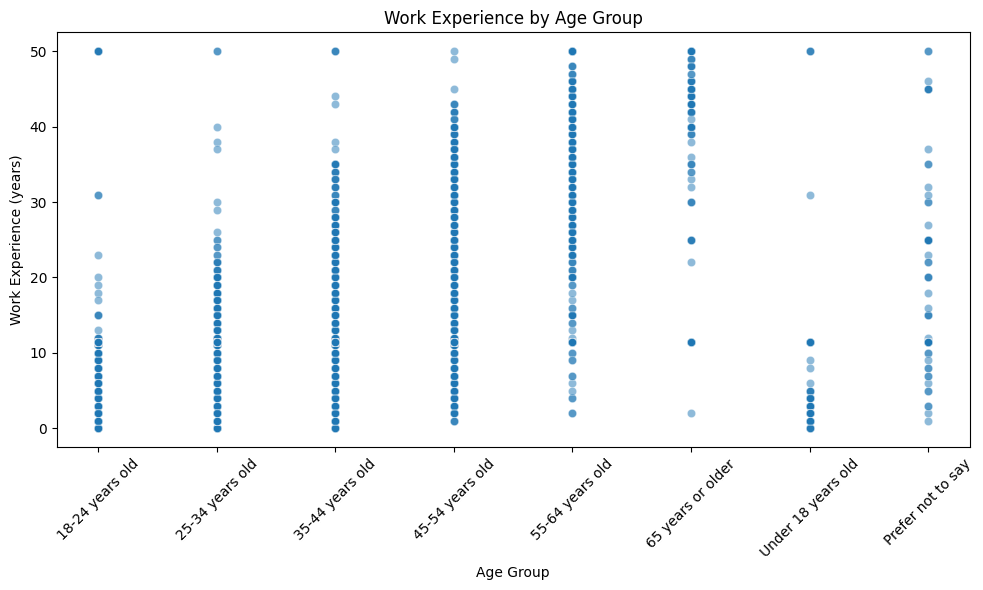

In [94]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='WorkExp', data=a, alpha=0.5)
plt.title('Work Experience by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Work Experience (years)')
plt.xticks(ticks=list(age_mapping.values()), labels=list(age_mapping.keys()), rotation=45)
plt.tight_layout()
plt.show()

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\1890205678.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


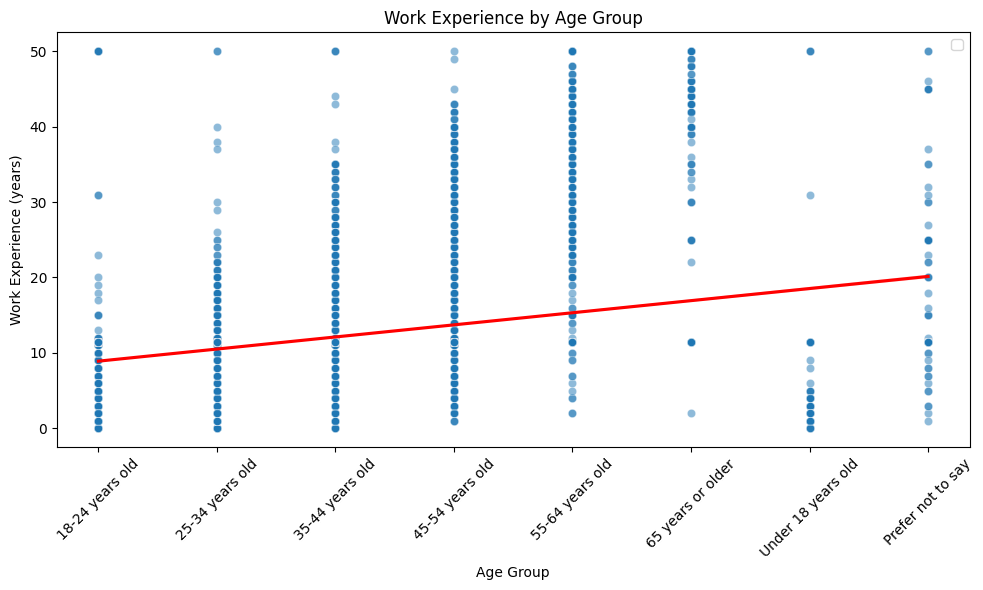

In [95]:
plt.figure(figsize=(10, 6))

# Nuage de points
sns.scatterplot(x='Age', y='WorkExp', data=a, alpha=0.5)

# Ligne de régression
sns.regplot(x='Age', y='WorkExp', data=a, scatter=False, color='red', line_kws={'label':"Regression Line"})

# Titres et axes
plt.title('Work Experience by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Work Experience (years)')
plt.xticks(ticks=list(age_mapping.values()), labels=list(age_mapping.keys()), rotation=45)

# Légende
plt.legend()
plt.tight_layout()
plt.show()


### Age / TimeSearching / Frustration

### Database have work

In [96]:
a = df[['DatabaseHaveWorkedWith']]
a['DatabaseHaveWorkedWith']

0                             PostgreSQL
1            Dynamodb;MongoDB;PostgreSQL
2             Firebase Realtime Database
3        MongoDB;MySQL;PostgreSQL;SQLite
4                      PostgreSQL;SQLite
                      ...               
65432                         PostgreSQL
65433                         PostgreSQL
65434                         PostgreSQL
65435                  PostgreSQL;SQLite
65436    MongoDB;MySQL;Oracle;PostgreSQL
Name: DatabaseHaveWorkedWith, Length: 65437, dtype: object

In [97]:
# Split the multiple languages into lists
a['DatabaseHaveWorkedWith'] = a['DatabaseHaveWorkedWith'].str.split(';')

# Explode each language into separate rows
a = a.explode('DatabaseHaveWorkedWith')

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\3308371962.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['DatabaseHaveWorkedWith'] = a['DatabaseHaveWorkedWith'].str.split(';')


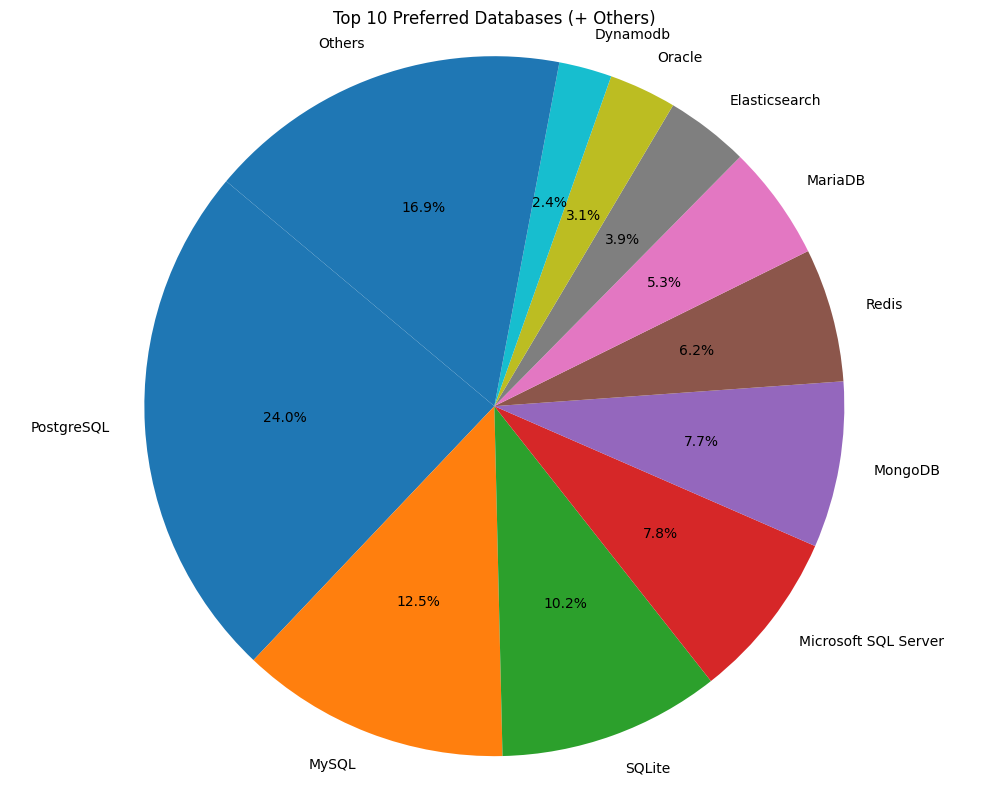

In [98]:
# Count the occurrences
db_counts = a['DatabaseHaveWorkedWith'].value_counts()

# Group less frequent ones into "Others"
top_n = 10
top_db = db_counts[:top_n]
others = db_counts[top_n:].sum()

# Use pd.concat instead of append
db_counts_reduced = pd.concat([top_db, pd.Series({'Others': others})])

# Pie Chart
plt.figure(figsize=(10, 8))
plt.pie(db_counts_reduced, labels=db_counts_reduced.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Preferred Databases (+ Others)')
plt.axis('equal')
plt.tight_layout()
plt.show()

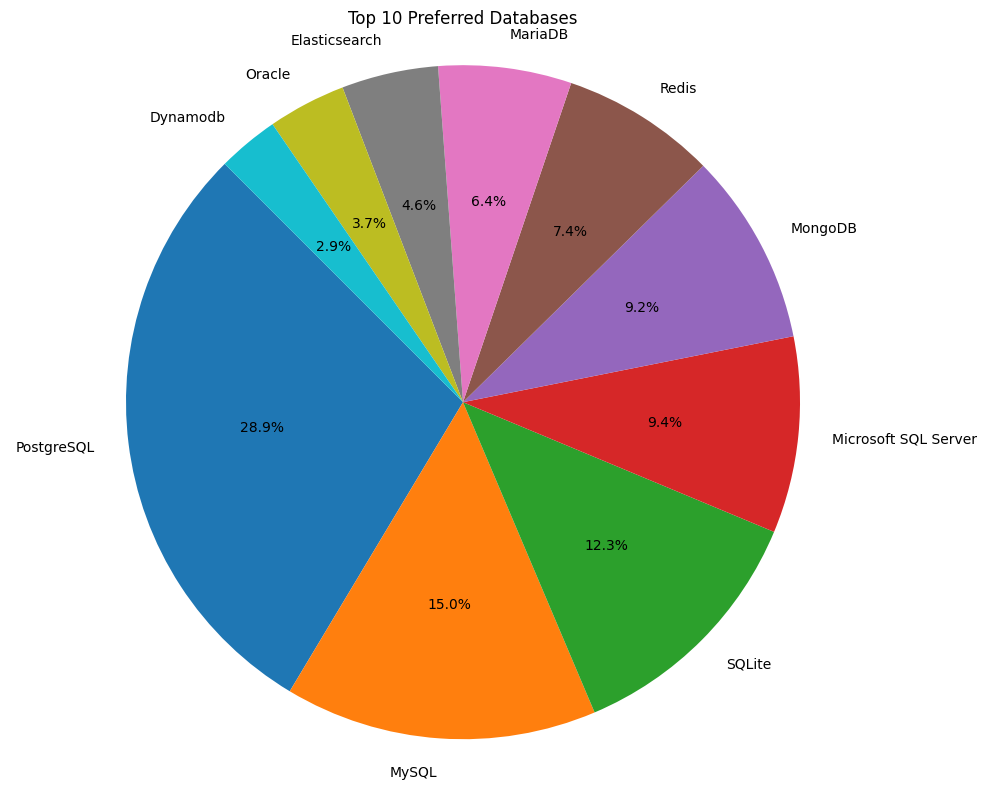

In [99]:
# Comptage des occurrences
db_counts = a['DatabaseHaveWorkedWith'].value_counts()

# Garder les 10 premiers éléments
top_n = 10
top_db = db_counts[:top_n]

# Pie Chart
plt.figure(figsize=(10, 8))
plt.pie(
    top_db,
    labels=top_db.index,
    autopct='%1.1f%%',
    startangle=135
)
plt.title('Top 10 Preferred Databases')
plt.axis('equal')
plt.tight_layout()
plt.show()


### Database wish to learn next year

In [100]:

a = df[['DatabaseWantToWorkWith']]
a['DatabaseWantToWorkWith']

0                        PostgreSQL
1                        PostgreSQL
2        Firebase Realtime Database
3          MongoDB;MySQL;PostgreSQL
4                 PostgreSQL;SQLite
                    ...            
65432                    PostgreSQL
65433                    PostgreSQL
65434                    PostgreSQL
65435             PostgreSQL;SQLite
65436      MongoDB;MySQL;PostgreSQL
Name: DatabaseWantToWorkWith, Length: 65437, dtype: object

In [101]:
# Split the multiple languages into lists
a['DatabaseWantToWorkWith'] = a['DatabaseWantToWorkWith'].str.split(';')

# Explode each language into separate rows
a = a.explode('DatabaseWantToWorkWith')

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\219756153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['DatabaseWantToWorkWith'] = a['DatabaseWantToWorkWith'].str.split(';')


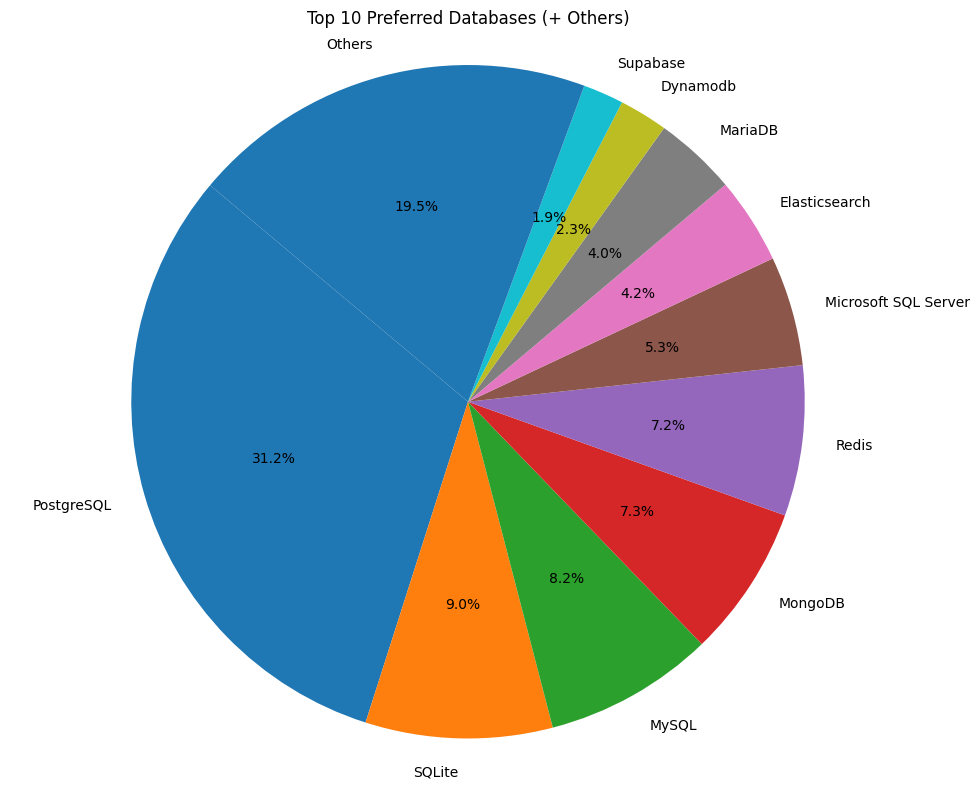

In [102]:
# Count the occurrences
db_counts = a['DatabaseWantToWorkWith'].value_counts()

# Group less frequent ones into "Others"
top_n = 10
top_db = db_counts[:top_n]
others = db_counts[top_n:].sum()

# Use pd.concat instead of append
db_counts_reduced = pd.concat([top_db, pd.Series({'Others': others})])

# Pie Chart
plt.figure(figsize=(10, 8))
plt.pie(db_counts_reduced, labels=db_counts_reduced.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Preferred Databases (+ Others)')
plt.axis('equal')
plt.tight_layout()
plt.show()


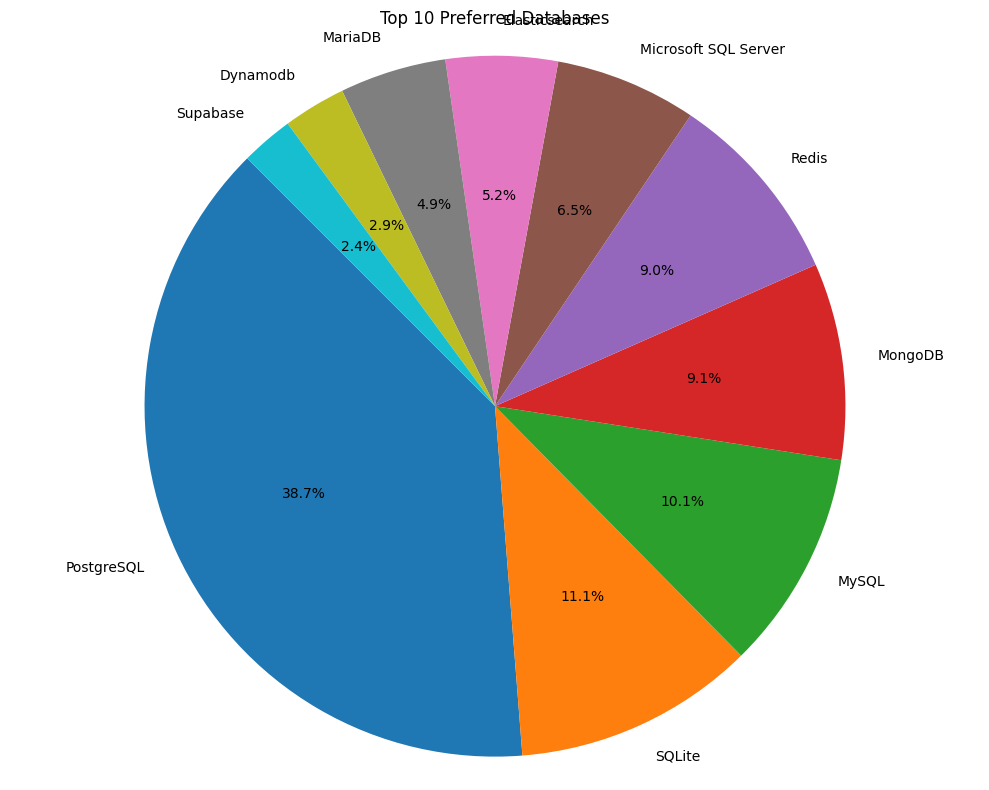

In [103]:
# Comptage des occurrences
db_counts = a['DatabaseWantToWorkWith'].value_counts()

# Garder les 10 premiers éléments
top_n = 10
top_db = db_counts[:top_n]

# Pie Chart
plt.figure(figsize=(10, 8))
plt.pie(
    top_db,
    labels=top_db.index,
    autopct='%1.1f%%',
    startangle=135
)
plt.title('Top 10 Preferred Databases')
plt.axis('equal')
plt.tight_layout()
plt.show()


### MainBranch

In [104]:
a = df['MainBranch'].value_counts().sort_values()
a

MainBranch
I used to be a developer by profession, but no longer am                                  1510
I code primarily as a hobby                                                               3334
I am learning to code                                                                     3875
I am not primarily a developer, but I write code sometimes as part of my work/studies     6511
I am a developer by profession                                                           50207
Name: count, dtype: int64

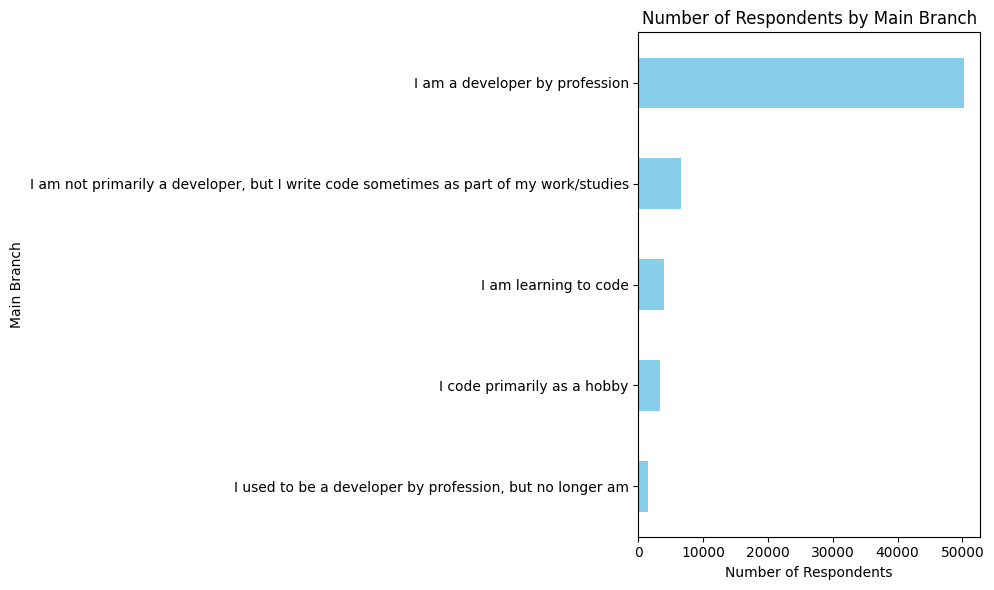

In [105]:
plt.figure(figsize=(10, 6))
a.plot(kind='barh', color='skyblue')

plt.title('Number of Respondents by Main Branch')
plt.xlabel('Number of Respondents')
plt.ylabel('Main Branch')
plt.tight_layout()
plt.show()

### Total annual compensation / Age

In [127]:
a = df[['Age', 'CompTotal']].dropna()
a.head()
maxi = a['CompTotal'].max()
mini = a['CompTotal'].min()
print(mini)
print(maxi)

0.0
1.0000000000000002e+150


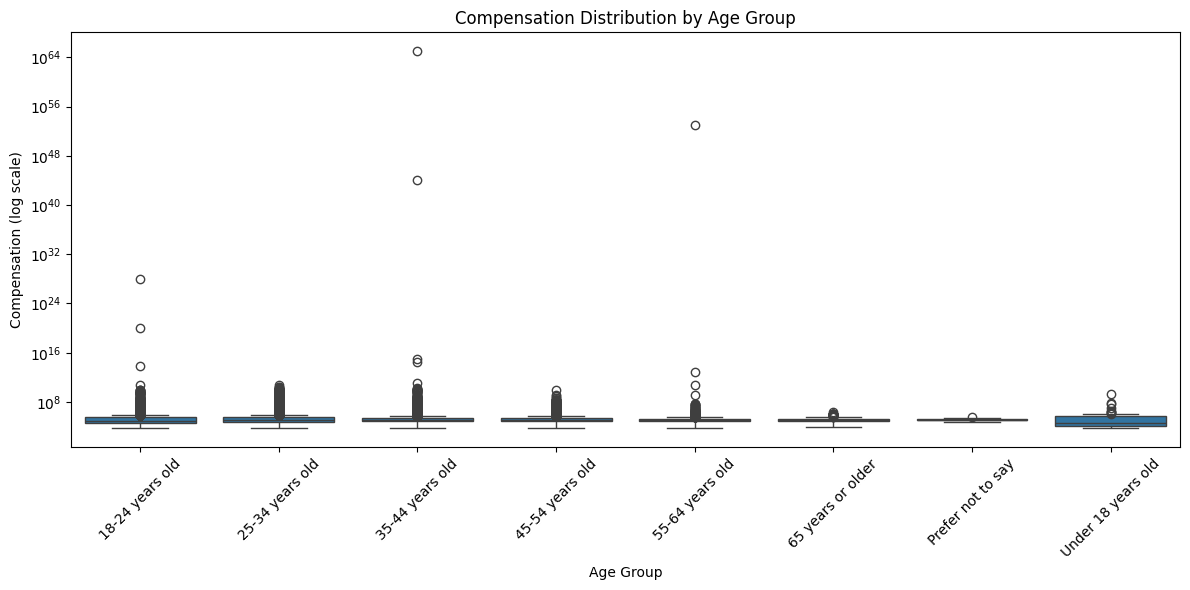

In [128]:
# Nettoyage des données : suppression des NaN et des valeurs extrêmes
a_clean = a.dropna(subset=['CompTotal']).copy()
a_clean = a_clean[(a_clean['CompTotal'] > a_clean['CompTotal'].quantile(0.01)) &
                  (a_clean['CompTotal'] < a_clean['CompTotal'].quantile(0.99))]


age = a['Age'].sort_values()

# Tracé du boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=a_clean, x='Age', y='CompTotal', order=age)
plt.yscale('log')
plt.title('Compensation Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Compensation (log scale)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [131]:
a = df_test[['Age', 'CompTotal']].dropna()
a.head()

Age  CompTotal
72   18-24 years old  2040000.0
374  25-34 years old    28000.0
379  35-44 years old    85000.0
385  35-44 years old    50000.0
389  25-34 years old   110000.0

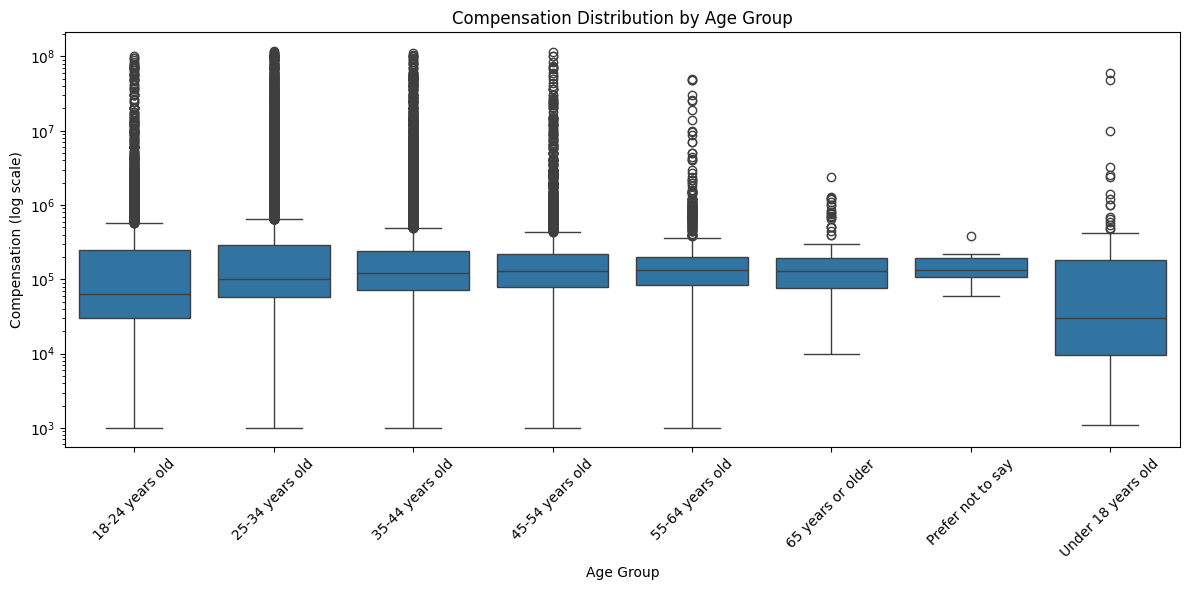

In [130]:
# Nettoyage des données : suppression des NaN et des valeurs extrêmes
a_clean = a.dropna(subset=['CompTotal']).copy()
a_clean = a_clean[(a_clean['CompTotal'] > a_clean['CompTotal'].quantile(0.01)) &
                  (a_clean['CompTotal'] < a_clean['CompTotal'].quantile(0.99))]


age = a['Age'].sort_values()

# Tracé du boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=a_clean, x='Age', y='CompTotal', order=age)
plt.yscale('log')
plt.title('Compensation Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Compensation (log scale)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [132]:
a = df_test[['Age', 'CompTotal']].dropna()
a.head()

Age  CompTotal
72   18-24 years old  2040000.0
374  25-34 years old    28000.0
379  35-44 years old    85000.0
385  35-44 years old    50000.0
389  25-34 years old   110000.0

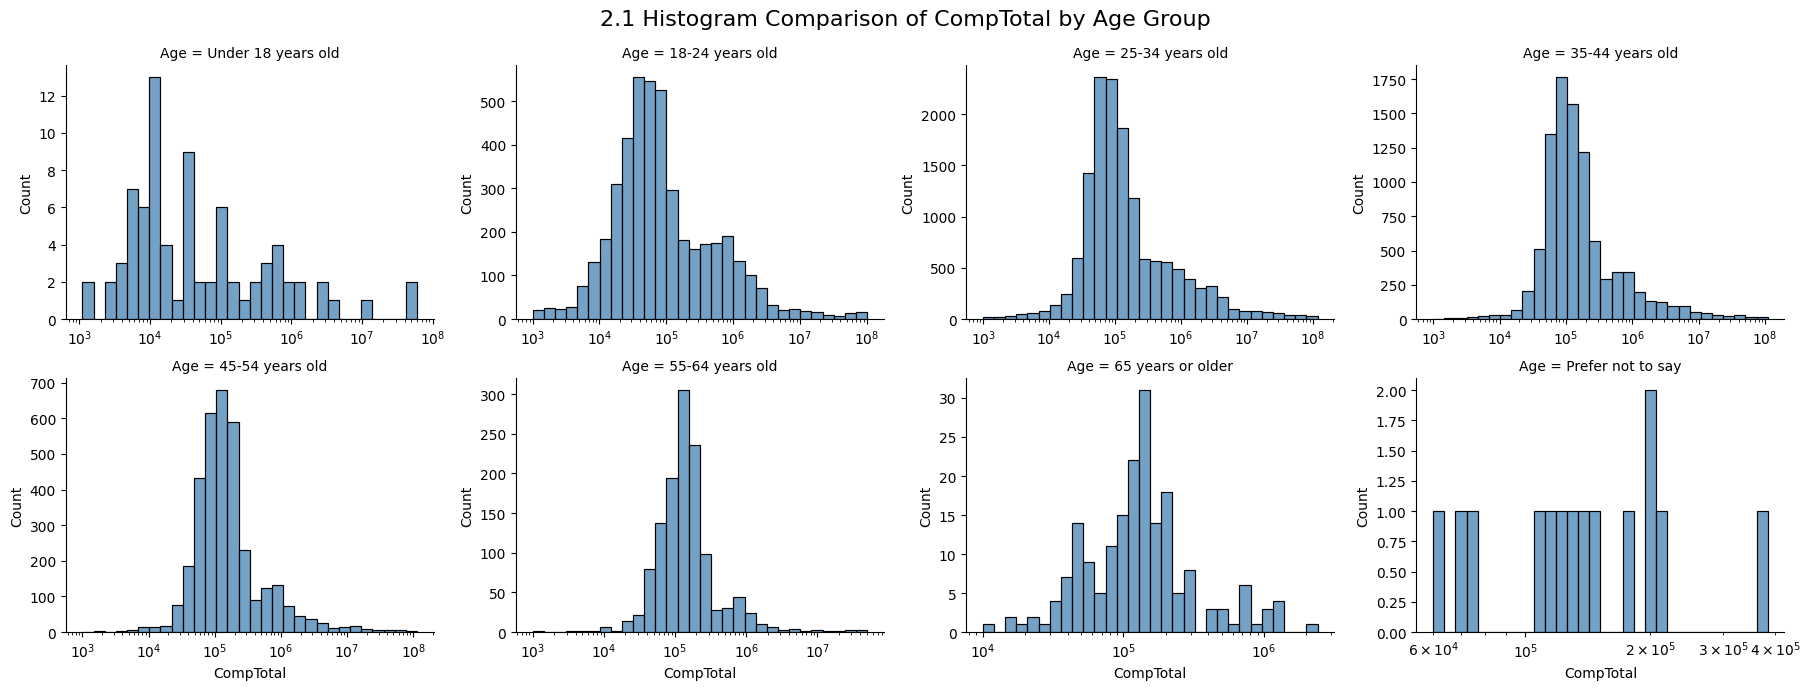

In [133]:
# Nettoyage de base
a_clean = a.dropna(subset=['CompTotal']).copy()
a_clean = a_clean[(a_clean['CompTotal'] > a_clean['CompTotal'].quantile(0.01)) &
                  (a_clean['CompTotal'] < a_clean['CompTotal'].quantile(0.99))]

# Ordre logique des groupes d'âge
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older',
    'Prefer not to say'
]

# Palette de couleurs
palette = sns.color_palette("Set2", len(age_order))

# Création des sous-graphiques
g = sns.FacetGrid(a_clean, col="Age", col_wrap=4, sharex=False, sharey=False,
                  col_order=age_order, height=3.5, aspect=1.3)
g.map(sns.histplot, "CompTotal", bins=30, kde=False, log_scale=True, color='steelblue')

# Titre général
plt.subplots_adjust(top=0.9)
g.fig.suptitle("2.1 Histogram Comparison of CompTotal by Age Group", fontsize=16)

plt.show()


In [134]:
a = df[['Age', 'CompTotal']].dropna()
a.head()

Age      CompTotal
0  Under 18 years old  2.963841e+145
1     35-44 years old  2.963841e+145
2     45-54 years old  2.963841e+145
3     18-24 years old  2.963841e+145
4     18-24 years old  2.963841e+145

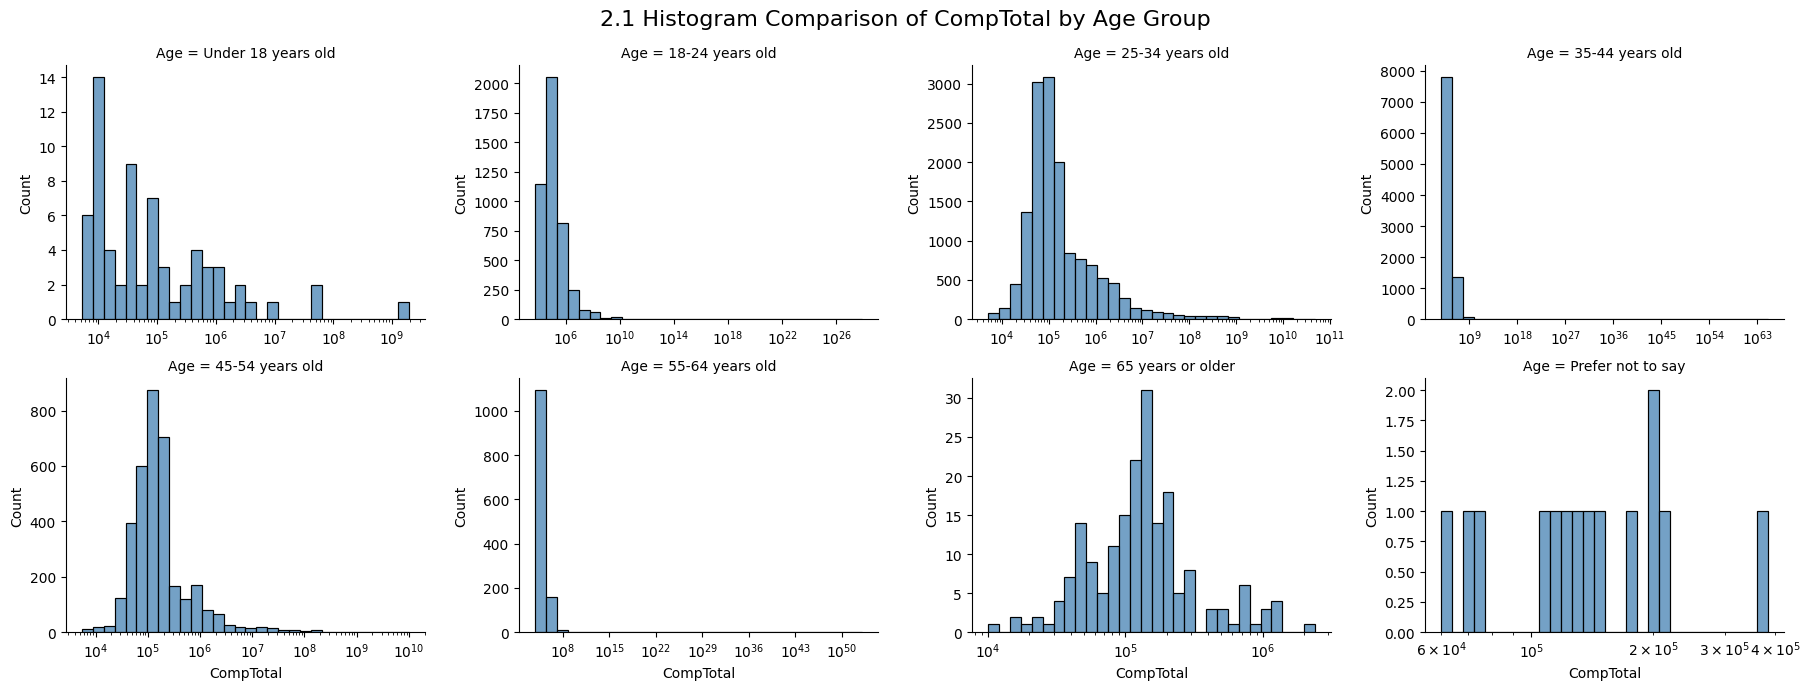

In [135]:
# Nettoyage de base
a_clean = a.dropna(subset=['CompTotal']).copy()
a_clean = a_clean[(a_clean['CompTotal'] > a_clean['CompTotal'].quantile(0.01)) &
                  (a_clean['CompTotal'] < a_clean['CompTotal'].quantile(0.99))]

# Ordre logique des groupes d'âge
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older',
    'Prefer not to say'
]

# Palette de couleurs
palette = sns.color_palette("Set2", len(age_order))

# Création des sous-graphiques
g = sns.FacetGrid(a_clean, col="Age", col_wrap=4, sharex=False, sharey=False,
                  col_order=age_order, height=3.5, aspect=1.3)
g.map(sns.histplot, "CompTotal", bins=30, kde=False, log_scale=True, color='steelblue')

# Titre général
plt.subplots_adjust(top=0.9)
g.fig.suptitle("2.1 Histogram Comparison of CompTotal by Age Group", fontsize=16)

plt.show()


### Histogram of TimeSearching for Different Age Groups

Objective: Use histograms to explore the distribution of TimeSearching (time spent searching for information) for respondents across different age groups.

In [162]:
a = df_test[['TimeSearching', 'Age']].dropna()
a.head()

TimeSearching              Age
10         30-60 minutes a day  35-44 years old
12         30-60 minutes a day  35-44 years old
15        60-120 minutes a day  45-54 years old
18         15-30 minutes a day  25-34 years old
20  Less than 15 minutes a day  25-34 years old

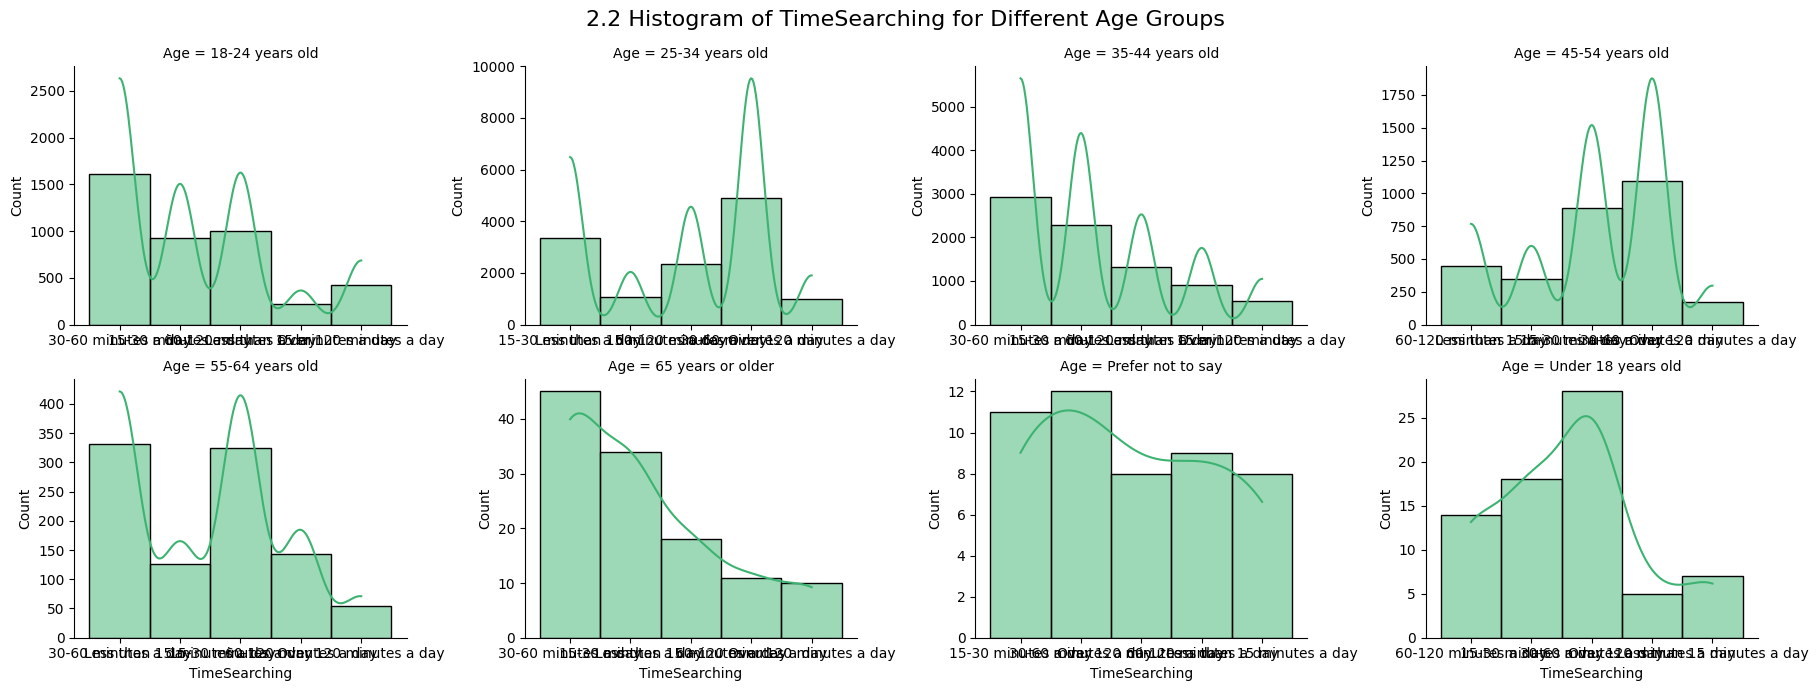

In [163]:
age_order = list(a['Age'].unique())
age_order.sort()

# Création du graphique à facettes
g = sns.FacetGrid(a, col="Age", col_wrap=4, sharex=False, sharey=False,
                  col_order=age_order, height=3.5, aspect=1.3)
g.map(sns.histplot, "TimeSearching", bins=20, kde=True, color='mediumseagreen')

# Titre global
plt.subplots_adjust(top=0.9)
g.fig.suptitle("2.2 Histogram of TimeSearching for Different Age Groups", fontsize=16)

plt.show()


In [160]:
a = df[['TimeSearching', 'Age']]
a.head()

TimeSearching                 Age
0  30-60 minutes a day  Under 18 years old
1  30-60 minutes a day     35-44 years old
2  30-60 minutes a day     45-54 years old
3  30-60 minutes a day     18-24 years old
4  30-60 minutes a day     18-24 years old

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\412255511.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\412255511.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\412255511.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\412255511.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=

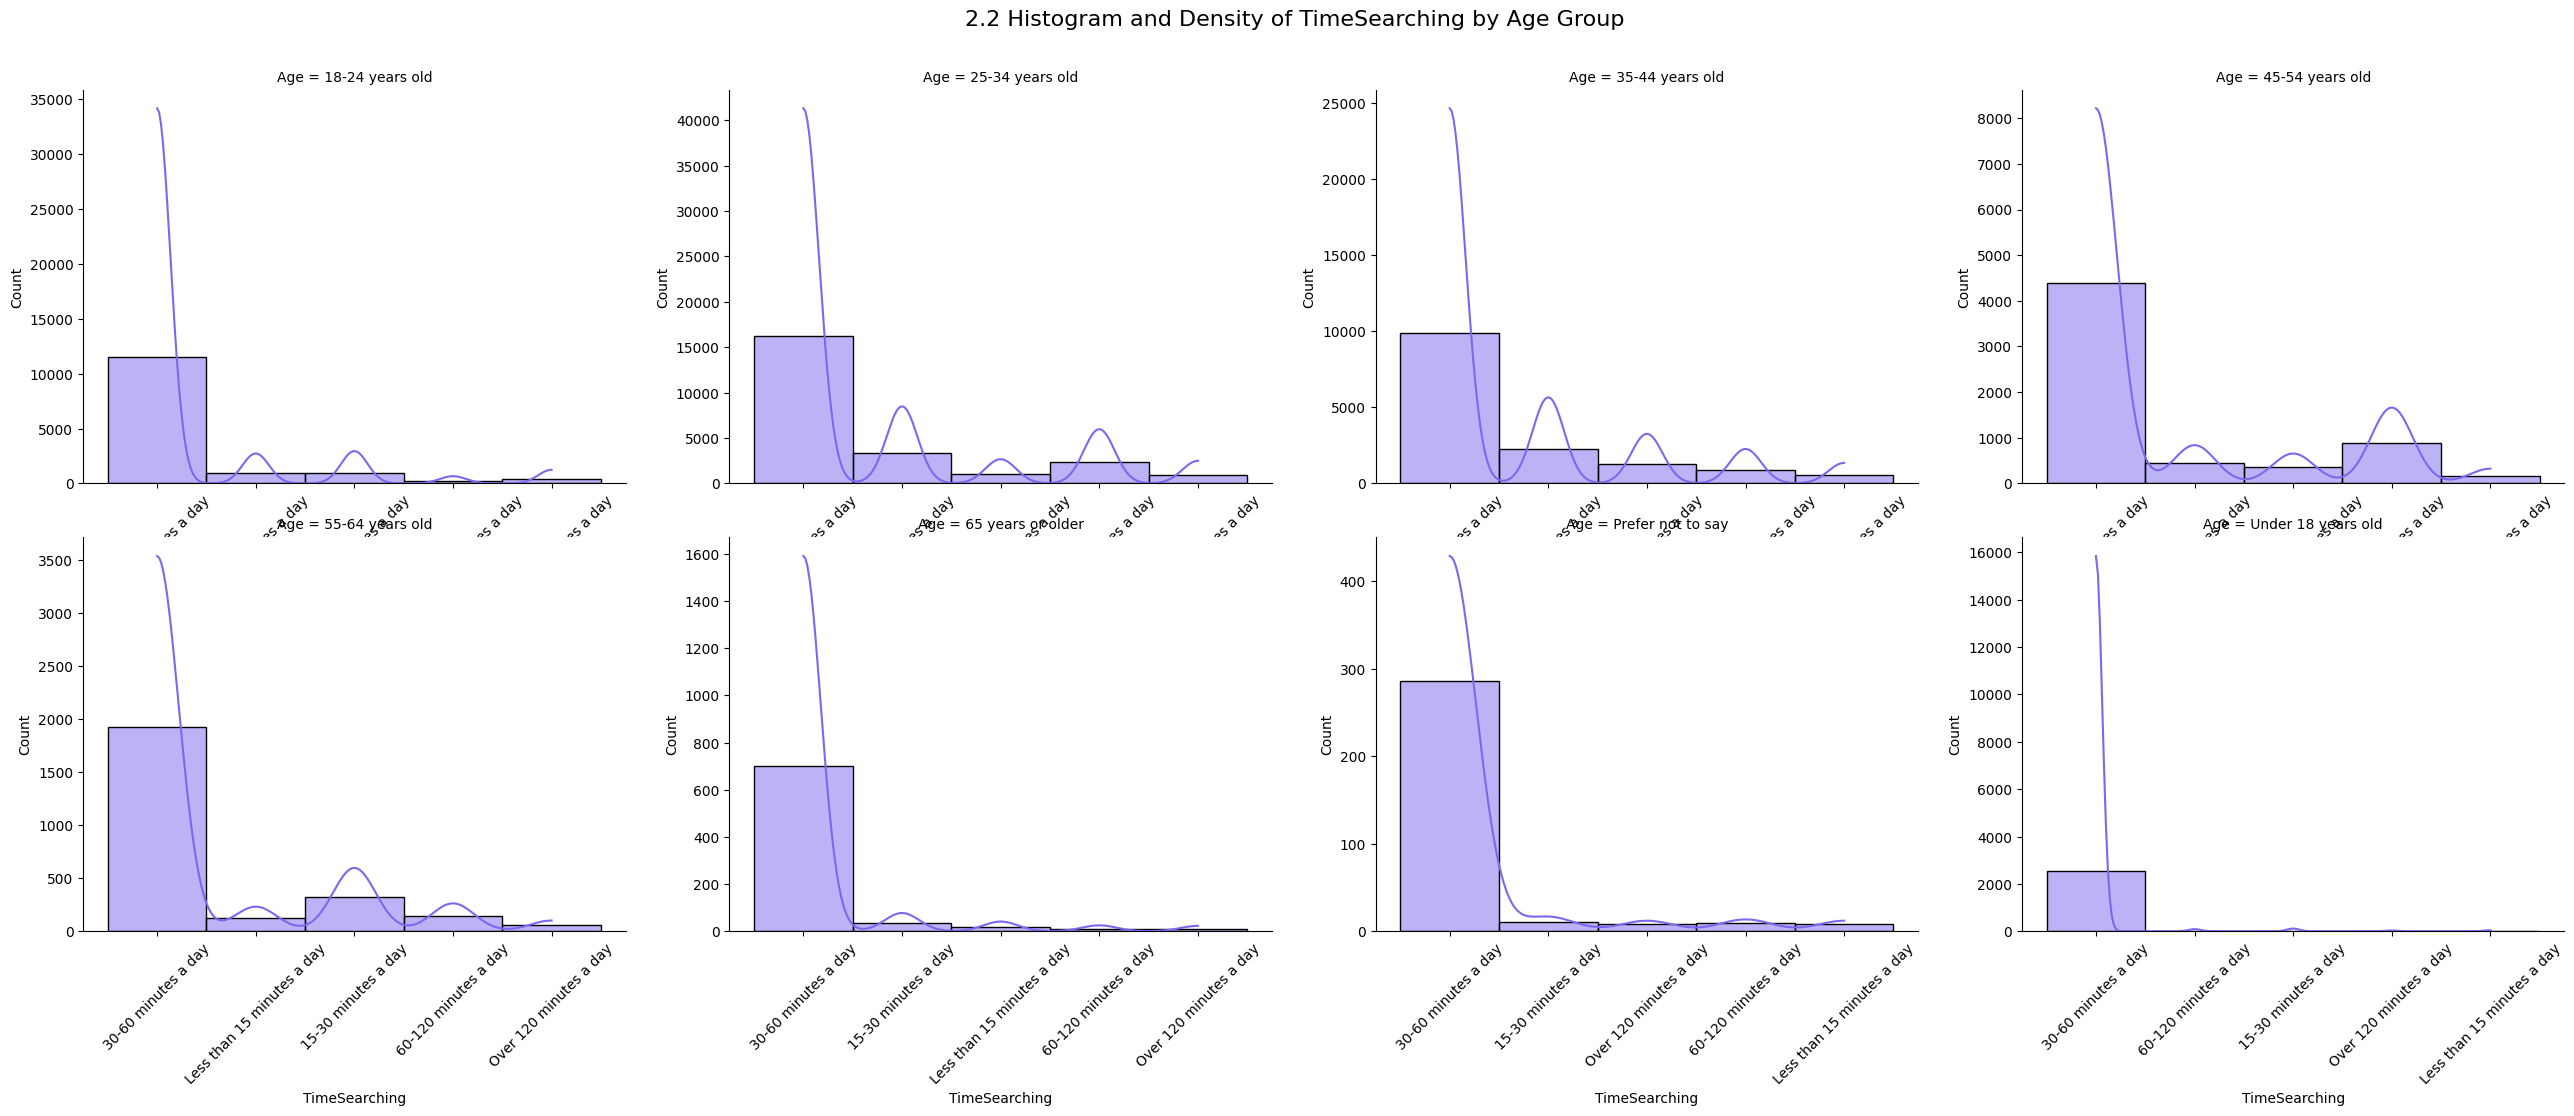

In [161]:

age_order = list(a['Age'].unique())
age_order.sort()

# Création du graphique
g = sns.FacetGrid(
    a,
    col="Age",
    col_wrap=4,
    sharex=False,
    sharey=False,
    col_order=age_order,
    height=5,
    aspect=1.3
)

# Histogramme avec courbe de densité
g.map(sns.histplot, "TimeSearching", bins=15, kde=True, color="mediumslateblue")

# Inclinaison des étiquettes X
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Titre global
plt.subplots_adjust(top=0.9)
g.fig.suptitle("2.2 Histogram and Density of TimeSearching by Age Group", fontsize=16)

plt.show()


### Scatter Plot for Work Experience vs. Age Group by Country
Compare work experience (YearsCodePro) across different age groups (Age) and countries (Country). Use colors to represent different countries and markers for age groups.

In [170]:
a = df[['Age', 'Country', 'YearsCodePro']]
a.head(3)

Age                  Country YearsCodePro
0  Under 18 years old                      USA            2
1     35-44 years old  UK and Northern Ireland           17
2     45-54 years old  UK and Northern Ireland           27

In [166]:
a['Age'].unique()

array(['Under 18 years old', '35-44 years old', '45-54 years old',
       '18-24 years old', '25-34 years old', '55-64 years old',
       'Prefer not to say', '65 years or older'], dtype=object)

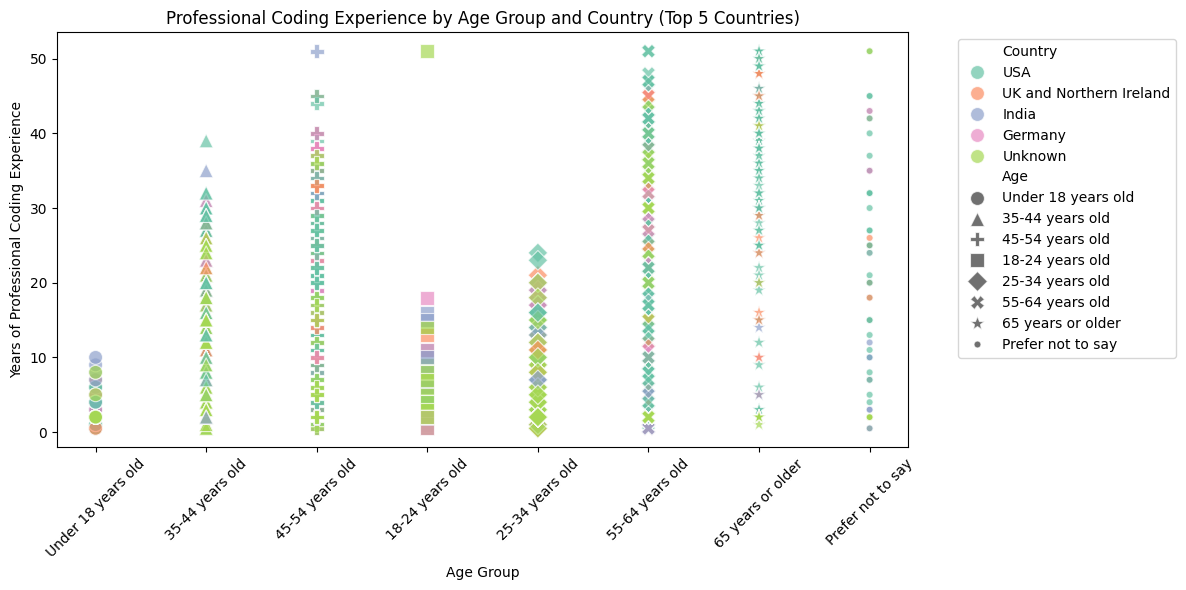

In [172]:
# Nettoyage de YearsCodePro
def convert_experience(x):
    if x == 'Less than 1 year':
        return 0.5
    elif x == 'More than 50 years':
        return 51
    else:
        try:
            return float(x)
        except:
            return None

# Filtrer les colonnes nécessaires
a['YearsCodePro'] = a['YearsCodePro'].apply(convert_experience)
a = a.dropna(subset=['YearsCodePro'])

# Garder uniquement les top 5 pays
top_countries = a['Country'].value_counts().nlargest(5).index
a = a[a['Country'].isin(top_countries)]

# Définir les formes pour chaque groupe d’âge
age_markers = {
    'Under 18 years old': 'o',
    '18-24 years old': 's',
    '25-34 years old': 'D',
    '35-44 years old': '^',
    '45-54 years old': 'P',
    '55-64 years old': 'X',
    '65 years or older': '*',
    'Prefer not to say': '.'
}

# Tracé
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=a,
    x='Age',
    y='YearsCodePro',
    hue='Country',
    style='Age',
    markers=age_markers,
    palette='Set2',
    alpha=0.7,
    s=100
)

# Amélioration graphique
plt.title("Professional Coding Experience by Age Group and Country (Top 5 Countries)")
plt.ylabel("Years of Professional Coding Experience")
plt.xlabel("Age Group")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Breakdown of professional collaboration tools: used, desired and admired

#### NEWCollabToolsHaveWorkedWith

In [196]:
NEWCollabToolsHaveWorkedWith = df[['NEWCollabToolsHaveWorkedWith']]
NEWCollabToolsHaveWorkedWith['NEWCollabToolsHaveWorkedWith'] = NEWCollabToolsHaveWorkedWith['NEWCollabToolsHaveWorkedWith'].str.split(';')
NEWCollabToolsHaveWorkedWith = NEWCollabToolsHaveWorkedWith.explode('NEWCollabToolsHaveWorkedWith')

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\2167828516.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NEWCollabToolsHaveWorkedWith['NEWCollabToolsHaveWorkedWith'] = NEWCollabToolsHaveWorkedWith['NEWCollabToolsHaveWorkedWith'].str.split(';')


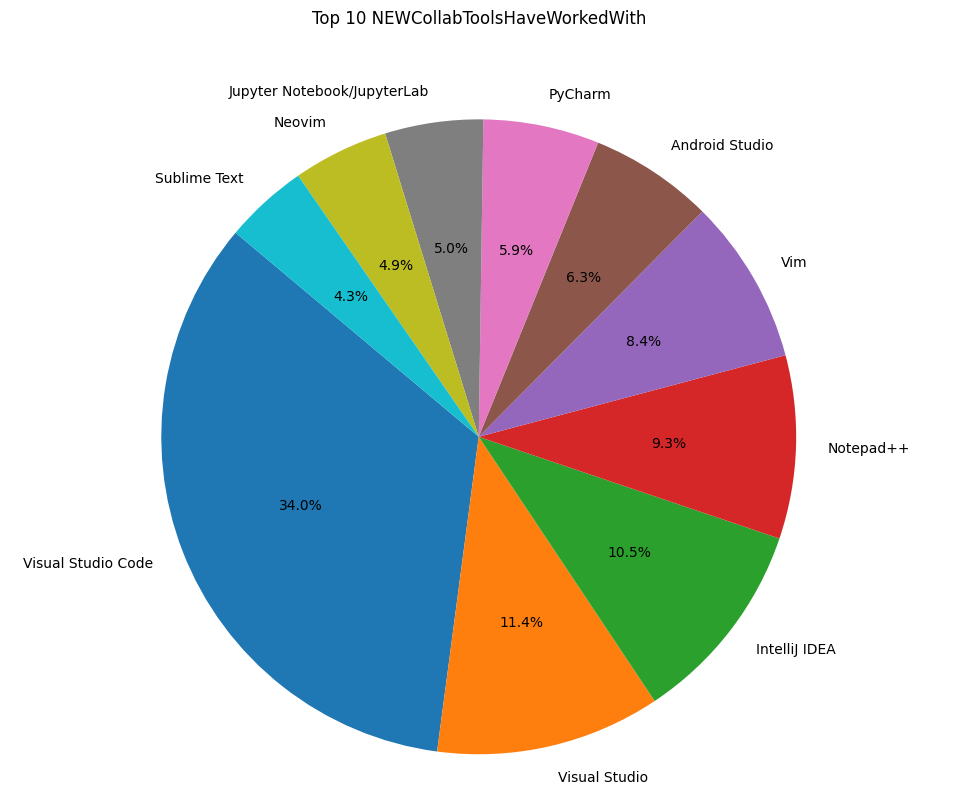

In [231]:
# Count the occurrences
nb = NEWCollabToolsHaveWorkedWith['NEWCollabToolsHaveWorkedWith'].value_counts().head(10)

# Pie Chart
plt.figure(figsize=(10, 8))
plt.pie(nb, labels=nb.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 NEWCollabToolsHaveWorkedWith', y=1.08)
plt.axis('equal')
plt.tight_layout()
plt.show()

####  NEWCollabToolsWantToWorkWith

In [204]:
NEWCollabToolsWantToWorkWith = df[['NEWCollabToolsWantToWorkWith']]
NEWCollabToolsWantToWorkWith['NEWCollabToolsWantToWorkWith'] = NEWCollabToolsWantToWorkWith['NEWCollabToolsWantToWorkWith'].str.split(';')
NEWCollabToolsWantToWorkWith = NEWCollabToolsWantToWorkWith.explode('NEWCollabToolsWantToWorkWith')

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\3816908879.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NEWCollabToolsWantToWorkWith['NEWCollabToolsWantToWorkWith'] = NEWCollabToolsWantToWorkWith['NEWCollabToolsWantToWorkWith'].str.split(';')


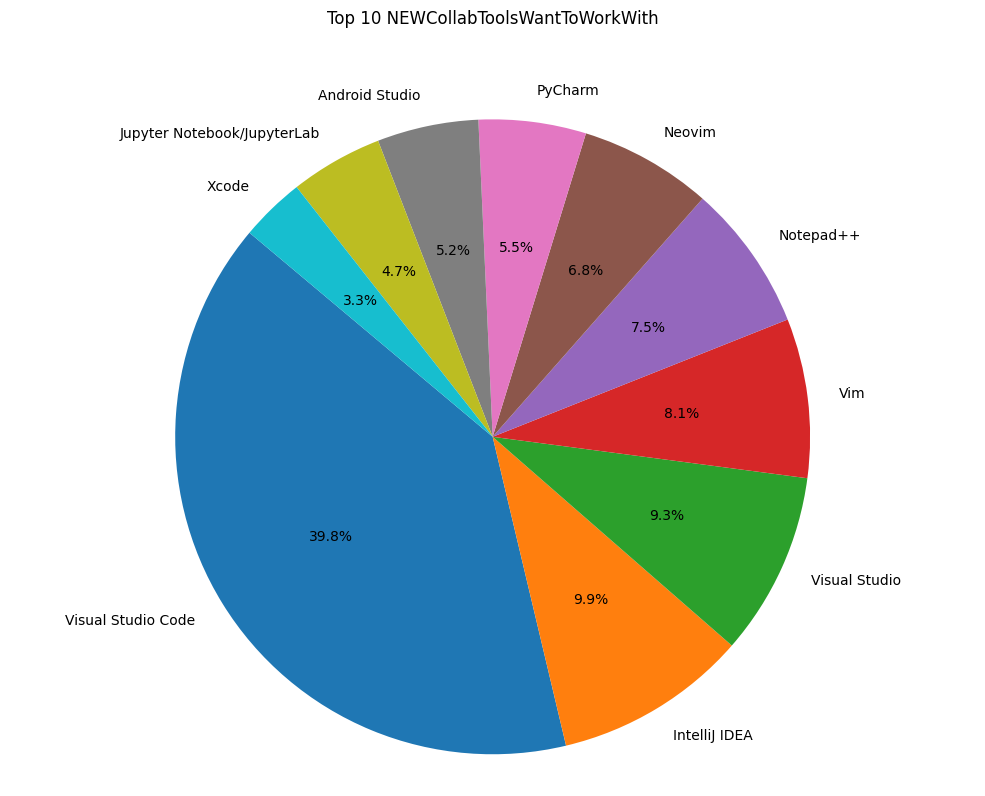

In [230]:
# Count the occurrences
nb = NEWCollabToolsWantToWorkWith['NEWCollabToolsWantToWorkWith'].value_counts().head(10)

# Pie Chart
plt.figure(figsize=(10, 8))
plt.pie(nb, labels=nb.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 NEWCollabToolsWantToWorkWith', y=1.08)
plt.axis('equal')
plt.tight_layout()
plt.show()

#### NEWCollabToolsAdmired

In [208]:
NEWCollabToolsAdmired = df[['NEWCollabToolsAdmired']]
NEWCollabToolsAdmired['NEWCollabToolsAdmired'] = NEWCollabToolsAdmired['NEWCollabToolsAdmired'].str.split(';')
NEWCollabToolsAdmired = NEWCollabToolsAdmired.explode('NEWCollabToolsAdmired')

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\1135599069.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NEWCollabToolsAdmired['NEWCollabToolsAdmired'] = NEWCollabToolsAdmired['NEWCollabToolsAdmired'].str.split(';')


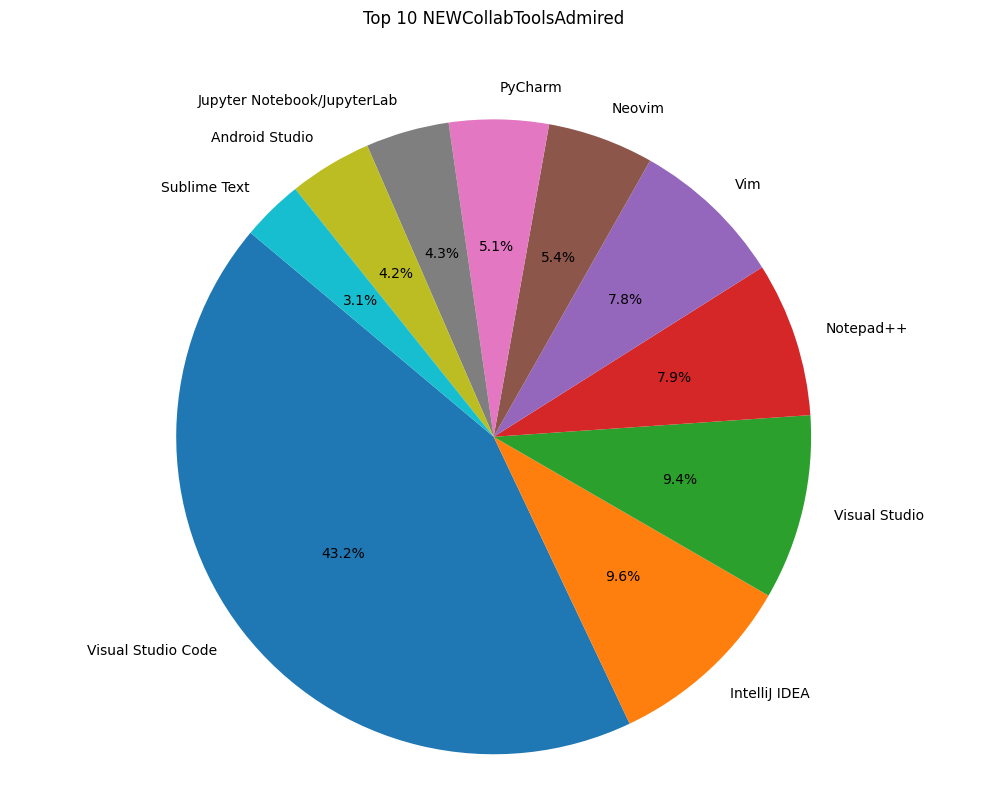

In [229]:
# Count the occurrences
nb = NEWCollabToolsAdmired['NEWCollabToolsAdmired'].value_counts().head(10)

# Pie Chart
plt.figure(figsize=(10, 8))
plt.pie(nb, labels=nb.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 NEWCollabToolsAdmired', y=1.08)
plt.axis('equal')
plt.tight_layout()
plt.show()

### Breakdown of professional programming languages: used, desired and admired

#### LanguageHaveWorkedWith

In [222]:
LanguageHaveWorkedWith = df[['LanguageHaveWorkedWith']]
LanguageHaveWorkedWith['LanguageHaveWorkedWith'] = LanguageHaveWorkedWith['LanguageHaveWorkedWith'].str.split(';')
LanguageHaveWorkedWith = LanguageHaveWorkedWith.explode('LanguageHaveWorkedWith')

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\1366060544.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LanguageHaveWorkedWith['LanguageHaveWorkedWith'] = LanguageHaveWorkedWith['LanguageHaveWorkedWith'].str.split(';')


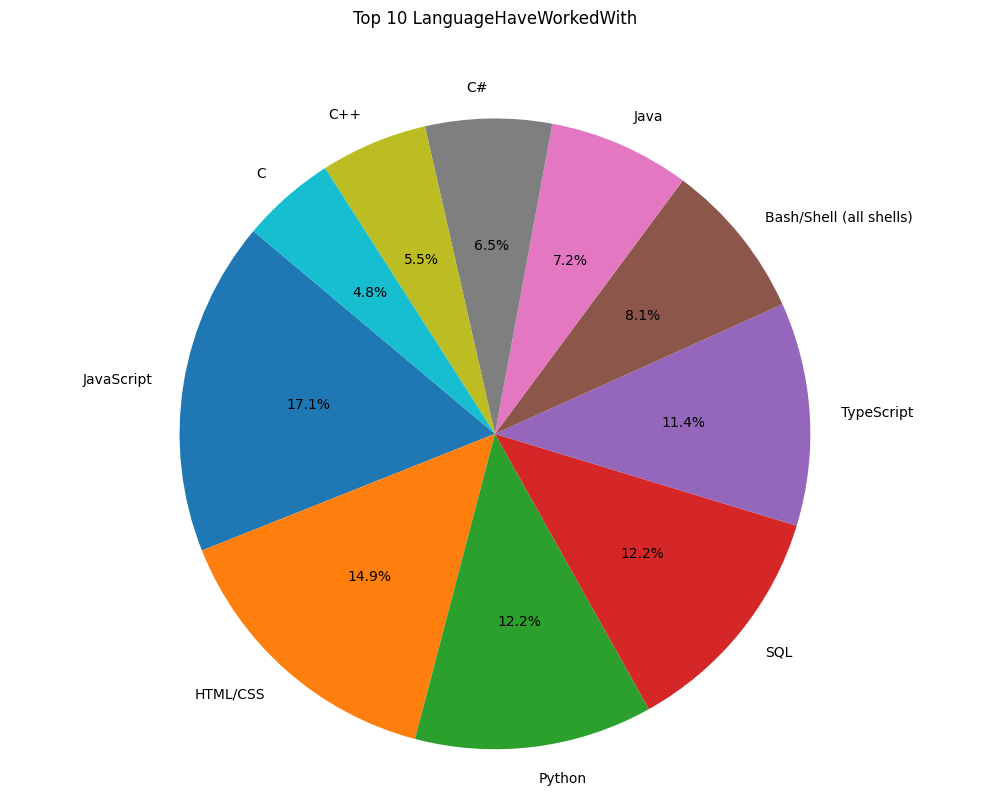

In [228]:
# Count the occurrences
nb = LanguageHaveWorkedWith['LanguageHaveWorkedWith'].value_counts().head(10)

# Pie Chart
plt.figure(figsize=(10, 8))
plt.pie(nb, labels=nb.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 LanguageHaveWorkedWith', y=1.08)
plt.axis('equal')
plt.tight_layout()
plt.show()

#### LanguageWantToWorkWith

In [225]:
LanguageWantToWorkWith = df[['LanguageWantToWorkWith']]
LanguageWantToWorkWith['LanguageWantToWorkWith'] = LanguageWantToWorkWith['LanguageWantToWorkWith'].str.split(';')
LanguageWantToWorkWith = LanguageWantToWorkWith.explode('LanguageWantToWorkWith')

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\734739360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LanguageWantToWorkWith['LanguageWantToWorkWith'] = LanguageWantToWorkWith['LanguageWantToWorkWith'].str.split(';')


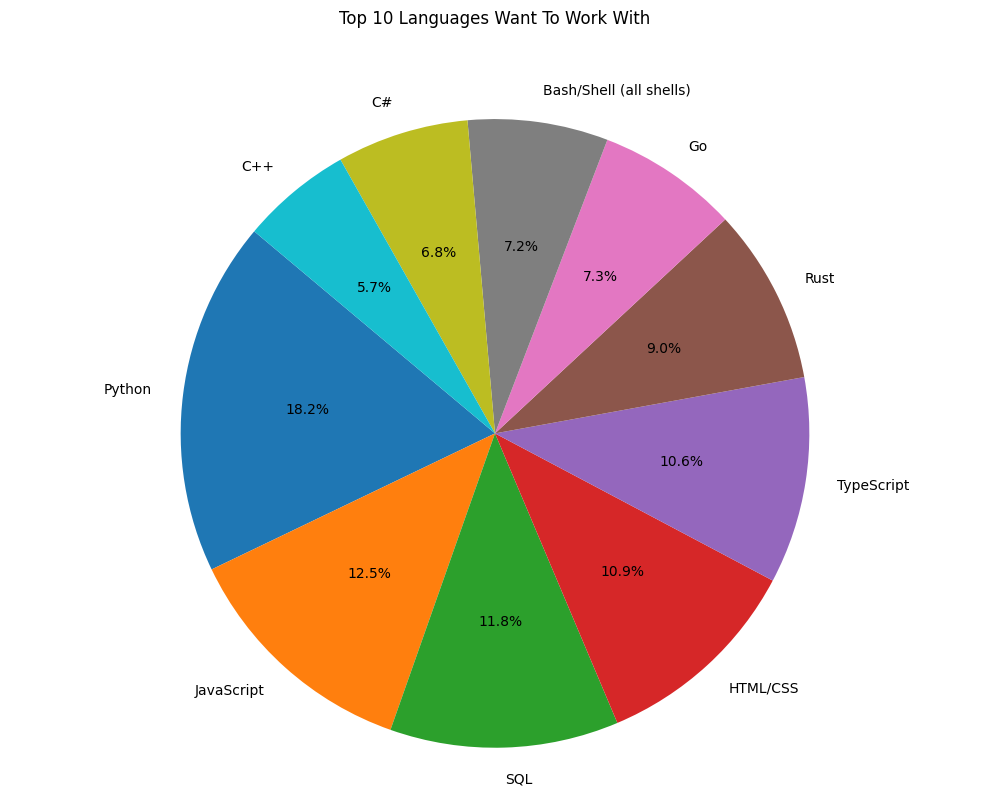

In [227]:
# Count the occurrences
nb = LanguageWantToWorkWith['LanguageWantToWorkWith'].value_counts().head(10)

# Pie Chart
plt.figure(figsize=(10, 8))
plt.pie(nb, labels=nb.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Languages Want To Work With', y=1.08)
plt.axis('equal')
plt.tight_layout()
plt.show()

#### LanguageAdmired

In [232]:
LanguageAdmired = df[['LanguageAdmired']]
LanguageAdmired['LanguageAdmired'] = LanguageAdmired['LanguageAdmired'].str.split(';')
LanguageAdmired = LanguageAdmired.explode('LanguageAdmired')

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\2292714414.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LanguageAdmired['LanguageAdmired'] = LanguageAdmired['LanguageAdmired'].str.split(';')


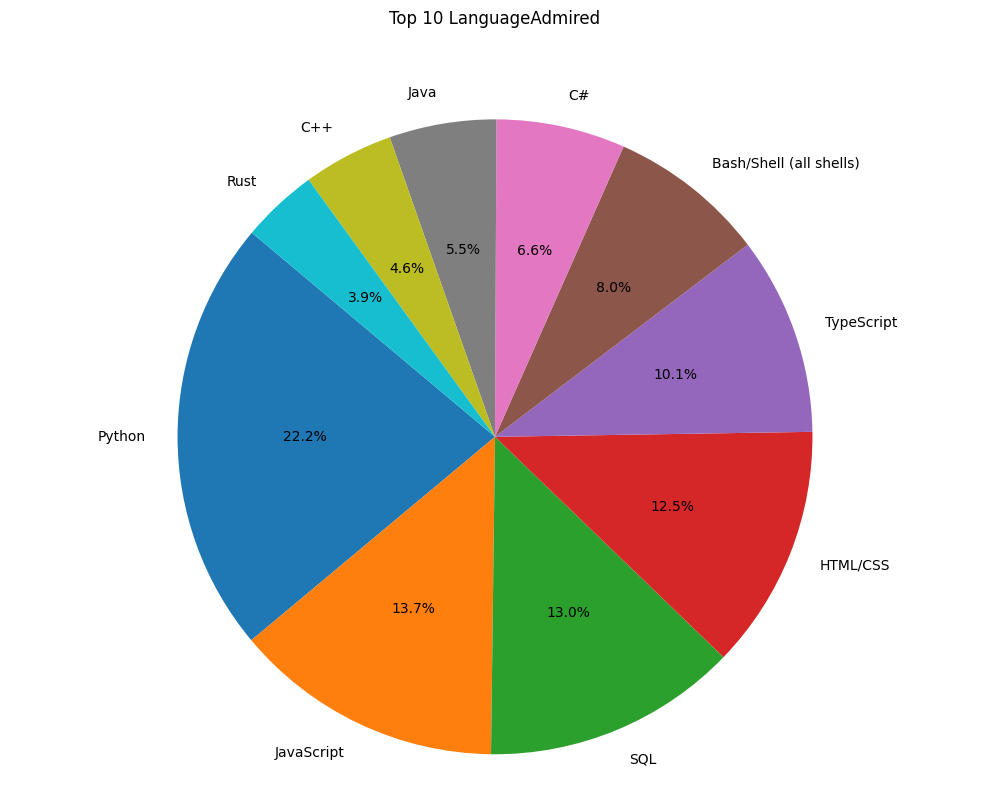

In [233]:
# Count the occurrences
nb = LanguageAdmired['LanguageAdmired'].value_counts().head(10)

# Pie Chart
plt.figure(figsize=(10, 8))
plt.pie(nb, labels=nb.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 LanguageAdmired', y=1.08)
plt.axis('equal')
plt.tight_layout()
plt.show()

### Breakdown of professional frameworks: used, desired and admired

#### WebframeHaveWorkedWith

In [243]:
WebframeHaveWorkedWith = df[['WebframeHaveWorkedWith']]
WebframeHaveWorkedWith['WebframeHaveWorkedWith'] = WebframeHaveWorkedWith['WebframeHaveWorkedWith'].str.split(';')
WebframeHaveWorkedWith = WebframeHaveWorkedWith.explode('WebframeHaveWorkedWith')

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\985586444.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WebframeHaveWorkedWith['WebframeHaveWorkedWith'] = WebframeHaveWorkedWith['WebframeHaveWorkedWith'].str.split(';')


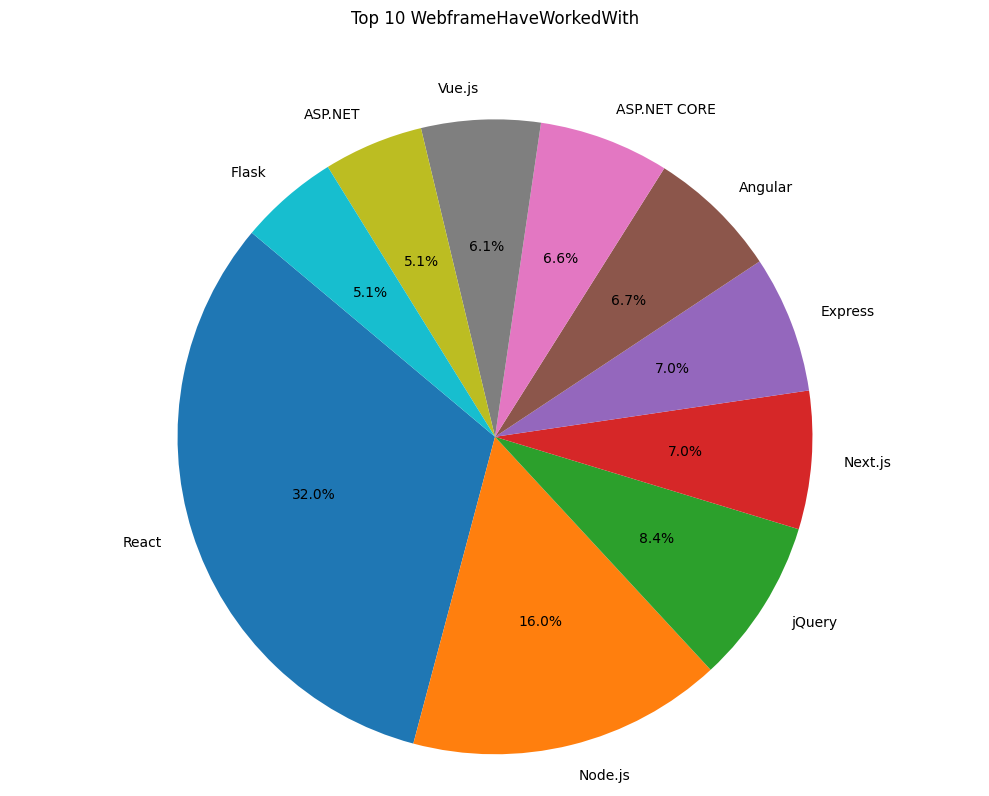

In [244]:
# Count the occurrences
nb = WebframeHaveWorkedWith['WebframeHaveWorkedWith'].value_counts().head(10)

# Pie Chart
plt.figure(figsize=(10, 8))
plt.pie(nb, labels=nb.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 WebframeHaveWorkedWith', y=1.08)
plt.axis('equal')
plt.tight_layout()
plt.show()

#### WebframeWantToWorkWith

In [245]:
WebframeWantToWorkWith = df[['WebframeWantToWorkWith']]
WebframeWantToWorkWith['WebframeWantToWorkWith'] = WebframeWantToWorkWith['WebframeWantToWorkWith'].str.split(';')
WebframeWantToWorkWith = WebframeWantToWorkWith.explode('WebframeWantToWorkWith')

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\3334561446.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WebframeWantToWorkWith['WebframeWantToWorkWith'] = WebframeWantToWorkWith['WebframeWantToWorkWith'].str.split(';')


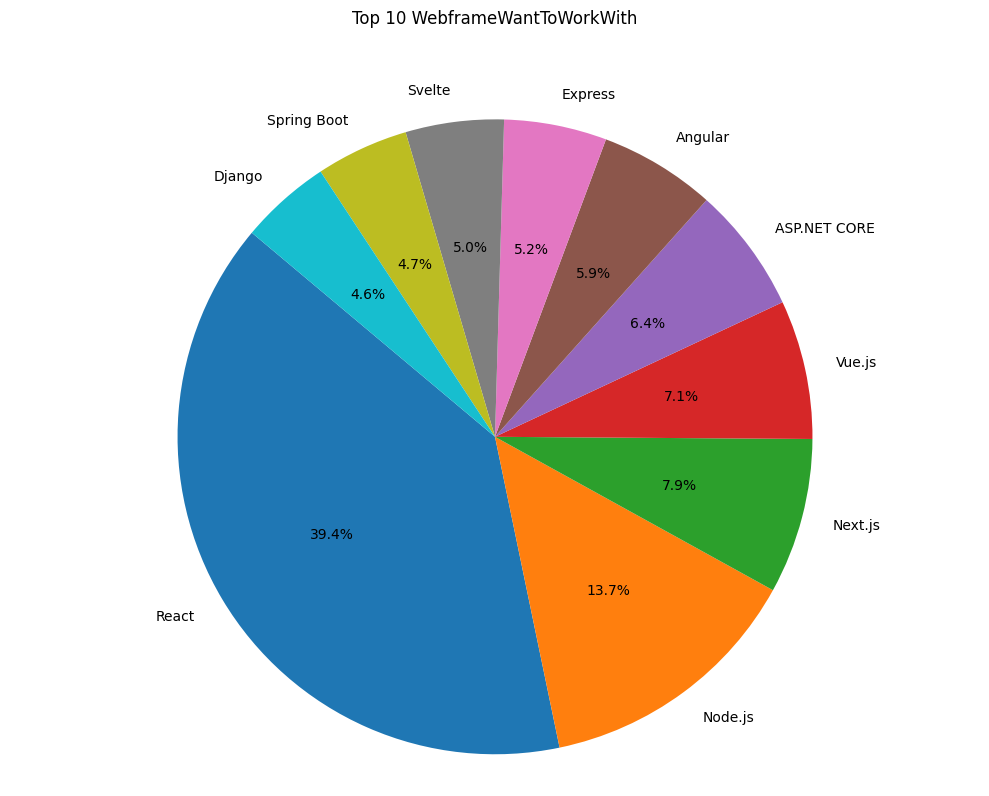

In [246]:
# Count the occurrences
nb = WebframeWantToWorkWith['WebframeWantToWorkWith'].value_counts().head(10)

# Pie Chart
plt.figure(figsize=(10, 8))
plt.pie(nb, labels=nb.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 WebframeWantToWorkWith', y=1.08)
plt.axis('equal')
plt.tight_layout()
plt.show()

#### WebframeAdmired

In [247]:
WebframeAdmired = df[['WebframeAdmired']]
WebframeAdmired['WebframeAdmired'] = WebframeAdmired['WebframeAdmired'].str.split(';')
WebframeAdmired = WebframeAdmired.explode('WebframeAdmired')

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\3727924561.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WebframeAdmired['WebframeAdmired'] = WebframeAdmired['WebframeAdmired'].str.split(';')


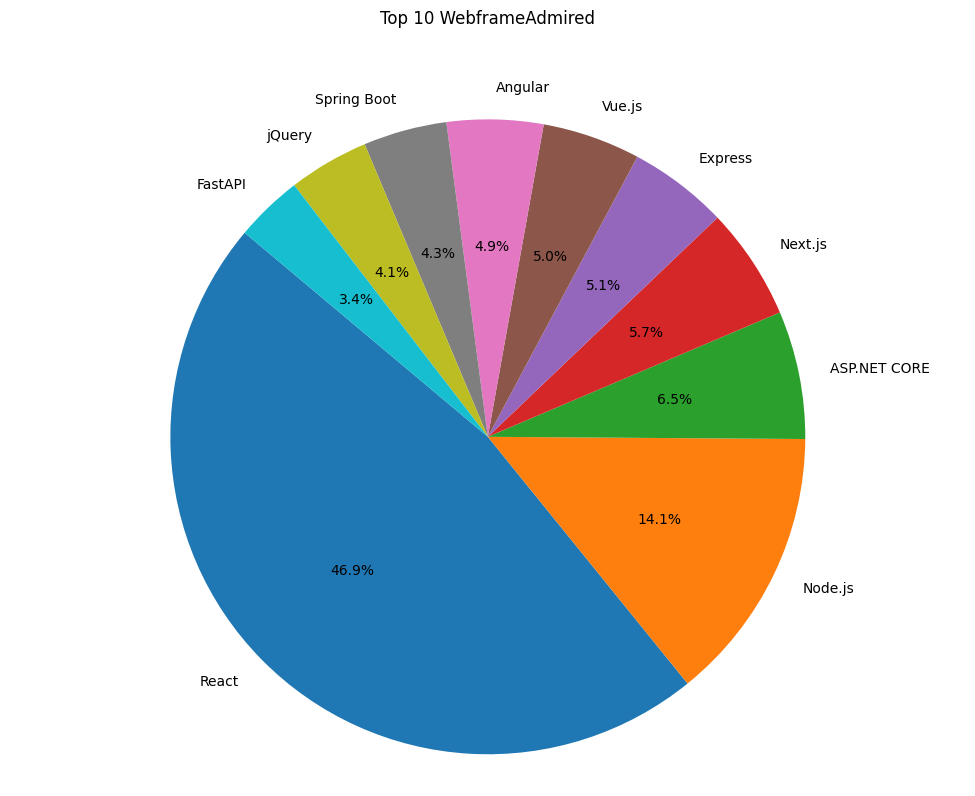

In [248]:
# Count the occurrences
nb = WebframeAdmired['WebframeAdmired'].value_counts().head(10)

# Pie Chart
plt.figure(figsize=(10, 8))
plt.pie(nb, labels=nb.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 WebframeAdmired', y=1.08)
plt.axis('equal')
plt.tight_layout()
plt.show()

### Distribution of integrated systems and technologies: used, desired and admired

#### EmbeddedHaveWorkedWith

In [258]:
EmbeddedHaveWorkedWith = df[['EmbeddedHaveWorkedWith']]
EmbeddedHaveWorkedWith['EmbeddedHaveWorkedWith'] = EmbeddedHaveWorkedWith['EmbeddedHaveWorkedWith'].str.split(';')
EmbeddedHaveWorkedWith = EmbeddedHaveWorkedWith.explode('EmbeddedHaveWorkedWith')

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\725447166.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EmbeddedHaveWorkedWith['EmbeddedHaveWorkedWith'] = EmbeddedHaveWorkedWith['EmbeddedHaveWorkedWith'].str.split(';')


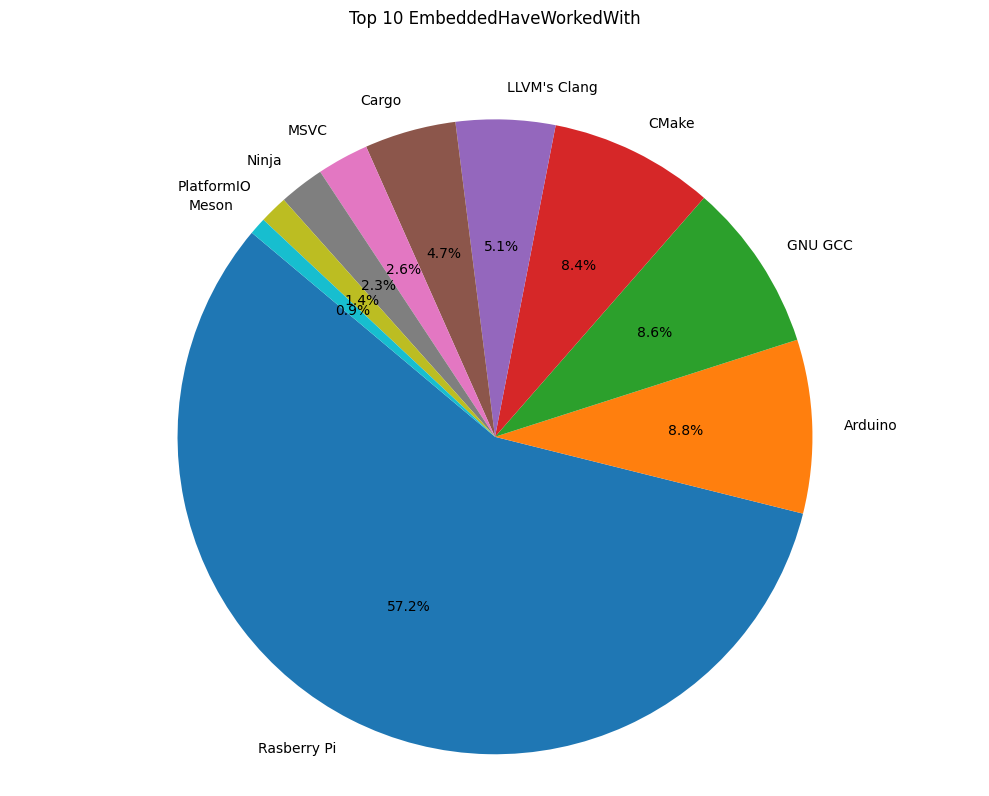

In [259]:
# Count the occurrences
nb = EmbeddedHaveWorkedWith['EmbeddedHaveWorkedWith'].value_counts().head(10)

# Pie Chart
plt.figure(figsize=(10, 8))
plt.pie(nb, labels=nb.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 EmbeddedHaveWorkedWith', y=1.08)
plt.axis('equal')
plt.tight_layout()
plt.show()

#### EmbeddedWantToWorkWith

In [260]:
EmbeddedWantToWorkWith = df[['EmbeddedWantToWorkWith']]
EmbeddedWantToWorkWith['EmbeddedWantToWorkWith'] = EmbeddedWantToWorkWith['EmbeddedWantToWorkWith'].str.split(';')
EmbeddedWantToWorkWith = EmbeddedWantToWorkWith.explode('EmbeddedWantToWorkWith')

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\4005926479.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EmbeddedWantToWorkWith['EmbeddedWantToWorkWith'] = EmbeddedWantToWorkWith['EmbeddedWantToWorkWith'].str.split(';')


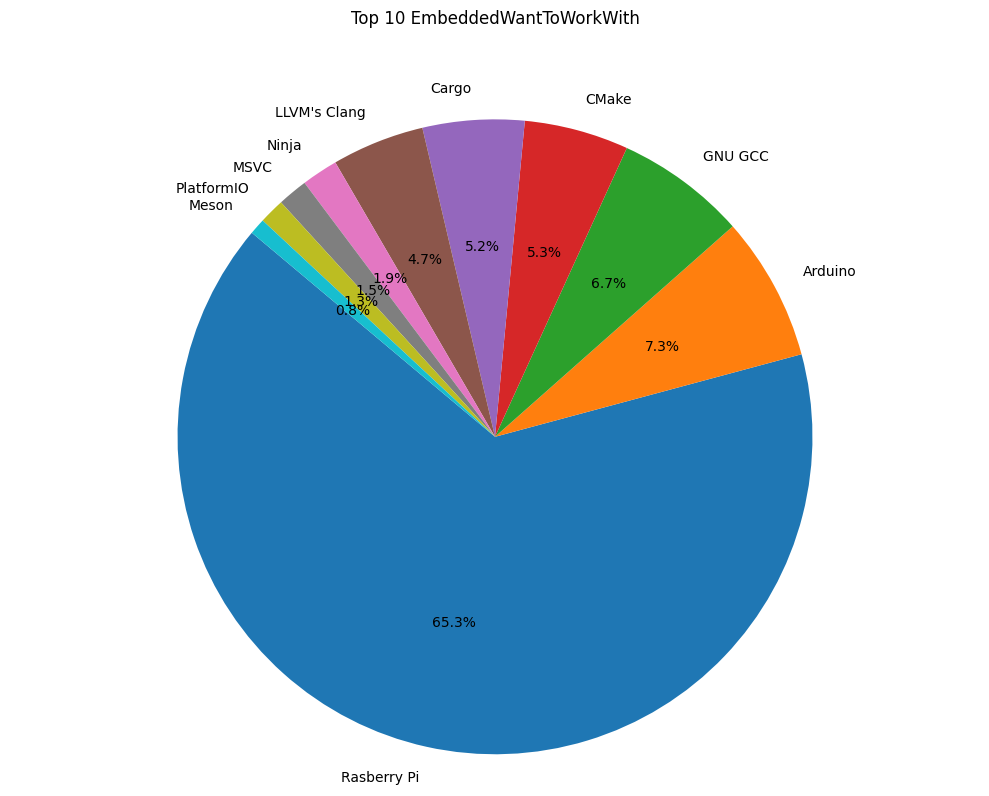

In [261]:
# Count the occurrences
nb = EmbeddedWantToWorkWith['EmbeddedWantToWorkWith'].value_counts().head(10)

# Pie Chart
plt.figure(figsize=(10, 8))
plt.pie(nb, labels=nb.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 EmbeddedWantToWorkWith', y=1.08)
plt.axis('equal')
plt.tight_layout()
plt.show()

#### EmbeddedAdmired

In [262]:
EmbeddedAdmired = df[['EmbeddedAdmired']]
EmbeddedAdmired['EmbeddedAdmired'] = EmbeddedAdmired['EmbeddedAdmired'].str.split(';')
EmbeddedAdmired = EmbeddedAdmired.explode('EmbeddedAdmired')

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\2849996440.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EmbeddedAdmired['EmbeddedAdmired'] = EmbeddedAdmired['EmbeddedAdmired'].str.split(';')


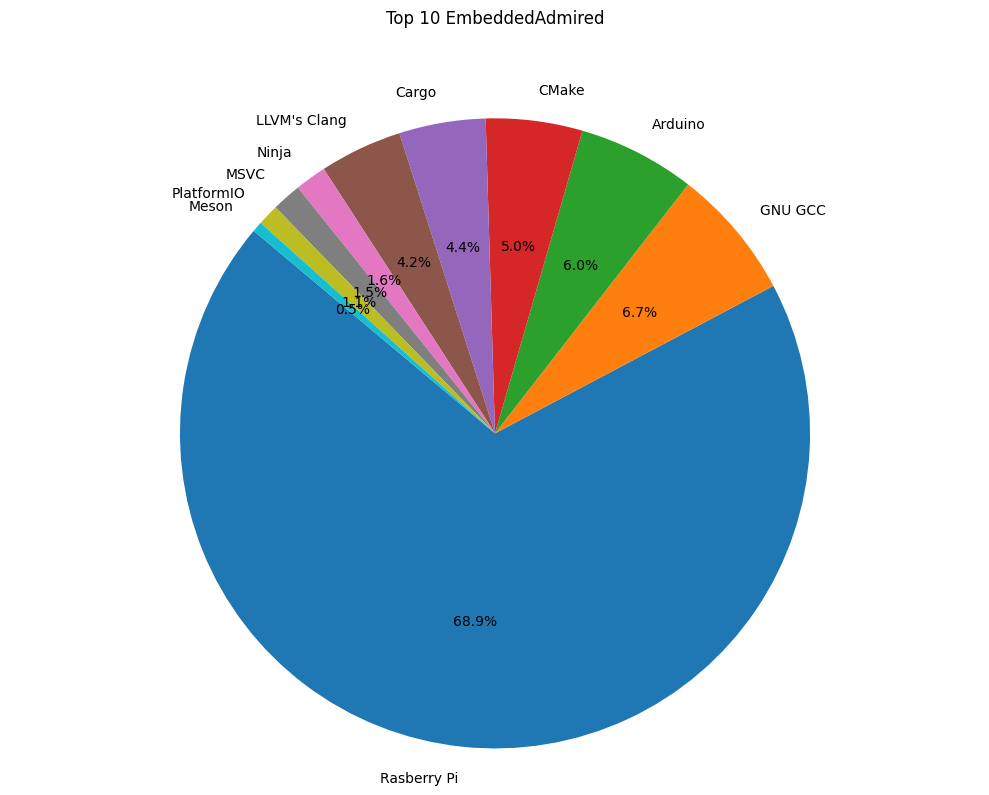

In [263]:
# Count the occurrences
nb = EmbeddedAdmired['EmbeddedAdmired'].value_counts().head(10)

# Pie Chart
plt.figure(figsize=(10, 8))
plt.pie(nb, labels=nb.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 EmbeddedAdmired', y=1.08)
plt.axis('equal')
plt.tight_layout()
plt.show()

### Breakdown of personal and professional operating systems

#### OpSysProfessional use

In [278]:
OpSysProfessional_use = df[['OpSysProfessional use']]
OpSysProfessional_use['OpSysProfessional use'] = OpSysProfessional_use['OpSysProfessional use'].str.split(';')
OpSysProfessional_use = OpSysProfessional_use.explode('OpSysProfessional use')

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\3944169143.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OpSysProfessional_use['OpSysProfessional use'] = OpSysProfessional_use['OpSysProfessional use'].str.split(';')


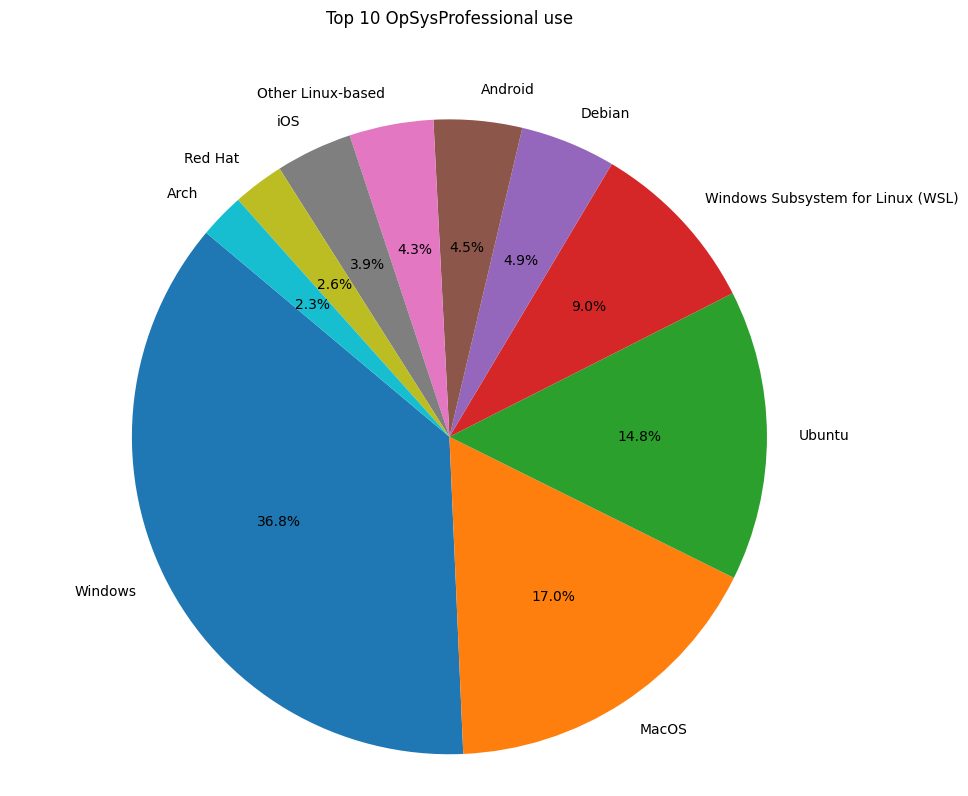

In [279]:
# Count the occurrences
nb = OpSysProfessional_use['OpSysProfessional use'].value_counts().head(10)

# Pie Chart
plt.figure(figsize=(10, 8))
plt.pie(nb, labels=nb.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 OpSysProfessional use', y=1.08)
plt.axis('equal')
plt.tight_layout()
plt.show()

#### OpSysPersonal use

In [280]:
OpSysPersonal_use = df[['OpSysPersonal use']]
OpSysPersonal_use['OpSysPersonal use'] = OpSysPersonal_use['OpSysPersonal use'].str.split(';')
OpSysPersonal_use = OpSysPersonal_use.explode('OpSysPersonal use')

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\1910156520.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OpSysPersonal_use['OpSysPersonal use'] = OpSysPersonal_use['OpSysPersonal use'].str.split(';')


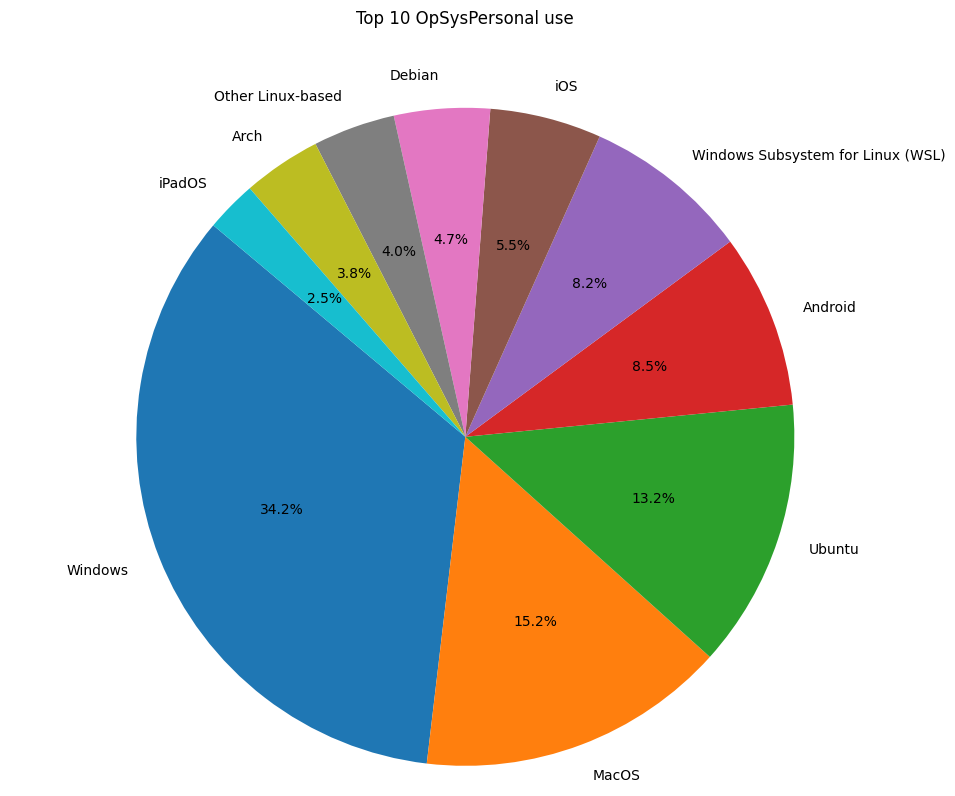

In [281]:
# Count the occurrences
nb = OpSysPersonal_use['OpSysPersonal use'].value_counts().head(10)

# Pie Chart
plt.figure(figsize=(10, 8))
plt.pie(nb, labels=nb.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 OpSysPersonal use', y=1.08)
plt.axis('equal')
plt.tight_layout()
plt.show()

### Distribution of cloud platforms: used, desired and admired

#### PlatformHaveWorkedWith

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\872605981.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PlatformHaveWorkedWith['PlatformHaveWorkedWith'] = PlatformHaveWorkedWith['PlatformHaveWorkedWith'].str.split(';')


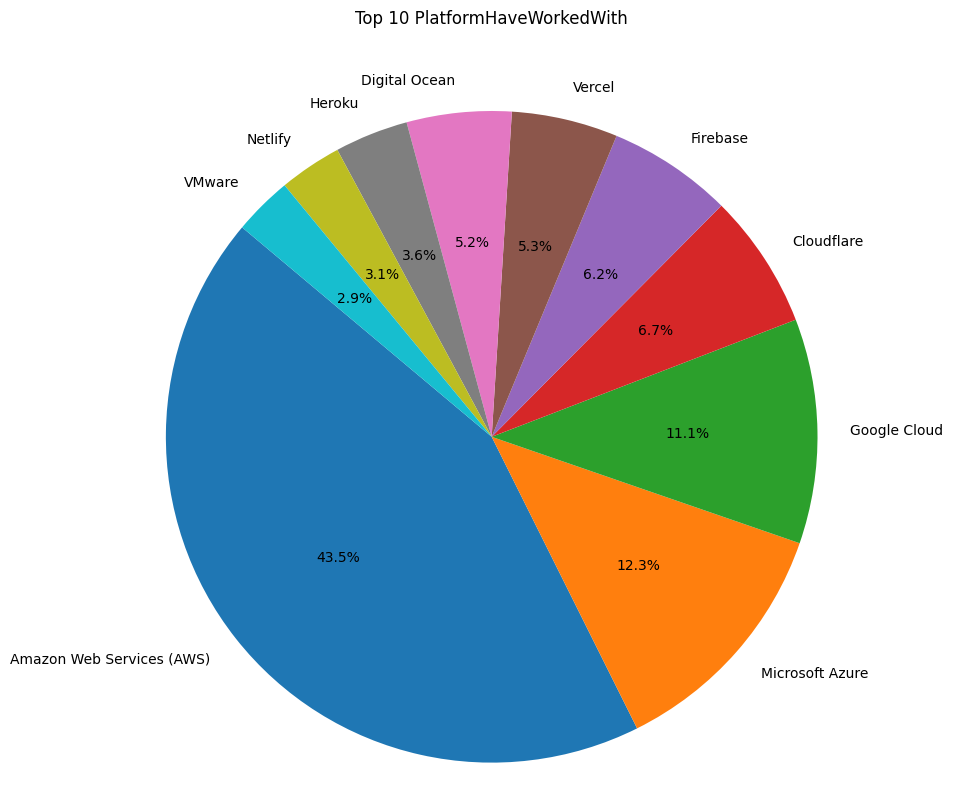

In [296]:
PlatformHaveWorkedWith = df[['PlatformHaveWorkedWith']]
PlatformHaveWorkedWith['PlatformHaveWorkedWith'] = PlatformHaveWorkedWith['PlatformHaveWorkedWith'].str.split(';')
PlatformHaveWorkedWith = PlatformHaveWorkedWith.explode('PlatformHaveWorkedWith')

# Count the occurrences
nb = PlatformHaveWorkedWith['PlatformHaveWorkedWith'].value_counts().head(10)

# Pie Chart
plt.figure(figsize=(10, 8))
plt.pie(nb, labels=nb.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 PlatformHaveWorkedWith', y=1.08)
plt.axis('equal')
plt.tight_layout()
plt.show()

#### PlatformWantToWorkWith

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\1807071382.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PlatformWantToWorkWith['PlatformWantToWorkWith'] = PlatformWantToWorkWith['PlatformWantToWorkWith'].str.split(';')


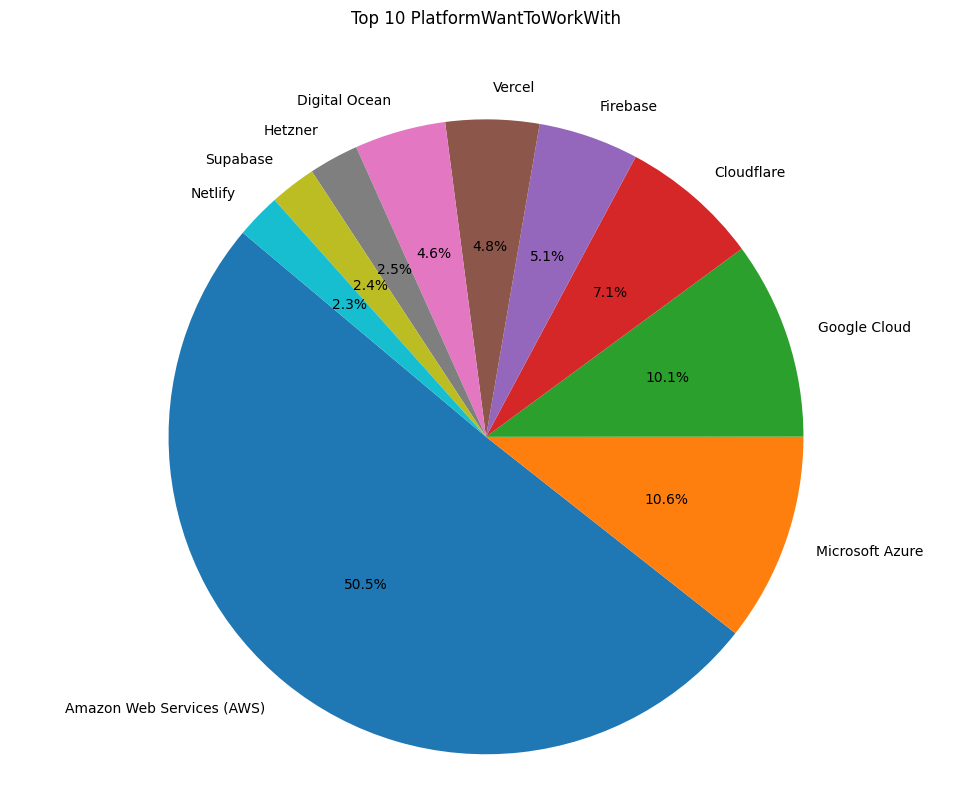

In [297]:
PlatformWantToWorkWith = df[['PlatformWantToWorkWith']]
PlatformWantToWorkWith['PlatformWantToWorkWith'] = PlatformWantToWorkWith['PlatformWantToWorkWith'].str.split(';')
PlatformWantToWorkWith = PlatformWantToWorkWith.explode('PlatformWantToWorkWith')

# Count the occurrences
nb = PlatformWantToWorkWith['PlatformWantToWorkWith'].value_counts().head(10)

# Pie Chart
plt.figure(figsize=(10, 8))
plt.pie(nb, labels=nb.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 PlatformWantToWorkWith', y=1.08)
plt.axis('equal')
plt.tight_layout()
plt.show()

#### PlatformAdmired

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\3730050368.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PlatformAdmired['PlatformAdmired'] = PlatformAdmired['PlatformAdmired'].str.split(';')


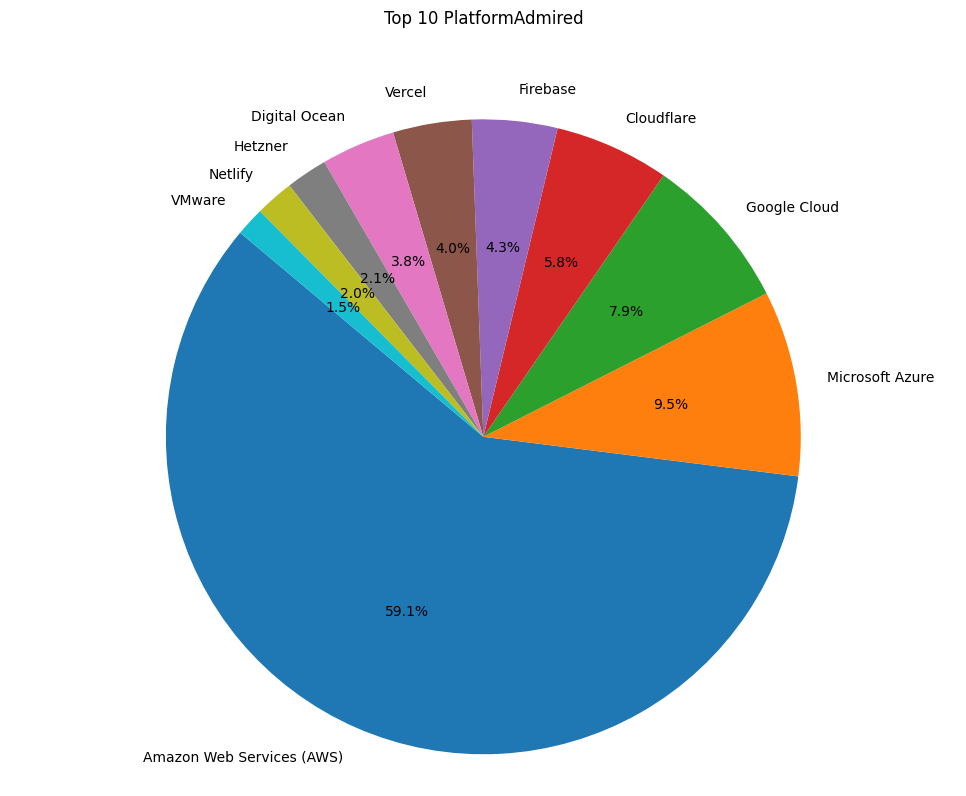

In [298]:
PlatformAdmired = df[['PlatformAdmired']]
PlatformAdmired['PlatformAdmired'] = PlatformAdmired['PlatformAdmired'].str.split(';')
PlatformAdmired = PlatformAdmired.explode('PlatformAdmired')

# Count the occurrences
nb = PlatformAdmired['PlatformAdmired'].value_counts().head(10)

# Pie Chart
plt.figure(figsize=(10, 8))
plt.pie(nb, labels=nb.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 PlatformAdmired', y=1.08)
plt.axis('equal')
plt.tight_layout()
plt.show()

###  Distribution of AI-based research and development tools: used, desired and admired

#### AISearchDevHaveWorkedWith

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\3542960184.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AISearchDevHaveWorkedWith['AISearchDevHaveWorkedWith'] = AISearchDevHaveWorkedWith['AISearchDevHaveWorkedWith'].str.split(';')


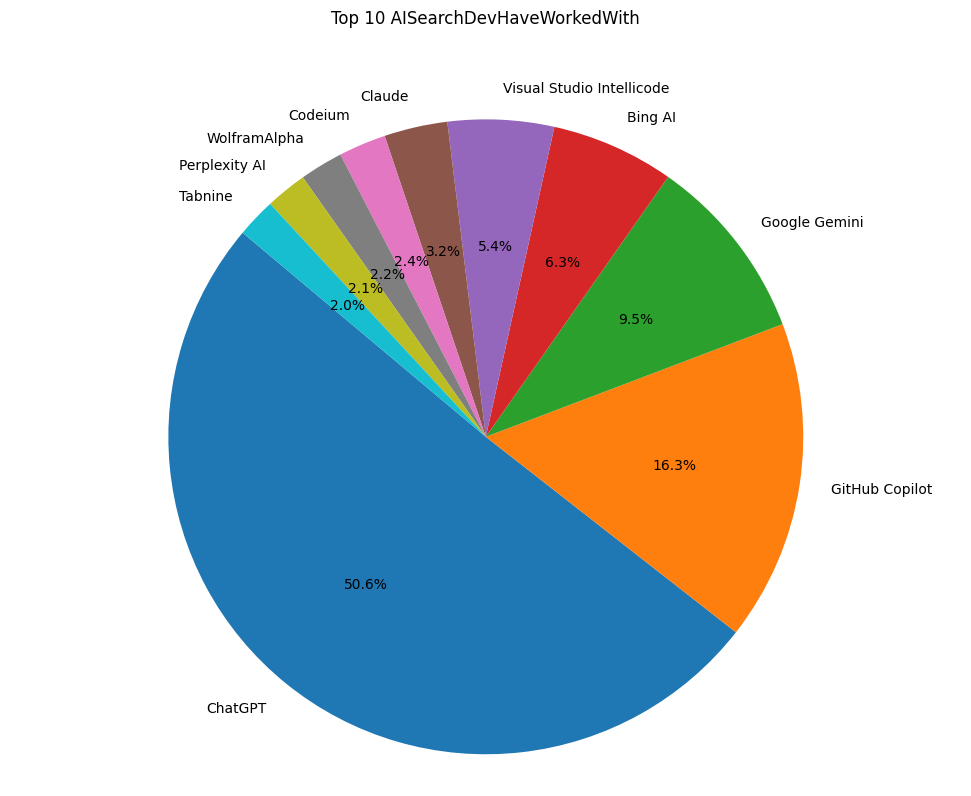

In [312]:
AISearchDevHaveWorkedWith = df[['AISearchDevHaveWorkedWith']]
AISearchDevHaveWorkedWith['AISearchDevHaveWorkedWith'] = AISearchDevHaveWorkedWith['AISearchDevHaveWorkedWith'].str.split(';')
AISearchDevHaveWorkedWith = AISearchDevHaveWorkedWith.explode('AISearchDevHaveWorkedWith')

# Count the occurrences
nb = AISearchDevHaveWorkedWith['AISearchDevHaveWorkedWith'].value_counts().head(10)

# Pie Chart
plt.figure(figsize=(10, 8))
plt.pie(nb, labels=nb.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 AISearchDevHaveWorkedWith', y=1.08)
plt.axis('equal')
plt.tight_layout()
plt.show()

#### AISearchDevWantToWorkWith

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\3910424542.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AISearchDevWantToWorkWith['AISearchDevWantToWorkWith'] = AISearchDevWantToWorkWith['AISearchDevWantToWorkWith'].str.split(';')


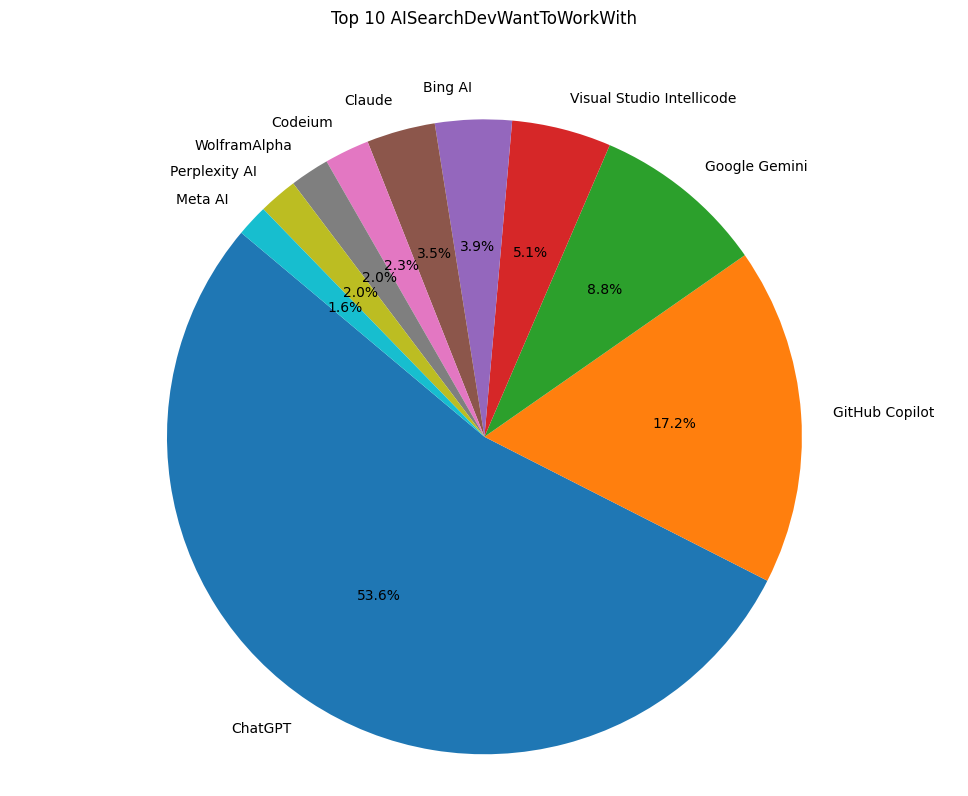

In [313]:
AISearchDevWantToWorkWith = df[['AISearchDevWantToWorkWith']]
AISearchDevWantToWorkWith['AISearchDevWantToWorkWith'] = AISearchDevWantToWorkWith['AISearchDevWantToWorkWith'].str.split(';')
AISearchDevWantToWorkWith = AISearchDevWantToWorkWith.explode('AISearchDevWantToWorkWith')

# Count the occurrences
nb = AISearchDevWantToWorkWith['AISearchDevWantToWorkWith'].value_counts().head(10)

# Pie Chart
plt.figure(figsize=(10, 8))
plt.pie(nb, labels=nb.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 AISearchDevWantToWorkWith', y=1.08)
plt.axis('equal')
plt.tight_layout()
plt.show()

#### AISearchDevAdmired

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\1752094501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AISearchDevAdmired['AISearchDevAdmired'] = AISearchDevAdmired['AISearchDevAdmired'].str.split(';')


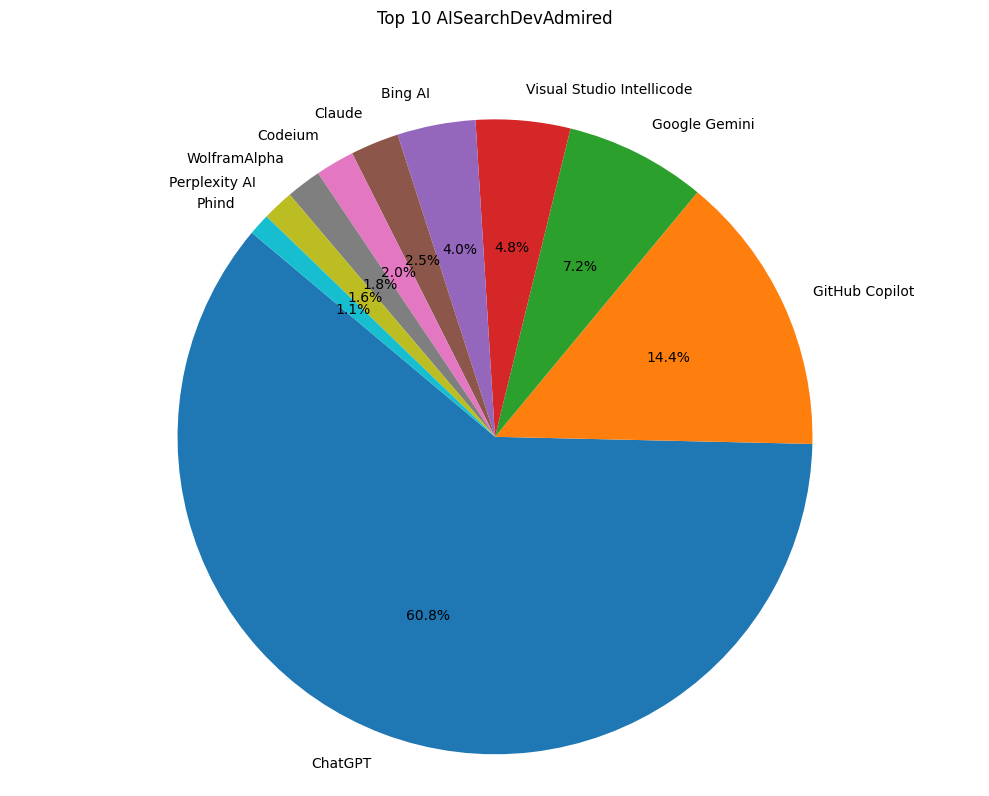

In [314]:
AISearchDevAdmired = df[['AISearchDevAdmired']]
AISearchDevAdmired['AISearchDevAdmired'] = AISearchDevAdmired['AISearchDevAdmired'].str.split(';')
AISearchDevAdmired = AISearchDevAdmired.explode('AISearchDevAdmired')

# Count the occurrences
nb = AISearchDevAdmired['AISearchDevAdmired'].value_counts().head(10)

# Pie Chart
plt.figure(figsize=(10, 8))
plt.pie(nb, labels=nb.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 AISearchDevAdmired', y=1.08)
plt.axis('equal')
plt.tight_layout()
plt.show()

### Job satisfaction by age: technological learning vs. software architecture
This stacked graph illustrates the median satisfaction scores for two dimensions of technical work learning and using new technologies (JobSatPoints_6), and designing software architectures and environments (JobSatPoints_7) broken down by age group. This visualization allows us to explore how job priorities vary according to respondents' age.

In [336]:
df_age_jobSat_6_and_7 = df[['Age', 'JobSatPoints_6', 'JobSatPoints_7']]
df_age_jobSat_6_and_7.head(1)

Age  JobSatPoints_6  JobSatPoints_7
0  Under 18 years old             1.5             5.0

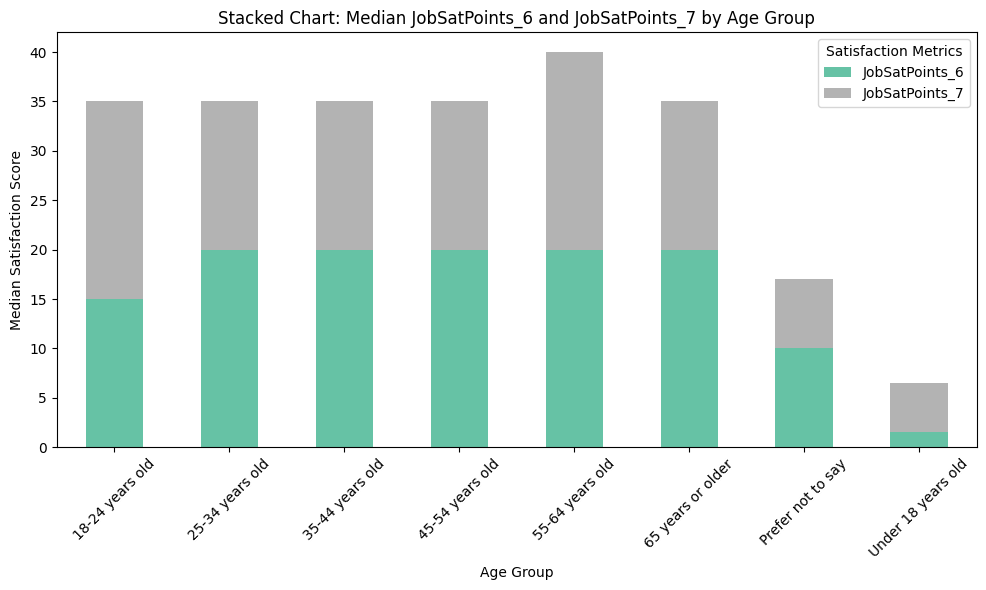

In [337]:
# Grouper par âge et calculer la médiane
median_scores = df_age_jobSat_6_and_7.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median().sort_index()

# Tracer le diagramme empilé
ax = median_scores.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title("Stacked Chart: Median JobSatPoints_6 and JobSatPoints_7 by Age Group")
plt.ylabel("Median Satisfaction Score")
plt.xlabel("Age Group")
plt.xticks(rotation=45)
plt.legend(title="Satisfaction Metrics")
plt.tight_layout()
plt.show()


### Job satisfaction by job type: technology learning vs. software architecture
This stacked graph illustrates the median satisfaction scores related to two aspects of technical work learning and using new technologies (JobSatPoints_6), and designing software architectures and environments (JobSatPoints_7) according to the types of job held by respondents. This visualization highlights job preferences according to roles held in the technology sector.

In [346]:
df_employment_jobSat_6_and_7 = df[['Employment', 'JobSatPoints_6', 'JobSatPoints_7']]
df_employment_jobSat_6_and_7.head(2)

Employment  JobSatPoints_6  JobSatPoints_7
0  Employed, full-time             1.5             5.0
1  Employed, full-time             0.0             0.0

In [347]:
df_employment_jobSat_6_and_7['Employment'] = df_employment_jobSat_6_and_7['Employment'].str.split(';')
df_employment_jobSat_6_and_7 = df_employment_jobSat_6_and_7.explode('Employment')
df_employment_jobSat_6_and_7['Employment'].unique()

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\1042604074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_employment_jobSat_6_and_7['Employment'] = df_employment_jobSat_6_and_7['Employment'].str.split(';')


array(['Employed, full-time', 'Student, full-time',
       'Not employed, but looking for work',
       'Independent contractor, freelancer, or self-employed',
       'Not employed, and not looking for work', 'Student, part-time',
       'Employed, part-time', 'I prefer not to say', 'Retired'],
      dtype=object)

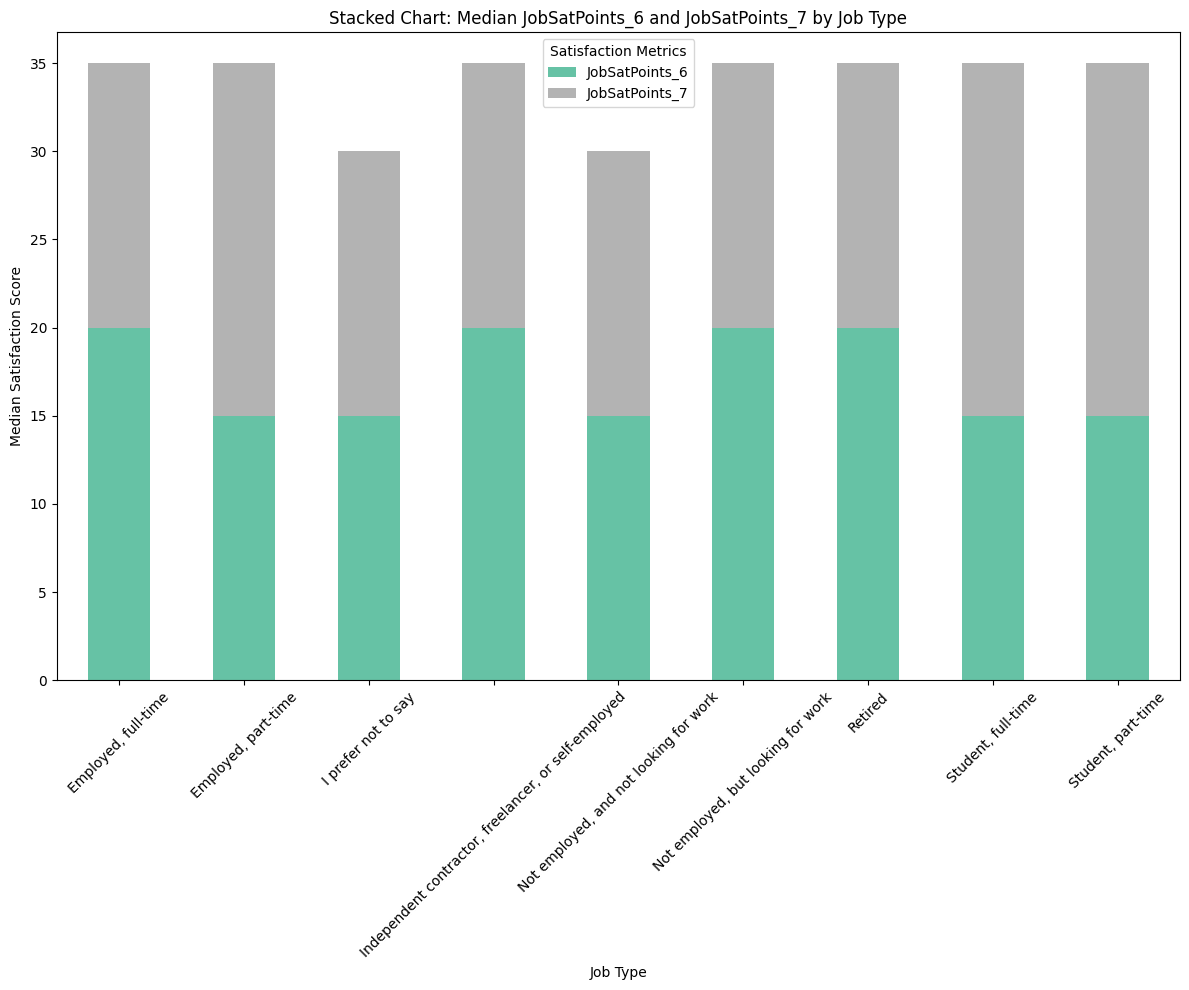

In [356]:
# Grouper par âge et calculer la médiane
median_scores = df_employment_jobSat_6_and_7.groupby('Employment')[['JobSatPoints_6', 'JobSatPoints_7']].median().sort_index()

# Tracer le diagramme empilé
ax = median_scores.plot(kind='bar', stacked=True, figsize=(12, 10), colormap='Set2')
plt.title("Stacked Chart: Median JobSatPoints_6 and JobSatPoints_7 by Job Type")
plt.ylabel("Median Satisfaction Score")
plt.xlabel("Job Type")
plt.xticks(rotation=45)
plt.legend(title="Satisfaction Metrics")
plt.tight_layout()
plt.show()

### Technology satisfaction and annual salary
This stacked graph shows the combined distribution of annual salaries (ConvertedCompYearly) and satisfaction with learning and using new technologies (JobSatPoints_6). The aim is to highlight any links between remuneration and technological satisfaction.

In [377]:
df_t = df[['ConvertedCompYearly', 'JobSatPoints_6']]

bins = [0, 20000, 50000, 100000, 150000, df_t['ConvertedCompYearly'].max()]
labels = ['<20k', '20k–50k', '50k–100k', '100k–150k', '>150k']

df_t['CompGroup'] = pd.cut(df_t['ConvertedCompYearly'], bins=bins, labels=labels, include_lowest=True)


C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\4193212613.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t['CompGroup'] = pd.cut(df_t['ConvertedCompYearly'], bins=bins, labels=labels, include_lowest=True)


C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\4225134379.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_t.groupby('CompGroup')['JobSatPoints_6'].median().reset_index()


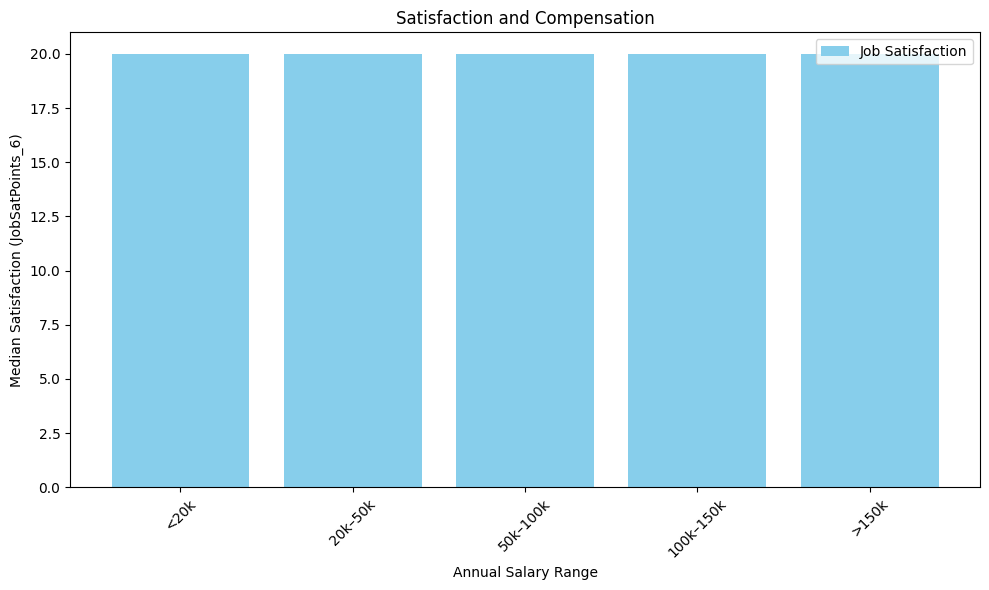

In [380]:
# Group by salary range and calculate median satisfaction
grouped = df_t.groupby('CompGroup')['JobSatPoints_6'].median().reset_index()

# Create a bar chart with median satisfaction
plt.figure(figsize=(10, 6))
plt.bar(grouped['CompGroup'].astype(str), grouped['JobSatPoints_6'], color='skyblue', label='Job Satisfaction')

plt.xlabel('Annual Salary Range')
plt.ylabel('Median Satisfaction (JobSatPoints_6)')
plt.title('Satisfaction and Compensation')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



### Databases Used by Different Age Groups: A Stacked Chart
This stacked chart illustrates the most commonly used databases among respondents from various age groups. It reveals the distribution and popularity of each database within each age category, offering a clear perspective on how database usage patterns differ across age demographics.

C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\451385910.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Age_DatabaseHaveWorkedWith['DatabaseHaveWorkedWith'] = df_Age_DatabaseHaveWorkedWith['DatabaseHaveWorkedWith'].str.split(';')
C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\451385910.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top[db] = df_top['DatabaseHaveWorkedWith'].apply(lambda x: db in x).astype(int)
C:\Users\alfa1\AppData\Local\Temp\ipykernel_15292\451385910.py:14: SettingW

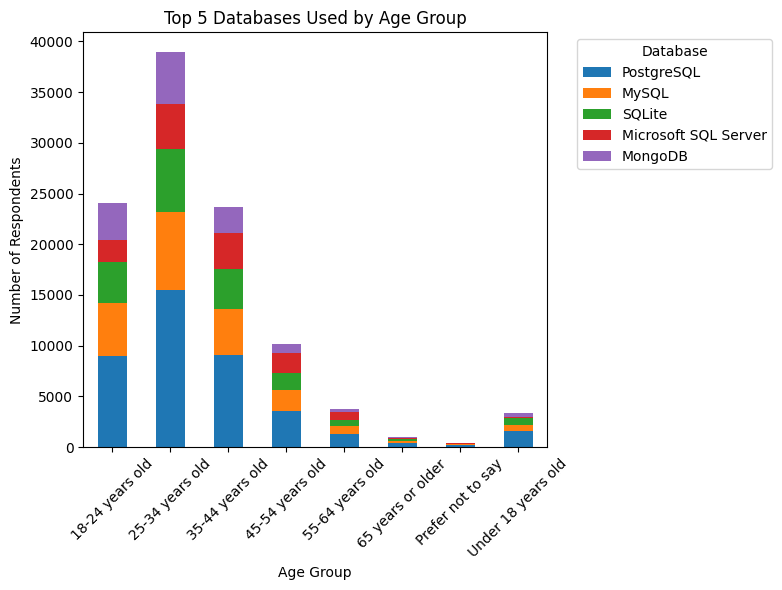

In [417]:
df_Age_DatabaseHaveWorkedWith = df[['Age', 'DatabaseHaveWorkedWith']]

# Create a column where each row contains the databases as a list
df_Age_DatabaseHaveWorkedWith['DatabaseHaveWorkedWith'] = df_Age_DatabaseHaveWorkedWith['DatabaseHaveWorkedWith'].str.split(';')

# Filter the most popular databases (top 5)
top5_databases = df_Age_DatabaseHaveWorkedWith['DatabaseHaveWorkedWith'].explode().value_counts().nlargest(5).index

# Filter rows to keep only responses with the top 5 databases
df_top = df_Age_DatabaseHaveWorkedWith[df_Age_DatabaseHaveWorkedWith['DatabaseHaveWorkedWith'].apply(lambda x: any(db in top5_databases for db in x))]

# Create a column for each top 5 database indicating if it is present for each respondent
for db in top5_databases:
    df_top[db] = df_top['DatabaseHaveWorkedWith'].apply(lambda x: db in x).astype(int)

# Create a pivot table to get the count of respondents by age group and database
pivot = df_top.groupby('Age')[top5_databases].sum()

# Create the stacked bar chart
pivot.plot(kind='bar', stacked=True, figsize=(8, 6))

# Customize the chart
plt.title("Top 5 Databases Used by Age Group")
plt.ylabel("Number of Respondents")
plt.xlabel("Age Group")
plt.xticks(rotation=45)
plt.legend(title="Database", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the chart
plt.show()


### Mean Yearly Compensation by Age Group
This line chart illustrates how the mean yearly compensation (ConvertedCompYearly) varies across different age groups. It provides insight into the typical earnings trends as respondents progress through various stages of their careers.

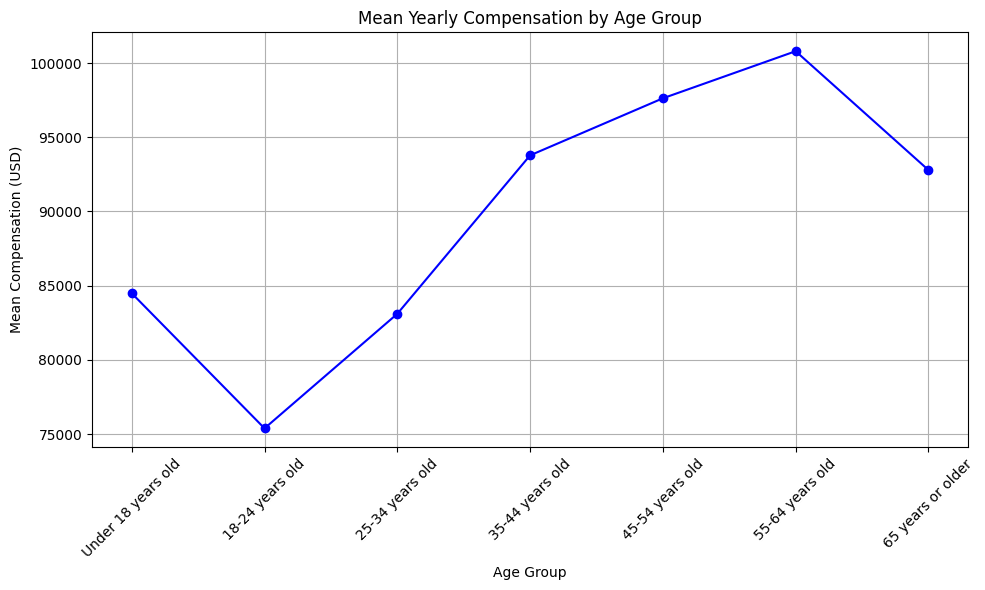

In [396]:
df_Age_ConvertedCompYearly = df[['Age', 'ConvertedCompYearly']]

# Remove non-specific entries
df_Age_ConvertedCompYearly = df_Age_ConvertedCompYearly[df_Age_ConvertedCompYearly['Age'] != 'Prefer not to say']

# Order age groups logically
age_order = ['Under 18 years old', '18-24 years old', '25-34 years old',
             '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older']

# Group by Age and calculate the mean
mean_by_age = df_Age_ConvertedCompYearly.groupby('Age')['ConvertedCompYearly'].mean().reindex(age_order).reset_index()

# Plot the chart
plt.figure(figsize=(10, 6))
plt.plot(mean_by_age['Age'], mean_by_age['ConvertedCompYearly'], marker='o', color='blue')
plt.title('Mean Yearly Compensation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Mean Compensation (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### Job Satisfaction (JobSatPoints_6) by Experience Level
This line chart visualizes how job satisfaction related to learning and using new technologies (JobSatPoints_6) varies across different levels of professional experience. Using an experience-related column as a proxy for experience level, this analysis highlights trends in satisfaction as respondents gain more work experience

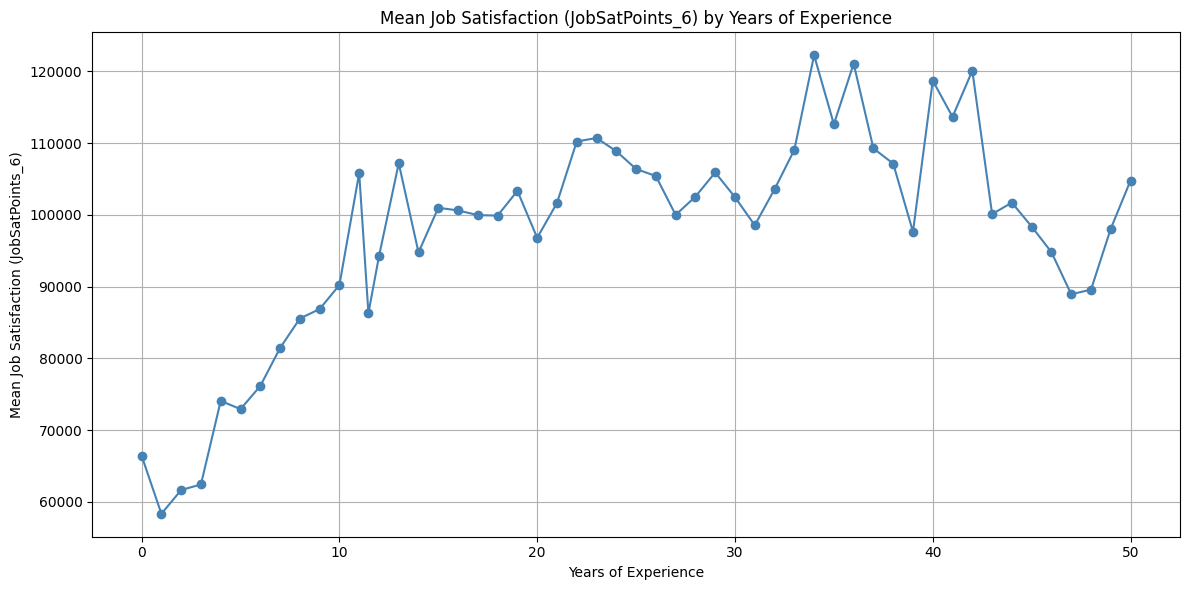

In [402]:
# Keep necessary columns and drop rows with missing values
df_WorkExp_ConvertedCompYearly = df[['WorkExp', 'ConvertedCompYearly']].dropna()

# Convert WorkExp to float (if not already)
df_WorkExp_ConvertedCompYearly['WorkExp'] = df_WorkExp_ConvertedCompYearly['WorkExp'].astype(float)

# Group by years of experience and calculate the mean
mean_salary_by_exp = df_WorkExp_ConvertedCompYearly.groupby('WorkExp')['ConvertedCompYearly'].mean().reset_index()

# Plot the chart
plt.figure(figsize=(12, 6))
plt.plot(mean_salary_by_exp['WorkExp'], mean_salary_by_exp['ConvertedCompYearly'], marker='o', linestyle='-', color='steelblue')
plt.title('Mean Job Satisfaction (JobSatPoints_6) by Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Mean Job Satisfaction (JobSatPoints_6)')
plt.grid(True)
plt.tight_layout()
plt.show()
